#Difalink Group 6
##Our Team
1. Trio Widianto
2. Shafira Aisyah Maharani
3. Vegatama Firdiady
4. Wyne Mumtaazah Putri
5. Yemima Sipayung

##Contents:
* [1. Problem: Project Name, Project Overview, and Objectives](#1)
* [2. Data](#2)
* [3. Imports](#3)
* [4. Data Preprocessing: Handling Missing Values, Encoding, and Scalling](#4)
* [5. Exploratory Data Analysis (EDA)](#5)
* [6. Conclussion](#6)

##1. Problem
Difalink is a social enterprise that connects people with disabilities to companies and helps them work well together.

> Here are some of the services offered by difalink
- Work vacancies for disabilities
- Helping people with disabilities to improve their skills to become a workforce that is ready to be absorbed by the market through various capacity building training activities, active dialogue, and job fairs.
- Helping companies with end to end service.







<a name='1'></a>
###1.1 Project Name
Spesifications and Visualizations of Difalink's Target Market

###1.2 Project Overview
Difalink want to know more about their target market which has always been use their services this far through the data. All interns can use the data such as the area of disability job seekers, types of job vacancies that are mostly posted, etc, to solve that problem.

###1.3 Objectives
*   Categorizing Difalink's Target Market
*   Knowing the types of jobs that absorbed a lot of disabilities
*   Do the forecasting using the data
* Analyze every data provided by Difalink, namely user registration data, applicant users, recruited users, and company job vacancies.
* Give recommendations, suggestions, and effective marketing strategies for Difalink from the results of data analysis



<a name='2'></a>
##2. Data
The data we used on this project:
1. Master Data
2. Master Data: Daksa
3. Master Data: Tuli
4. Master Data: Netra
5. Master Data: Others
6. List of Job Applicants
7. List of Users that are succesfully recruited via Difalink
8. List of Job Vacancies

<a name='3'></a>
##3. Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import plotly.offline as pyoff
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

<a name='4'></a>
##4. Data Preprocessing

###4.1 Master Data

In [ ]:
sheet_id = "1ahzkUtQ_ikkB9tjMDsU1TZFJhU6sVAWB"
df_m = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?gid=914604245&format=csv")

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 30 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   No                                                                2804 non-null   int64 
 1   Email Address                                                     1277 non-null   object
 2   Nama Lengkap                                                      2803 non-null   object
 3   Tempat / Tanggal Lahir:                                           2025 non-null   object
 4   Jenis Kelamin :                                                   2041 non-null   object
 5   Status Perkawinan :                                               824 non-null    object
 6   Alamat rumah:                                                     2248 non-null   object
 7   Kota/Kabupaten? :                         

In [ ]:
pd.DataFrame({'Features' : df_m.columns, 'dataType' : df_m.dtypes.values,
              'nullvalues' : [df_m[i].isna().sum() for i in df_m.columns],
              'unique' : [df_m[i].nunique() for i in df_m.columns],
              'uniqueSample' : [list(pd.Series(df_m[i].unique())) for i in df_m.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,No,int64,0,2618,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Email Address,object,1527,1224,"[muzakyalfarizy@gmail.com, bellatsana93@yahoo...."
2,Nama Lengkap,object,1,2706,"[MUZAQQI, Bellatsana Deniastiti, Nanda bagus P..."
3,Tempat / Tanggal Lahir:,object,779,1766,"[5/9/1992, 12/8/1993, 4/30/2022, 6/25/1995, 1/..."
4,Jenis Kelamin :,object,763,10,"[Male, Female, LAKI-LAKI, Perempuan, PEREMPUAN..."
5,Status Perkawinan :,object,1980,8,"[Belum Menikah, nan, Kawin, Duda (meningal), S..."
6,Alamat rumah:,object,556,2183,[petis benem rt 01 rw 01 kelurahan petis benem...
7,Kota/Kabupaten? :,object,562,634,"[gresik, Jakarta Barat, Sido Mukti RT 3 RT 2, ..."
8,Provinsi,object,606,48,"[Jawa Timur, Jakarta, nan, Jawa Barat, Bali, K..."
9,Kendaraan sehari-hari :,object,1373,72,"[Motor, Ojek Online, nan, Kendaraan umum, Angk..."


In [ ]:
df_m['Tempat / Tanggal Lahir:'].unique()

array(['5/9/1992', '12/8/1993', '4/30/2022', ..., '5/14/2003',
       '1/10/1983', '6/3/1995'], dtype=object)

In [ ]:
df_m.rename(columns={df_m.columns[3]: "ttl"}, inplace=True)

In [ ]:
df_m['ttl'] = pd.to_datetime(df_m['ttl'], errors='coerce')

In [ ]:
df_m['ttl']

0      1992-05-09
1      1993-12-08
2      2022-04-30
3      1995-06-25
4      1991-01-17
          ...    
2799   1993-07-04
2800   2003-07-31
2801   1999-04-16
2802   1983-01-10
2803   1995-06-03
Name: ttl, Length: 2804, dtype: datetime64[ns]

In [ ]:
from datetime import date
df_m["umur"] = df_m["ttl"].apply(lambda x : (pd.datetime.now().year - x.year))

In [ ]:
df_m['umur'].unique()

array([ 31.,  30.,   1.,  28.,  32.,  25.,  41.,  27.,  37.,  nan,  36.,
        29.,  46.,  23.,  24.,  34.,  40.,  22.,  20.,  33.,  39.,  45.,
        56.,  26.,  35.,  43.,  42.,  53.,  38.,  47.,  48.,  21.,  55.,
        50.,  49.,  68.,  44.,  52.,  51.,  54.,  58., -73.,  19.,  62.,
       -86.,   6.,   4.,   5.,   2.])

In [ ]:
df_m.drop(['No', 'Email Address', 'Link social media Anda', 'ttl',
        'Alamat rumah:', 'Kota/Kabupaten? :', 'No. Hp :', 'No. Hp Keluarga (Tulis nomor siapa):',
        'Ijazah Terakhir', 'Upload KTP', 'Upload CV', 'Penjelasan detail disabilitas',
        'Bukti disabilitas/surat keterangan disabilitas', 'Unnamed: 29', 'Apa yang kalian perlukan ?'], axis = 1, inplace=True)

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Nama Lengkap                                                      2803 non-null   object 
 1   Jenis Kelamin :                                                   2041 non-null   object 
 2   Status Perkawinan :                                               824 non-null    object 
 3   Provinsi                                                          2198 non-null   object 
 4   Kendaraan sehari-hari :                                           1431 non-null   object 
 5   Email:                                                            2539 non-null   object 
 6   Pendidikan Terakhir:                                              2149 non-null   object 
 7   Jenis Disabilitas Anda           

In [ ]:
df_m.rename(columns={df_m.columns[0]: "nama", df_m.columns[1]: "gender", df_m.columns[2]: "statuskawin",
           df_m.columns[3]: "prov", df_m.columns[4]: "kendaraan", df_m.columns[5]: "email",
           df_m.columns[6]: "pendidikan", df_m.columns[7]: "jenisdsb", df_m.columns[8]: "bidangkerja",
           df_m.columns[9]: "training", df_m.columns[10]: "alatbantu",
           df_m.columns[11]: "keterampilan", df_m.columns[12]: "pengalamankerja",
           df_m.columns[13]: "taudifalink", df_m.columns[14]: "jurusan"}, inplace=True)
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama             2803 non-null   object 
 1   gender           2041 non-null   object 
 2   statuskawin      824 non-null    object 
 3   prov             2198 non-null   object 
 4   kendaraan        1431 non-null   object 
 5   email            2539 non-null   object 
 6   pendidikan       2149 non-null   object 
 7   jenisdsb         2796 non-null   object 
 8   bidangkerja      815 non-null    object 
 9   training         606 non-null    object 
 10  alatbantu        729 non-null    object 
 11  keterampilan     773 non-null    object 
 12  pengalamankerja  1926 non-null   object 
 13  taudifalink      750 non-null    object 
 14  jurusan          142 non-null    object 
 15  umur             2001 non-null   float64
dtypes: float64(1), object(15)
memory usage: 350.6+ KB


In [ ]:
pd.DataFrame({'Features' : df_m.columns, 'dataType' : df_m.dtypes.values,
              'nullvalues' : [df_m[i].isna().sum() for i in df_m.columns],
              'unique' : [df_m[i].nunique() for i in df_m.columns],
              'uniqueSample' : [list(pd.Series(df_m[i].unique())) for i in df_m.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,nama,object,1,2706,"[MUZAQQI, Bellatsana Deniastiti, Nanda bagus P..."
1,gender,object,763,10,"[Male, Female, LAKI-LAKI, Perempuan, PEREMPUAN..."
2,statuskawin,object,1980,8,"[Belum Menikah, nan, Kawin, Duda (meningal), S..."
3,prov,object,606,48,"[Jawa Timur, Jakarta, nan, Jawa Barat, Bali, K..."
4,kendaraan,object,1373,72,"[Motor, Ojek Online, nan, Kendaraan umum, Angk..."
5,email,object,265,2348,"[muzakyalfarizy@gmail.com, bellatsana93@yahoo...."
6,pendidikan,object,655,28,"[SMA, D3, SMA/SMK, D4, S1, D4/S1, SMK, SMP, Un..."
7,jenisdsb,object,8,82,"[Daksa, Netra, TULI, Tuli, DAKSA, Psikososial ..."
8,bidangkerja,object,1989,480,"[drafter, koki,, Apa saja karena saya Belum Me..."
9,training,object,2198,400,"[drafter, koki, editing, tidak ada, nan, koson..."



####1) Nama



In [ ]:
df_m['nama'] = df_m['nama'].str.lower()

In [ ]:
df_m.head()

,nama,gender,statuskawin,prov,kendaraan,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,keterampilan,pengalamankerja,taudifalink,jurusan,umur
0,muzaqqi,Male,Belum Menikah,Jawa Timur,Motor,muzakyalfarizy@gmail.com,SMA,Daksa,"drafter, koki,","drafter, koki, editing",protesa kanan bawah lutut,"drafter, koki, call centee, admin, packing",PT. BANK MANADIRI PERSERO TBK . PT SUMBER ALFA...,Facebook,NaN,31.0
1,bellatsana deniastiti,Female,Belum Menikah,Jakarta,Ojek Online,bellatsana93@yahoo.com,D3,Netra,Apa saja karena saya Belum Menikah mempunyai p...,tidak ada,Pembesaran Huruf untuk membaca tulisan,Mengemas sendok,Belum Menikah mempunyai pengalaman kerja,Event,NaN,30.0
2,nanda bagus pangestu,LAKI-LAKI,NaN,NaN,NaN,NaN,SMA/SMK,TULI,NaN,NaN,NaN,NaN,Belum kerja,NaN,NaN,1.0
3,nurul fadila fauziah,Perempuan,Belum Menikah,Jawa Barat,Motor,nuruldila25@gmail.com,D4,Tuli,Design Grafis,kosong,alat bantu dengar,corelDraw,kerja perusahaan,Instagram,Dseain Grafis D4,28.0
4,yudistyo mulyoprabowo,LAKI-LAKI,Belum Menikah,Jakarta,Motor,ymulyoprabowo17@gmail.com,S1,Tuli,Komunikasi dan Informasi,Akuntansi atau Laporan keuangan,Alat Bantu Dengar,Microsoft Office dan mengetik,"Pusat Layanan Juru, Asissten Keuangan, 1.2 Tahun",Lainnya,NaN,32.0


In [ ]:
df_m.dropna(subset = ['nama'], inplace= True)

####2) Gender

In [ ]:
df_m['gender'].unique()

array(['Male', 'Female', 'LAKI-LAKI', 'Perempuan', 'PEREMPUAN',
       'Laki-laki', nan, 'P', 'L', 'p', 'male'], dtype=object)

In [ ]:
df_m['gender'] = df_m['gender'].str.lower()

In [ ]:
df_m['gender'].value_counts()

male         965
female       572
laki-laki    307
perempuan    178
l             12
p              6
Name: gender, dtype: int64

In [ ]:
df_m['gender'].isna().sum()

763

In [ ]:
male = ['male', 'laki-laki', 'l']
female = ['female', 'perempuan', 'p']
def cat_gender(x):
    if x in male:
        return 'm'
    elif x in female:
        return "f"
    else:
        return ""
df_m['gender'] = df_m['gender'].apply(cat_gender)

In [ ]:
df_m['gender'].unique()

array(['m', 'f', ''], dtype=object)

In [ ]:
df_m['gender'].value_counts()

m    1284
      763
f     756
Name: gender, dtype: int64

####3) Status Perkawinan

In [ ]:
df_m['statuskawin'].unique()

array(['Belum Menikah', nan, 'Kawin', 'Duda (meningal)', 'Sudah Menikah',
       'duda', 'kawin', 'Menikah', 'Duda / Janda'], dtype=object)

In [ ]:
df_m['statuskawin'].value_counts()

Belum Menikah      690
Kawin               46
Menikah             39
Sudah Menikah       34
Duda / Janda        10
duda                 2
Duda (meningal)      1
kawin                1
Name: statuskawin, dtype: int64

In [ ]:
df_m['statuskawin'] = df_m['statuskawin'].str.lower()

In [ ]:
df_m['statuskawin'].value_counts()

belum menikah      690
kawin               47
menikah             39
sudah menikah       34
duda / janda        10
duda                 2
duda (meningal)      1
Name: statuskawin, dtype: int64

In [ ]:
married = ['menikah', 'kawin', 'sudah menikah']
single = ['belum menikah']
divorce = ['duda / janda', 'duda', 'duda (meningal)']
def cat_marital(x):
    if x in married:
        return 'married'
    elif x in single:
        return "single"
    elif x in divorce:
        return "divorced"
    else:
        return ""
df_m['statuskawin'] = df_m['statuskawin'].apply(cat_marital)

In [ ]:
df_m['statuskawin'].value_counts()

            1980
single       690
married      120
divorced      13
Name: statuskawin, dtype: int64

####4) Provinsi

In [ ]:
pd.DataFrame({'Features' : df_m.columns, 'dataType' : df_m.dtypes.values,
              'nullvalues' : [df_m[i].isna().sum() for i in df_m.columns],
              'unique' : [df_m[i].nunique() for i in df_m.columns],
              'uniqueSample' : [list(pd.Series(df_m[i].unique())) for i in df_m.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,nama,object,0,2689,"[muzaqqi, bellatsana deniastiti, nanda bagus p..."
1,gender,object,0,3,"[m, f, ]"
2,statuskawin,object,0,4,"[single, , married, divorced]"
3,prov,object,606,48,"[Jawa Timur, Jakarta, nan, Jawa Barat, Bali, K..."
4,kendaraan,object,1373,72,"[Motor, Ojek Online, nan, Kendaraan umum, Angk..."
5,email,object,264,2348,"[muzakyalfarizy@gmail.com, bellatsana93@yahoo...."
6,pendidikan,object,655,28,"[SMA, D3, SMA/SMK, D4, S1, D4/S1, SMK, SMP, Un..."
7,jenisdsb,object,8,82,"[Daksa, Netra, TULI, Tuli, DAKSA, Psikososial ..."
8,bidangkerja,object,1989,480,"[drafter, koki,, Apa saja karena saya Belum Me..."
9,training,object,2198,399,"[drafter, koki, editing, tidak ada, nan, koson..."


In [ ]:
df_m['prov'].unique()

array(['Jawa Timur', 'Jakarta', nan, 'Jawa Barat', 'Bali',
       'Kalimantan Tengah', 'Jawa Tengah', 'Banten', 'Sumatera',
       'Lampung', 'Sulawesi Selatan', 'Sumatera Selatan', 'DKI Jakarta',
       'Kalimantan Selatan', 'Kalimantan Barat', 'Sumatera Barat', 'NTB',
       'Riau', 'Jambi', 'Sumatera Utara', 'Papua Barat', 'Aceh',
       'Bengkulu', 'Sulawesi Barat', 'Papua', 'Gorontalo', 'NTT',
       'Kalimantan Timur', 'Maluku', 'Sulawesi Tenggara',
       'Sulawesi Utara', 'DI Yogyakarta', 'Belitung',
       'Nusa Tenggara Barat', 'Tangerang', 'Bangka Belitung',
       'Kalimantan Utara', 'Kalimantan', 'Sulwesi Tengah', 'Sulawesi',
       'Depok', 'Jawa barat', 'Kepulauan Riau', 'Kupang', 'Kota',
       'Balikpapan', 'Bogor', '-', 'Kepulauan Bangka Belitung'],
      dtype=object)

In [ ]:
df_m['prov'].fillna("", inplace=True)

In [ ]:
df_m['prov'].unique()

array(['Jawa Timur', 'Jakarta', '', 'Jawa Barat', 'Bali',
       'Kalimantan Tengah', 'Jawa Tengah', 'Banten', 'Sumatera',
       'Lampung', 'Sulawesi Selatan', 'Sumatera Selatan', 'DKI Jakarta',
       'Kalimantan Selatan', 'Kalimantan Barat', 'Sumatera Barat', 'NTB',
       'Riau', 'Jambi', 'Sumatera Utara', 'Papua Barat', 'Aceh',
       'Bengkulu', 'Sulawesi Barat', 'Papua', 'Gorontalo', 'NTT',
       'Kalimantan Timur', 'Maluku', 'Sulawesi Tenggara',
       'Sulawesi Utara', 'DI Yogyakarta', 'Belitung',
       'Nusa Tenggara Barat', 'Tangerang', 'Bangka Belitung',
       'Kalimantan Utara', 'Kalimantan', 'Sulwesi Tengah', 'Sulawesi',
       'Depok', 'Jawa barat', 'Kepulauan Riau', 'Kupang', 'Kota',
       'Balikpapan', 'Bogor', '-', 'Kepulauan Bangka Belitung'],
      dtype=object)

In [ ]:
df_m['prov'] = df_m['prov'].replace(['-'], '')
df_m['prov'] = df_m['prov'].replace(['Sulwesi Tengah'], 'Sulawesi Tengah')

In [ ]:
df_m['prov'].unique()

array(['Jawa Timur', 'Jakarta', '', 'Jawa Barat', 'Bali',
       'Kalimantan Tengah', 'Jawa Tengah', 'Banten', 'Sumatera',
       'Lampung', 'Sulawesi Selatan', 'Sumatera Selatan', 'DKI Jakarta',
       'Kalimantan Selatan', 'Kalimantan Barat', 'Sumatera Barat', 'NTB',
       'Riau', 'Jambi', 'Sumatera Utara', 'Papua Barat', 'Aceh',
       'Bengkulu', 'Sulawesi Barat', 'Papua', 'Gorontalo', 'NTT',
       'Kalimantan Timur', 'Maluku', 'Sulawesi Tenggara',
       'Sulawesi Utara', 'DI Yogyakarta', 'Belitung',
       'Nusa Tenggara Barat', 'Tangerang', 'Bangka Belitung',
       'Kalimantan Utara', 'Kalimantan', 'Sulawesi Tengah', 'Sulawesi',
       'Depok', 'Jawa barat', 'Kepulauan Riau', 'Kupang', 'Kota',
       'Balikpapan', 'Bogor', 'Kepulauan Bangka Belitung'], dtype=object)

####5) Kendaraan

In [ ]:
df_m['kendaraan'].unique()

array(['Motor', 'Ojek Online', nan, 'Kendaraan umum', 'Angkutan umum',
       'Transportasi Umum', 'Mobil', 'Angkutan Umum', 'Kursi Roda',
       'Kendaraan Umum', 'Pick Up', 'Sepeda', 'Difficult contact',
       'Stay at Home', 'Modified Motor', 'On Foot', 'Bemo, Motor',
       'Gypsum Barokah & Bengkel Motor Mas Aji)', 'Drop off',
       'Mobil and Motor', 'Drop off by Motor', 'Sepeda Listrik',
       'Motor/Kendaraan Umum', 'Motorcylce', 'Lainnya',
       'Motor Modification', 'Ojek', 'bentor', 'Bicycle', 'motor',
       '3 tire motor', 'KRL and motor', 'Public transport',
       'public transport', 'Public Transport', 'motor and Mobil',
       'motor and bus', 'ojek, oublic transport', 'bus',
       'three wheel motorcyle', 'sepeda', 'Anggkot', 'Motor and Mobil',
       'Busway', 'unspecified', 'ojek', 'Mobil Automatic', 'Umum',
       'motor and public transport', '-', 'Motor 3 wheel', 'Online',
       'motor/mobil', 'online transportation', 'pesawat', 'gojek/grab',
       'Mobil/

####6) Pendidikan

In [ ]:
df_m['pendidikan'].value_counts()

SMA                          930
S1                           262
SMK                          212
Uncompleted Info             129
SMA/SMK                      127
D4/S1                        103
D3                           100
SMP                           96
SD                            46
Diploma 4 / Sarjana           40
D1                            34
Diploma 3                     16
S2                            12
Blank                         10
Magister / S-2                 8
SLB                            6
D2                             4
Diploma 1                      2
Diploma 2                      2
D4                             1
YP Padesan                     1
STKS                           1
STM                            1
Smk                            1
s1                             1
Sma                            1
Lainnya                        1
Akademi Tata boga Bandung      1
Name: pendidikan, dtype: int64

In [ ]:
df_m['pendidikan'] = df_m['pendidikan'].str.lower()

In [ ]:
sma = ['sma', 'sma/smk', 'smk', 'yp padesan', 'slb', 'stm']
sd = ['sd']
smp = ['smp']
diploma = ['diploma 3', 'd3', 'akademi tata boga bandung', 'd1', 'd2', 'diploma 1', 'diploma 2',
          'd4/s1', 'diploma 4 / sarjana', 'd4', 'stks']
sarjana = ['s1']
magister = ['magister / s-2']
nan = ['lainnya', 'blank', 'uncompleted info']
def cat_pend(x):
    if x in sma:
        return 'SMA Sederajat'
    elif x in smp:
        return "SMP Sederajat"
    elif x in sd:
        return "SD Sederajat"
    elif x in diploma:
        return "Diploma"
    elif x in sarjana:
        return "Sarjana"
    elif x in magister:
        return "Magister"
    elif x in nan:
        return ""
    else:
        return ""
df_m['pendidikan'] = df_m['pendidikan'].apply(cat_pend)

In [ ]:
df_m['pendidikan'].value_counts()

SMA Sederajat    1279
                  807
Diploma           304
Sarjana           263
SMP Sederajat      96
SD Sederajat       46
Magister            8
Name: pendidikan, dtype: int64

####7) Bidang Kerja

In [ ]:
df_m['bidangkerja'] = df_m['bidangkerja'].str.lower()

In [ ]:
df_m['bidangkerja'].unique()

array(['drafter, koki,',
       'apa saja karena saya belum menikah mempunyai pengalaman bekerja',
       nan, 'design grafis', 'komunikasi dan informasi',
       'freelance lukis, kasir parkir, cuci piring',
       'pegawai toko,kasir,admin,laundry dll',
       'house keeping/public area/cctv operator', 'psikologi',
       'perhotelan', 'apa saja', 'research & development',
       'hrd, administrasi, customer service',
       'administrasi atau call center',
       'admin staff, call centre, data entry', 'desain grafis',
       'cso, administrasi', 'admin',
       'harapan harus kerja keras yang lebih baik', 'administrasi', 'fnb',
       'pekerja memasang rangkaian kabel khusus untuk mobil di pabrik pt.sai',
       'sales', 'indomart', 'hotel', 'kfc', 'trans tv', 'amanda',
       'staf administrasi', 'it support', 'barista',
       'pekerja sosial profesional / tenaga kesejahteraan sosial di uptd',
       'sesuai dengan kemampuan saya,penjualan', 'it', 'helper',
       'content writin

####8) Training

In [ ]:
df_m['training'] = df_m['training'].str.lower()
df_m['training'].unique()

array(['drafter, koki, editing', 'tidak ada', nan, 'kosong',
       'akuntansi atau laporan keuangan', 'workshop', 'kasir dll', 'hrd',
       'kosonk', 'macro excel', 'customer service',
       'training marketing on line, akutansi keuangan', 'iya', 'tidak.',
       'tidak', '*',
       'mulai kerja untuk latihan beberapa bulan, sudah bisa jadi langsung kerja keras dari latihan',
       'admin umum, admin database mysql', 'ppt pajak',
       'conten wreating, membuat persentasi yg menarik dan akses',
       'pelatihan kerja pt.sai',
       'magang yang bagian jurusan desain grafis dan admin.', 'kasir',
       'helper gudang', 'masak', '-', 'bagian gudang/logistik', 'bakery',
       'komputer', 'iya setuju training', 'poduksi', 'komputer/it',
       'ya ingin, butuh sertifikat barista',
       'it, desain grafis, web ui ux, microsoft excel',
       'pelatihan komputer dan toffel',
       'lebih memahami sistem penjualan online melalui tokopedia,shoppe,buka lapak dll',
       'administra

####9) Alat Bantu

In [ ]:
df_m['alatbantu'].unique()

array(['protesa kanan bawah lutut',
       'Pembesaran Huruf untuk membaca tulisan', nan, 'alat bantu dengar',
       'Alat Bantu Dengar', 'Alat bantu dengar', 'Tidak',
       'Tongkat putih, screen reader', 'TIDAK ADA', 'Tongkat',
       'Rollator / walker', 'Kursi Roda', 'tidak ada',
       'Ya, hanya dipanggil saja bukan alat untuk menangkap pembicaraan',
       'TIDAK', 'Ada', 'Tidak ada', 'tidak bisa berdiri lama',
       'Tongkat putih untuk mobilitas dan software pembaca layar untuk menggunakan komputer/handphone.',
       'Tangan', 'Sctean reader', 'Ya', 'Tidak pakai.', 'Kacamata',
       'Gunakan Alat Bantu Dengar', '-', 'ABD',
       'alat bantu saya adalah digital magnifier untuk melihat tulisan kecil dan dekat, telescope untuk melihat tulisan jarak jauh',
       'Tongkat 1 buah ( Kadang memakai kadang tidak, tergantung kondisi )',
       'Tidak dengar', 'Kurang Fokus', 'Kursi roda',
       'Kerajinan koran tempat air mineral', 'juru bahasa isyarat',
       'Tidak pakai ABD'

In [ ]:
df_m['alatbantu'] = df_m['alatbantu'].str.lower()

In [ ]:
df_m['alatbantu'].unique()

array(['protesa kanan bawah lutut',
       'pembesaran huruf untuk membaca tulisan', nan, 'alat bantu dengar',
       'tidak', 'tongkat putih, screen reader', 'tidak ada', 'tongkat',
       'rollator / walker', 'kursi roda',
       'ya, hanya dipanggil saja bukan alat untuk menangkap pembicaraan',
       'ada', 'tidak bisa berdiri lama',
       'tongkat putih untuk mobilitas dan software pembaca layar untuk menggunakan komputer/handphone.',
       'tangan', 'sctean reader', 'ya', 'tidak pakai.', 'kacamata',
       'gunakan alat bantu dengar', '-', 'abd',
       'alat bantu saya adalah digital magnifier untuk melihat tulisan kecil dan dekat, telescope untuk melihat tulisan jarak jauh',
       'tongkat 1 buah ( kadang memakai kadang tidak, tergantung kondisi )',
       'tidak dengar', 'kurang fokus',
       'kerajinan koran tempat air mineral', 'juru bahasa isyarat',
       'tidak pakai abd', 'tidak memakai abd',
       'kacamata, lup, digital magnifiar,teleskop', 'tangan palsu',
       

####10) Keterampilan

In [ ]:
df_m['keterampilan'] = df_m['keterampilan'].str.lower()

In [ ]:
df_m['keterampilan'].unique()

array(['drafter, koki, call centee, admin, packing', 'mengemas sendok',
       nan, 'coreldraw', 'microsoft office dan mengetik',
       'lukis, menghitung uang, cuci piring',
       'bisa menjalankan/mengoperasikan mesin photo copy,microsoft office dll',
       'house keeping dan cctv operator', 'psikotes',
       'pernah mengikuti pelatihan desain grafis dan sablon', 'kompy',
       'sebagai trainer dll', 'komputer, english',
       'komputer ms word , pengetahuan mengenai makanan dan mengolah makanan dari bahan mentah sampai dengan matang siap saji',
       'microsoft excel, office, power point',
       'desain grafis, mengopeasikan office kecualinya excel dan laptop dan komputer',
       'komputer', 'input data', 'hrd dan pengawai', 'olahraga',
       'otomtif sepeda motor dan mobil',
       'desain grafis, pengoperasian office',
       'https://drive.google.com/open?id=1eaw3g57whiwlwkttu4wx6tjdibm5yofw',
       'belum ada',
       'ms office (word,excel,powerpoint) pemrograman web

####11) Pengalaman Kerja

In [ ]:
df_m['pengalamankerja'].nunique()

1565

In [ ]:
df_m['pengalamankerja'] = df_m['pengalamankerja'].str.lower()
df_m['pengalamankerja'].unique()

array(['pt. bank manadiri persero tbk . pt sumber alfaria trijaya tbk',
       'belum menikah mempunyai pengalaman kerja', 'belum kerja', ...,
       'pt fast food indonesia tbk (kfc indonesia) - crew restaurant - 2018 s.d 2019\n pt kereta api indonesia (persero) - customer service mobile - 2019 s.d 2020 \n pt sari coffee indonesia (starbucks indonesia) - barista part time - desember 2021 s.d sekarang',
       'kerja di bengkel mobil sebagai helper selama 5 tahun',
       'osses caffe\n barista\n juni 2020 - agustus 2020'], dtype=object)

In [ ]:
df_m['pengalamankerja'] = df_m['pengalamankerja'].replace(['-', 'tidak ada', 'no', 'belum kerja'], '')

In [ ]:
df_m['pengalamankerja']

0       pt. bank manadiri persero tbk . pt sumber alfa...
1                belum menikah mempunyai pengalaman kerja
2                                                        
3                                        kerja perusahaan
4        pusat layanan juru, asissten keuangan, 1.2 tahun
                              ...                        
2799             operator warnet dan karyawan bakso bakar
2800     osses caffe\n barista\n juni 2020 - agustus 2020
2801    bekerja di bank mandiri sebagai agen call cent...
2802                                         rumah tangga
2803    kerja di bengkel mobil sebagai helper selama 5...
Name: pengalamankerja, Length: 2803, dtype: object

####12) Tau Difalink

In [ ]:
df_m['taudifalink'].unique()

array(['Facebook', 'Event', nan, 'Instagram', 'Lainnya', 'Teman',
       'Event, Teman, Lainnya', 'Instagram, Teman',
       'Informasi dari grup difalink', 'Jobhunter.id',
       'WA resmi dafalink', 'IG', 'IG/WA', 'WA', 'wa', 'ig', 'Ig/fb',
       'Linkedin', 'Facebook, Instagram', 'Whatsapp', 'group WhatsApp',
       'Enggar Restu p', 'WhatsApp', 'Website', 'Grup wa', 'linkedin',
       'Linkeidn', 'Twitter', 'LinkedIn', 'Telegram', 'Googling',
       'Grup WA info lowongan kerja', 'Google', 'Grup', 'Instagram;Teman',
       'Event;Lainnya', 'Facebook;Instagram', 'Facebook;Lainnya',
       'Facebook, Instagram, Twitter', 'Facebook, Event',
       'Instagram, Teman, Lainnya', 'Teman, Lainnya', 'Facebook, Teman',
       'Facebook, Twitter', 'Instagram, Lainnya',
       'Facebook, Instagram, Teman, Lainnya',
       'Facebook, Instagram, Teman', 'Facebook, Instagram, Event, Teman',
       'Facebook, Instagram, Twitter, Event, Teman, Lainnya',
       'Facebook;Instagram;Teman', 'Instagra

In [ ]:
df_m['taudifalink'] = df_m['taudifalink'].str.lower()

In [ ]:
df_m['taudifalink'].unique()

array(['facebook', 'event', nan, 'instagram', 'lainnya', 'teman',
       'event, teman, lainnya', 'instagram, teman',
       'informasi dari grup difalink', 'jobhunter.id',
       'wa resmi dafalink', 'ig', 'ig/wa', 'wa', 'ig/fb', 'linkedin',
       'facebook, instagram', 'whatsapp', 'group whatsapp',
       'enggar restu p', 'website', 'grup wa', 'linkeidn', 'twitter',
       'telegram', 'googling', 'grup wa info lowongan kerja', 'google',
       'grup', 'instagram;teman', 'event;lainnya', 'facebook;instagram',
       'facebook;lainnya', 'facebook, instagram, twitter',
       'facebook, event', 'instagram, teman, lainnya', 'teman, lainnya',
       'facebook, teman', 'facebook, twitter', 'instagram, lainnya',
       'facebook, instagram, teman, lainnya',
       'facebook, instagram, teman', 'facebook, instagram, event, teman',
       'facebook, instagram, twitter, event, teman, lainnya',
       'facebook;instagram;teman', 'instagram;twitter',
       'instagram;teman;lainnya', 'instagra

In [ ]:
df_m['taudifalink'] = df_m['taudifalink'].replace(['lainnya'], '')

In [ ]:
df_m['taudifalink'] = df_m['taudifalink'].replace(['linkeidn'], 'linkedin')

####13) Jurusan

In [ ]:
df_m['jurusan'].unique()

array([nan, 'Dseain Grafis D4', 'SMP', 'Skh madina kota serang',
       'Pendidikan Luar Biasa', 'S1 Hukum Ekonomi Syariah',
       'Teknik Informatika', 'S1 Hukum', 'PENDIDIKAN BAHASAA',
       'SMK TKJ (teknik komputer dan jaringan)', 'Tata boga', 'Tidak ada',
       'Komputer', '-', 'Sarjana Kehutanan (S.Hut)', 'Desain Interior',
       'PP1- Program Studi Desain Grafis Multimedia & New Media College',
       'YPAC PALEMBANG', 'akuntansi', 'calon s1 Hukum',
       'D3 Bahasa Inggris', 'S1 Teknik Elektro', 'IPA',
       'SMALB DEWI SARTIKA TAMAN SIDOARJO IPS', 'Akuntansi',
       'S1 Jurusan Administrasi Bisnis', 'S1 Administrasi Bisnis 2016',
       'Sarjana pendidikan seni drama tari musik (konsentrasi musik) universitas negeri Surabaya',
       'Pendidikan Bahasa Prancis.', 'Teknik otomasi industri',
       'S1 Teknik Informatika', 'Desain Komunikasi Visual (DKV)',
       'Teknologi informatika', 'Ilmu Politik - Hubungan Internasional',
       'Pendidikan Saya sampai SMA', 'SLB Ne

In [ ]:
df_m['jurusan'] = df_m['jurusan'].str.lower()

In [ ]:
df_m['jurusan'].unique()

array([nan, 'dseain grafis d4', 'smp', 'skh madina kota serang',
       'pendidikan luar biasa', 's1 hukum ekonomi syariah',
       'teknik informatika', 's1 hukum', 'pendidikan bahasaa',
       'smk tkj (teknik komputer dan jaringan)', 'tata boga', 'tidak ada',
       'komputer', '-', 'sarjana kehutanan (s.hut)', 'desain interior',
       'pp1- program studi desain grafis multimedia & new media college',
       'ypac palembang', 'akuntansi', 'calon s1 hukum',
       'd3 bahasa inggris', 's1 teknik elektro', 'ipa',
       'smalb dewi sartika taman sidoarjo ips',
       's1 jurusan administrasi bisnis', 's1 administrasi bisnis 2016',
       'sarjana pendidikan seni drama tari musik (konsentrasi musik) universitas negeri surabaya',
       'pendidikan bahasa prancis.', 'teknik otomasi industri',
       's1 teknik informatika', 'desain komunikasi visual (dkv)',
       'teknologi informatika', 'ilmu politik - hubungan internasional',
       'pendidikan saya sampai sma', 'slb negeri 1 badung

####14) Jenis Disabilitas

In [ ]:
df_m.fillna(" ", inplace=True)

In [ ]:
filt1 = ['Tuli', 'TULI', 'Setengah Tuli (Hard Of Hearing)', 'Tuna Rungu', 'Tuna Rungu Wicara', 'Tuna Wicara', 'Tunawicara', 'Tuna wicara']
dft_m = df_m[df_m['jenisdsb'].isin(filt1)]

In [ ]:
dft_m['jenisdsb'] = dft_m['jenisdsb'].str.lower()

In [ ]:
filt2 = ['Disabilitas mental', 'Tidak ada',
       'Autis/Intellectual Disability, Down Syndrome', 'Orang tua',
       'Autis/Intellectual Disability, Tuna Grahita',
       'Anak saya penyandang ASD', 'Orang tua anak disabilitas', 'Mental',
       'Down syndrome', 'Pasca stroke ', 'Autis/Intellectual Disability',
       'Down Syndrome', 'slow leaner',
       'Pendamping disabilitas intelektual', 'Tidak ada, Guru ABK',
       'Autis/Intellectual Disability, NEET', 'Sindrom Asperger',
       'PDD-NOS', 'Teacher tranner for multyple disability',
       'Down syndrom ', 'Cerebral palsy', 'Slow learner', 'HI',
       'Laras / disabilitas mental', 'ADHD', 'Cerebral Palsy',
       'Asperger Syndrome', 'Tuna grahita', 'Orang tua ABK', 'Tidak Ada',
       'Sulit dan tidak fokus belajar', 'Syarat tangan kanan putus',
       'Cerebral palsi (tuna daksa)', 'Congiental',
       'Cerebral palcy (ringan)', 'Cerebal palsy', 'Saraf ',
       'sulit berjalan,dan bangkit dari tempat duduk ', ' achondroplasia',
       'Autisme', 'Normal', 'Celebral Palsy tipe Ringan / mandiri',
       'tremors', 'CTEV', 'Spinal Muscular Antrophy ',
       'Celebral Palsy ringan', 'Spina Bifida', 'Congtinenal', 'Other',
       '(masih menuunggu data lengkap)', 'autoimmunie', 'other', 'Double',
       'Autism Spectrum Disorder', 'Disabilitas Mental', 'Tuna Grahita',
       'Tidak ada kekurangan', ' Brachial plexus injure Tangan kiri. ',
       'Ips', 'Lambat menerima', 'Autism', 'Psikososial / Mental',
       'Telat pemikiran', 'Dwarfisme',
       'STRABISMUS MATA KIRI', 'kategori gagap ringan-sedang',
       'Bipolar', 'Cerebral palsy ringan', 'Tunagrahita (C)',
       'TUNAGRAHITA', 'GRAHITA',
       'Disabilitas Tidak Terlihat (ADHD, Disleksia, Autis, dll)',
       'Pekerjaan']
dfo_m = df_m[df_m['jenisdsb'].isin(filt2)]

In [ ]:
dfo_m['jenisdsb'] = dfo_m['jenisdsb'].str.lower()

In [ ]:
dft_m.to_csv('df_tuli.csv')

In [ ]:
dfo_m.to_csv('df_others.csv')

In [ ]:
filt3 = ['Tuna Daksa', 'Daksa',
       'Tangan kiri karena saraf terganggu (epilepsi)', 'KAKI PINCANG',
       'Daksa, Netra', 'Pengguna kursi roda',
       'cacat tangan kanan cidera syaraf karena kecelakaan',
       'Difabel berjalan menggunakan tongkat', 'tunadaksa',
       'Amputasi kaki/tangan',
       'Disabilitas daksa dari lahir, tidak memiliki tangan kiri, tangan kanan ada tapi tidak normal dan bisa berfungsi untuk aktifitas sehari hari',
       'Polio kaki kanan', 'Pengguna Kursi Roda', 'Tangam kiri kurang',
       'Polio kaki kiri', 'Cacat Polio Dua Kaki, Pakai Tongkat',
       'tuna daksa lumpuh kedua kaki', 'Polio ringan',
       'tuna daksa kaki kiri pendek',
       'Difabel daksa kaki kiri kelainan varises di kaki kiri dan bekas patah kaki, jalan pincang tanpa alat bantu',
       'Daksa tangan kanan 10 cm dari bawah siku',
       'Lutut kaki seperti terbalik. Dan bawaan dari lahir',
       'Tuna daksa dgn 2 kruk',
       'Kaki kiri lemah, pinggul kaku, menggunakan alat bantu 1 tongkat elbow di sebelah kanan',
       'Tuna Daksa bawaan dari lahir,suara sumbang akibat bibir sumbing',
       'sulit berjalan,dan bangkit dari tempat duduk',
       'folio kaki kanan pakai kruk satu', 'Lumpuh kaki ( Leukimia)',
       'Fisik kaki',
       'tuna daksa ringan Tiga jari rapat (manis,telunjuktengah), di tangan kiri',
       'tuna daksa', 'Tuna daksa ringan', 'Amputasi jari tangan',
       'Jinjit kaki kiri', 'Tuna Daksa (Dis lokasi kaki kanan)',
       'Polio (kaki sebelah kiri)', 'Daksa ringan', 'Daksa pakai tongkat',
       'Karena Stroke... Tangan kanan belum bisa normal',
       'Polio kaki kanan dan memakai 2 kruk ketiak',
       'Kaki kiri lumpuh layuh akibat polio',
       'Amputasi tangan kanan korban gempa Jogja',
       'Disabilitas tangan kanan karena luka bakar',
       'Daksa pengguna alat bantu Kursiroda dan kruk',
       'Tangan dan kaki kiri agak kaku', 'Cacat polio & skoliosis',
       'Polio', 'Lame/Polio of Left Leg',
       'Cacat tungkai kaki sejak lahir', 'Folio',
       'Saya memiliki disabilitas fisik bagian kaki',
       'Polio Kedua Kaki (Pakai Kruk)', 'Pengguna kaki palsu',
       'Polio Kaki Kanan', 'Jari tangan dan kaki tidak lengkap',
       'Tunadaksa', 'Lumpuh folio kaki kanan sejak usia 9 bulan',
       'Physical Disability', 'DAKSA', 'Pekerjaan', 'Tuna Daksa (Polio)',
       'Cacat pada lengan kiri', 'Amputasi telapak kaki kanan',
       'Gangguang syaraf motorik di kedua kaki sehingga menyebabkan droopfoot ketika berjalan',
       'Tangan & kaki kanan terkena stroke dari umur 25 tahun',
       'Syaraf gerak', 'Tuli,Daksa', 'Disabilitas Fisik', nan,
       'Belum Menikah', 'Sudah Menikah']
dfd_m = df_m[df_m['jenisdsb'].isin(filt3)]

In [ ]:
dfd_m.to_csv('df_daksa.csv')

In [ ]:
filt4 = ['Tuna Netra', 'Netra, Tidak ada', 'Netra', 'Netra, Low Vision',
       'Netra, Tunanetra sejak lahir', 'Netra, 05 121988', 'Low vision',
       'Tunanetra', 'Netra, Pekerjaan yang mudah untuk disabel netra',
       'Tunanetra (Lovesyen )', 'Netra, Menambah wawasan',
       'Netra, tuna netra low ficion',
       'Saya tunanetra di sini tidak ada pilihannya tunanetra apakah ini pelatihan tidak membuka kesempatan untuk tunanetra',
       'tuna netra', 'Low Vision Impairment', 'Low Vision',
       'Tunanetra (low vision)', 'Tunanetra Total', 'Tunanetra total',
       'Lowvision', 'Tuna netra', 'tunanetra disabilitas penglihatan',
       'Tunanetra ( Lowvision )',
       'Saya adalah seorang Tunanetra total sejak lahir.', 'Mata',
       'TUNANETRA', 'tunanetra', 'Kebutaan', 'Tunanetra low vision',
       'Mata burem retina sobek', 'Disabilitas penglihatan',
       'Vision Impaired', 'vision impaired', 'Vision Impair',
       'Tuna netra low vision',
       'low vision dan celah bibir (bicara sedikit tidak jelas)',
       'Netra sebelah mata kiri', 'Juling',
       'Katarak pada bagian mata sebelah kiri (hanya sebelah kiri)',
       'Cacat fisik mata juling', nan, 'Pekerjaan', 'Belum Menikah',
       'Sudah Menikah']
dfn_m = df_m[df_m['jenisdsb'].isin(filt4)]

In [ ]:
dfn_m.to_csv('df_netra.csv')

###4.2 Master Data: Daksa

In [ ]:
df_md = pd.read_csv('df_daksa.csv')

In [ ]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1029 non-null   int64 
 1   nama             1029 non-null   object
 2   gender           867 non-null    object
 3   statuskawin      376 non-null    object
 4   prov             903 non-null    object
 5   kendaraan        1029 non-null   object
 6   email            1029 non-null   object
 7   pendidikan       854 non-null    object
 8   jenisdsb         1029 non-null   object
 9   bidangkerja      1029 non-null   object
 10  training         1029 non-null   object
 11  alatbantu        1029 non-null   object
 12  keterampilan     1029 non-null   object
 13  pengalamankerja  1007 non-null   object
 14  taudifalink      1000 non-null   object
 15  jurusan          1029 non-null   object
 16  umur             1029 non-null   object
dtypes: int64(1), object(16)
memory us

In [ ]:
 df_md = df_md.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             1029 non-null   object
 1   gender           867 non-null    object
 2   statuskawin      376 non-null    object
 3   prov             903 non-null    object
 4   kendaraan        1029 non-null   object
 5   email            1029 non-null   object
 6   pendidikan       854 non-null    object
 7   jenisdsb         1029 non-null   object
 8   bidangkerja      1029 non-null   object
 9   training         1029 non-null   object
 10  alatbantu        1029 non-null   object
 11  keterampilan     1029 non-null   object
 12  pengalamankerja  1007 non-null   object
 13  taudifalink      1000 non-null   object
 14  jurusan          1029 non-null   object
 15  umur             1029 non-null   object
dtypes: object(16)
memory usage: 128.8+ KB


In [ ]:
df_md.fillna('unknown', inplace=True)

In [ ]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             1029 non-null   object
 1   gender           1029 non-null   object
 2   statuskawin      1029 non-null   object
 3   prov             1029 non-null   object
 4   kendaraan        1029 non-null   object
 5   email            1029 non-null   object
 6   pendidikan       1029 non-null   object
 7   jenisdsb         1029 non-null   object
 8   bidangkerja      1029 non-null   object
 9   training         1029 non-null   object
 10  alatbantu        1029 non-null   object
 11  keterampilan     1029 non-null   object
 12  pengalamankerja  1029 non-null   object
 13  taudifalink      1029 non-null   object
 14  jurusan          1029 non-null   object
 15  umur             1029 non-null   object
dtypes: object(16)
memory usage: 128.8+ KB


In [ ]:
df_md = df_md.replace([' ','', '-', 'tidak ada', 'lainnya'], 'unknown')

In [ ]:
df_md['kendaraan'] = df_md['kendaraan'].str.lower()

In [ ]:
df_md['kendaraan'].unique()

array(['motor', 'unknown', 'kendaraan umum', 'transportasi umum', 'mobil',
       'angkutan umum', 'sepeda', 'stay at home', 'pick up',
       'modified motor', 'on foot',
       'gypsum barokah & bengkel motor mas aji)', 'mobil and motor',
       'drop off by motor', 'sepeda listrik', 'motor/kendaraan umum',
       'lainnya', 'motor modification', 'ojek', 'bentor', '3 tire motor',
       'public transport', 'motor and bus', 'ojek, oublic transport',
       'three wheel motorcyle', 'umum', 'motor 3 wheel',
       'online transportation', 'mobil/motor', 'public transportaton',
       'tidak ada', 'transportasi umum (angkot)', 'angkot & ojek online',
       'jalan kaki , (roda dua bisa)', 'sepeda motor',
       'tidak punya kendaraan', 'angkitan umum', 'kursi roda'],
      dtype=object)

In [ ]:
pt = ['kendaraan umum', 'transportasi umum', 'pick up', 'drop off', 'angkot', 'pesawat',
     'kereta api', 'public transportation', 'bus', 'public transport', 'busway', 'gojek/grab']
prib = ['motor', 'mobil', 'mobil and motor', 'bicycle', 'sepeda', 'mobil pribadi / grab', 'sepeda motor',
       'sepada', 'motor and public transport', 'anter-jemput', 'mobil automatic']
def cat_kend(x):
    if x in pt:
        return 'umum'
    elif x in prib:
        return "pribadi"
    else:
        return "unknown"
df_md['kendaraan'] = df_md['kendaraan'].apply(cat_kend)

In [ ]:
df_md['kendaraan'].value_counts()

unknown    584
pribadi    317
umum       128
Name: kendaraan, dtype: int64

In [ ]:
df_md['alatbantu'].unique()

array(['protesa kanan bawah lutut', 'unknown', 'tidak', 'tongkat',
       'rollator / walker', 'tidak bisa berdiri lama', 'tangan',
       'kacamata', 'kursi roda',
       'tongkat 1 buah ( kadang memakai kadang tidak, tergantung kondisi )',
       'tangan palsu', 'sandal / sepatu',
       'kruk canadian, walker dan kursi roda. saya menggunakannya alat bantu diatas sesuai kondisi misal lantai keramik dan licin saya safety jika menggunakan kursi roda.',
       'tongkat ketiak 2', 'tidak memakai alat bantu',
       'tidak ada , karena kaki kiri saja yang hilang 2 jari dan strukturnya bengkok',
       'tidak pakai alat bantu', 'kaki palsu', 'sarung tangan',
       'prosthetic leg', 'krek/tongkat', '0', 'ya', 'senter',
       'ya/kaki palsu', 'tidak ada karena jari lebih dari 5(tuna daksa)',
       'kaki palsu kanan atas lutut', 'lensa min',
       'tidak menggunakan alat bantu',
       'saya penderita tuna daksa bawah\n sekarang aktifitas saya di bantu dengan kursi roda',
       'sepatu a

In [ ]:
df_md['jenisdsb'].value_counts()

Daksa                                                    779
Disabilitas Fisik                                        125
Tuna Daksa                                                57
DAKSA                                                     48
Polio                                                     16
Daksa, Netra                                               1
Lumpuh kaki ( Leukimia)                                    1
Folio                                                      1
Tangan & kaki kanan terkena stroke dari umur 25 tahun      1
Name: jenisdsb, dtype: int64

In [ ]:
tl = df_md['jenisdsb'].tolist()
def cat_tuli(x):
    if x in tl:
        return 'daksa'
df_md['jenisdsb'] = df_md['jenisdsb'].apply(cat_tuli)

In [ ]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             1029 non-null   object
 1   gender           1029 non-null   object
 2   statuskawin      1029 non-null   object
 3   prov             1029 non-null   object
 4   kendaraan        1029 non-null   object
 5   email            1029 non-null   object
 6   pendidikan       1029 non-null   object
 7   jenisdsb         1029 non-null   object
 8   bidangkerja      1029 non-null   object
 9   training         1029 non-null   object
 10  alatbantu        1029 non-null   object
 11  keterampilan     1029 non-null   object
 12  pengalamankerja  1029 non-null   object
 13  taudifalink      1029 non-null   object
 14  jurusan          1029 non-null   object
 15  umur             1029 non-null   object
dtypes: object(16)
memory usage: 128.8+ KB


In [ ]:
df_md.to_csv('df_daksa1.csv', encoding='utf-8')

In [ ]:
df_md

,nama,gender,statuskawin,prov,kendaraan,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,keterampilan,pengalamankerja,taudifalink,jurusan,umur
0,muzaqqi,m,single,Jawa Timur,pribadi,muzakyalfarizy@gmail.com,SMA Sederajat,daksa,"drafter, koki,","drafter, koki, editing",protesa kanan bawah lutut,"drafter, koki, call centee, admin, packing",pt. bank manadiri persero tbk . pt sumber alfa...,facebook,unknown,31.0
1,a. wahyudin murhadi,m,unknown,unknown,unknown,unknown,Diploma,daksa,unknown,unknown,unknown,unknown,perangkat desa,unknown,unknown,30.0
2,abdul halim,m,single,Jawa Barat,umum,halimtan20@gmail.com,SMA Sederajat,daksa,"pegawai toko,kasir,admin,laundry dll",kasir dll,tidak,bisa menjalankan/mengoperasikan mesin photo co...,pramuniaga di toko karunia cahaya photo copy 2...,facebook,unknown,28.0
3,i komang purwadita,m,single,Bali,pribadi,purwaditakomang@gmail.com,SMA Sederajat,daksa,house keeping/public area/cctv operator,unknown,tidak,house keeping dan cctv operator,pernah traning di kampung ubud villa sebagai h...,unknown,unknown,27.0
4,maulidinor,m,single,Kalimantan Tengah,umum,Maulidinnoor693@gmail.com,SMP Sederajat,daksa,perhotelan,unknown,unknown,pernah mengikuti pelatihan desain grafis dan s...,pt.sumber qlfaria trijaya tbk\n necer cafe\n u...,instagram,smp,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,muhammad rony,m,single,DKI Jakarta,umum,marsrony41@gmail.com,SMA Sederajat,daksa,administrasi,unknown,sepatu,"ms office,validasi data dan bahasa inggris pas...",pt bino mitra sejati bantex sebagai sales advi...,instagram,pemasaran/penjualan,31.0
1025,gita rizkiyani,f,single,Jawa Barat,umum,rizkianig@gmail.com,SMA Sederajat,daksa,fnb,pelayanan publik,fisioterapi dan obat,"customer care,",pt fast food indonesia tbk (kfc indonesia) - c...,linkedin,unknown,24.0
1026,muhammad tohirin firdaus,m,married,Jawa Tengah,pribadi,tohirinm03@gmail.com,SMA Sederajat,daksa,content writing,unknown,unknown,perbengkelan dan penjaga toko seperpak motor,kerja bengkl dan jaga toko sperpak motor,facebook,smk otomotif,26.0
1027,nungki anastasia putri,f,single,Jawa Tengah,umum,emailnungkianastasia@gmail.com,SMA Sederajat,daksa,administrasi,"digital marketing, desain grafis",tongkat,• kemampuan berkomunikasi\n • kemampuan pengel...,osses caffe\n barista\n juni 2020 - agustus 2020,twitter,unknown,20.0


###4.3 Master Data: Netra

In [ ]:
df_mn = pd.read_csv('df_netra.csv')
df_mn.head()

,Unnamed: 0,nama,gender,statuskawin,prov,kendaraan,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,keterampilan,pengalamankerja,taudifalink,jurusan,umur
0,1,bellatsana deniastiti,f,single,Jakarta,Ojek Online,bellatsana93@yahoo.com,Diploma,Netra,apa saja karena saya belum menikah mempunyai p...,tidak ada,pembesaran huruf untuk membaca tulisan,mengemas sendok,belum menikah mempunyai pengalaman kerja,event,,30.0
1,23,made dwara abhysma,NaN,NaN,NaN,,dewisemarabhawa@gmail.com,NaN,Netra,,,,,,,,
2,56,arif faisal,NaN,NaN,Jakarta,,ariffaisal252825@gmail.com,NaN,Netra,,,,,,,,
3,78,septo hadi nugroho,NaN,NaN,NaN,,septo05virgo@gmail.com,NaN,Netra,,,,,,,,
4,82,ahmad yani,NaN,NaN,NaN,,ayany64@gmail.com,NaN,Netra,,,,,,,,


In [ ]:
df_mn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       276 non-null    int64 
 1   nama             276 non-null    object
 2   gender           137 non-null    object
 3   statuskawin      56 non-null     object
 4   prov             185 non-null    object
 5   kendaraan        276 non-null    object
 6   email            276 non-null    object
 7   pendidikan       131 non-null    object
 8   jenisdsb         276 non-null    object
 9   bidangkerja      276 non-null    object
 10  training         276 non-null    object
 11  alatbantu        276 non-null    object
 12  keterampilan     276 non-null    object
 13  pengalamankerja  272 non-null    object
 14  taudifalink      274 non-null    object
 15  jurusan          276 non-null    object
 16  umur             276 non-null    object
dtypes: int64(1), object(16)
memory usag

In [ ]:
df_mn = df_mn.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df_mn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             276 non-null    object
 1   gender           137 non-null    object
 2   statuskawin      56 non-null     object
 3   prov             185 non-null    object
 4   kendaraan        276 non-null    object
 5   email            276 non-null    object
 6   pendidikan       131 non-null    object
 7   jenisdsb         276 non-null    object
 8   bidangkerja      276 non-null    object
 9   training         276 non-null    object
 10  alatbantu        276 non-null    object
 11  keterampilan     276 non-null    object
 12  pengalamankerja  272 non-null    object
 13  taudifalink      274 non-null    object
 14  jurusan          276 non-null    object
 15  umur             276 non-null    object
dtypes: object(16)
memory usage: 34.6+ KB


In [ ]:
df_mn1 = df_mn.copy()
col = df_mn1.columns
for col in df_mn1[col]:
  df_mn1[col] = df_mn1[col].fillna('unknown')

In [ ]:
df_mn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             276 non-null    object
 1   gender           276 non-null    object
 2   statuskawin      276 non-null    object
 3   prov             276 non-null    object
 4   kendaraan        276 non-null    object
 5   email            276 non-null    object
 6   pendidikan       276 non-null    object
 7   jenisdsb         276 non-null    object
 8   bidangkerja      276 non-null    object
 9   training         276 non-null    object
 10  alatbantu        276 non-null    object
 11  keterampilan     276 non-null    object
 12  pengalamankerja  276 non-null    object
 13  taudifalink      276 non-null    object
 14  jurusan          276 non-null    object
 15  umur             276 non-null    object
dtypes: object(16)
memory usage: 34.6+ KB


In [ ]:
df_mn1.head()

,nama,gender,statuskawin,prov,kendaraan,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,keterampilan,pengalamankerja,taudifalink,jurusan,umur
0,bellatsana deniastiti,f,single,Jakarta,Ojek Online,bellatsana93@yahoo.com,Diploma,Netra,apa saja karena saya belum menikah mempunyai p...,tidak ada,pembesaran huruf untuk membaca tulisan,mengemas sendok,belum menikah mempunyai pengalaman kerja,event,,30.0
1,made dwara abhysma,unknown,unknown,unknown,,dewisemarabhawa@gmail.com,unknown,Netra,,,,,,,,
2,arif faisal,unknown,unknown,Jakarta,,ariffaisal252825@gmail.com,unknown,Netra,,,,,,,,
3,septo hadi nugroho,unknown,unknown,unknown,,septo05virgo@gmail.com,unknown,Netra,,,,,,,,
4,ahmad yani,unknown,unknown,unknown,,ayany64@gmail.com,unknown,Netra,,,,,,,,


In [ ]:
df_mn1 = df_mn1.replace([' ','', '-', 'tidak ada', 'lainnya'], 'unknown')

In [ ]:
df_mn1['kendaraan'] = df_mn1['kendaraan'].str.lower()

In [ ]:
df_mn1['kendaraan'].unique()

array(['ojek online', 'unknown', 'transportasi umum', 'motor', 'pick up',
       'kendaraan umum', 'difficult contact', 'mobil', 'public transport',
       'ojek', 'online', 'lainnya'], dtype=object)

In [ ]:
pt = ['kendaraan umum', 'transportasi umum', 'pick up', 'drop off', 'angkot', 'pesawat',
     'kereta api', 'public transportation', 'bus', 'public transport', 'busway', 'gojek/grab']
prib = ['motor', 'mobil', 'mobil and motor', 'bicycle', 'sepeda', 'mobil pribadi / grab', 'sepeda motor',
       'sepada', 'motor and public transport', 'anter-jemput', 'mobil automatic']
def cat_kend(x):
    if x in pt:
        return 'umum'
    elif x in prib:
        return "pribadi"
    else:
        return "unknown"
df_mn1['kendaraan'] = df_mn1['kendaraan'].apply(cat_kend)

In [ ]:
df_mn1['kendaraan'].value_counts()

unknown    206
umum        49
pribadi     21
Name: kendaraan, dtype: int64

In [ ]:
df_mn1['alatbantu'].unique()

array(['pembesaran huruf untuk membaca tulisan', 'unknown',
       'tongkat putih untuk mobilitas dan software pembaca layar untuk menggunakan komputer/handphone.',
       'sctean reader', 'ya',
       'alat bantu saya adalah digital magnifier untuk melihat tulisan kecil dan dekat, telescope untuk melihat tulisan jarak jauh',
       'kacamata, lup, digital magnifiar,teleskop',
       'komputer / hp android',
       'komputer dan smartphone dengan program/aplikasi pembaca layar.',
       'tidak ada, karena saya masih bisa melihat dengan satu mata.',
       'tongkat, laptop, dan smartphone', 'tidak', 'tongkat',
       'tongkat tunanetra, komputer dan hp bicara', 'kacamata',
       'kacamata, kaca pembesar, nvda (pembaca layar di komputer/',
       'low vision aid',
       'tongkat putih dan aplikasi pembaca layar di laptop serta hp',
       'kaca pembesar'], dtype=object)

In [ ]:
df_mn1['jenisdsb'].value_counts()

Netra                                                         155
Vision Impaired                                                78
Tunanetra                                                      18
Low vision                                                     12
Tuna Netra                                                      7
vision impaired                                                 3
Juling                                                          1
Katarak pada bagian mata sebelah kiri (hanya sebelah kiri)      1
Cacat fisik mata juling                                         1
Name: jenisdsb, dtype: int64

In [ ]:
tl = df_mn1['jenisdsb'].tolist()
def cat_netra(x):
    if x in tl:
        return 'netra'
df_mn1['jenisdsb'] = df_mn1['jenisdsb'].apply(cat_netra)

In [ ]:
df_mn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             276 non-null    object
 1   gender           276 non-null    object
 2   statuskawin      276 non-null    object
 3   prov             276 non-null    object
 4   kendaraan        276 non-null    object
 5   email            276 non-null    object
 6   pendidikan       276 non-null    object
 7   jenisdsb         276 non-null    object
 8   bidangkerja      276 non-null    object
 9   training         276 non-null    object
 10  alatbantu        276 non-null    object
 11  keterampilan     276 non-null    object
 12  pengalamankerja  276 non-null    object
 13  taudifalink      276 non-null    object
 14  jurusan          276 non-null    object
 15  umur             276 non-null    object
dtypes: object(16)
memory usage: 34.6+ KB


In [ ]:
df_mn1.to_csv('df_netra1.csv', encoding='utf-8')

In [ ]:
df_mn1

,nama,gender,statuskawin,prov,kendaraan,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,keterampilan,pengalamankerja,taudifalink,jurusan,umur
0,bellatsana deniastiti,f,single,Jakarta,unknown,bellatsana93@yahoo.com,Diploma,netra,apa saja karena saya belum menikah mempunyai p...,unknown,pembesaran huruf untuk membaca tulisan,mengemas sendok,belum menikah mempunyai pengalaman kerja,event,unknown,30.0
1,made dwara abhysma,unknown,unknown,unknown,unknown,dewisemarabhawa@gmail.com,unknown,netra,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,arif faisal,unknown,unknown,Jakarta,unknown,ariffaisal252825@gmail.com,unknown,netra,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,septo hadi nugroho,unknown,unknown,unknown,unknown,septo05virgo@gmail.com,unknown,netra,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,ahmad yani,unknown,unknown,unknown,unknown,ayany64@gmail.com,unknown,netra,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,christianty valentine dameria,f,single,DKI Jakarta,pribadi,cvdameria@gmail.com,Sarjana,netra,administrasi,unknown,low vision aid,https://drive.google.com/open?id=1e5jnug9agiua...,project officer - jelajah bhineka,teman,komunikasi,36.0
272,tio tegar wicaksono,m,single,Jawa Tengah,umum,tio.tegar@gmail.com,Sarjana,netra,administrasi,unknown,tongkat putih dan aplikasi pembaca layar di la...,https://drive.google.com/open?id=1wkybwtq7de5v...,1. solider.id; freelance journalist -- 2017 - ...,facebook,hukum,26.0
273,christianty valentine dameria,f,single,DKI Jakarta,pribadi,cvdameria@gmail.com,Sarjana,netra,administrasi,unknown,low vision aid,https://drive.google.com/open?id=1e5jnug9agiua...,project officer - jelajah bhineka,teman,komunikasi,36.0
274,tio tegar wicaksono,m,single,Jawa Tengah,umum,tio.tegar@gmail.com,Sarjana,netra,administrasi,unknown,tongkat putih dan aplikasi pembaca layar di la...,https://drive.google.com/open?id=1wkybwtq7de5v...,1. solider.id; freelance journalist -- 2017 - ...,facebook,hukum,26.0


###4.4 Master Data: Tuli

In [ ]:
df_mt = pd.read_csv('df_tuli.csv')

In [ ]:
df_mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1184 non-null   int64 
 1   nama             1184 non-null   object
 2   gender           945 non-null    object
 3   statuskawin      353 non-null    object
 4   prov             967 non-null    object
 5   kendaraan        1184 non-null   object
 6   email            1184 non-null   object
 7   pendidikan       924 non-null    object
 8   jenisdsb         1184 non-null   object
 9   bidangkerja      1184 non-null   object
 10  training         1184 non-null   object
 11  alatbantu        1184 non-null   object
 12  keterampilan     1184 non-null   object
 13  pengalamankerja  1161 non-null   object
 14  taudifalink      1163 non-null   object
 15  jurusan          1184 non-null   object
 16  umur             1184 non-null   object
dtypes: int64(1), object(16)
memory us

In [ ]:
df_mt = df_mt.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df_mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             1184 non-null   object
 1   gender           945 non-null    object
 2   statuskawin      353 non-null    object
 3   prov             967 non-null    object
 4   kendaraan        1184 non-null   object
 5   email            1184 non-null   object
 6   pendidikan       924 non-null    object
 7   jenisdsb         1184 non-null   object
 8   bidangkerja      1184 non-null   object
 9   training         1184 non-null   object
 10  alatbantu        1184 non-null   object
 11  keterampilan     1184 non-null   object
 12  pengalamankerja  1161 non-null   object
 13  taudifalink      1163 non-null   object
 14  jurusan          1184 non-null   object
 15  umur             1184 non-null   object
dtypes: object(16)
memory usage: 148.1+ KB


In [ ]:
df_mt.fillna('', inplace=True)

In [ ]:
df_mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             1184 non-null   object
 1   gender           1184 non-null   object
 2   statuskawin      1184 non-null   object
 3   prov             1184 non-null   object
 4   kendaraan        1184 non-null   object
 5   email            1184 non-null   object
 6   pendidikan       1184 non-null   object
 7   jenisdsb         1184 non-null   object
 8   bidangkerja      1184 non-null   object
 9   training         1184 non-null   object
 10  alatbantu        1184 non-null   object
 11  keterampilan     1184 non-null   object
 12  pengalamankerja  1184 non-null   object
 13  taudifalink      1184 non-null   object
 14  jurusan          1184 non-null   object
 15  umur             1184 non-null   object
dtypes: object(16)
memory usage: 148.1+ KB


In [ ]:
df_mt = df_mt.replace([' ', '-', 'tidak ada', 'lainnya'], '')

In [ ]:
df_mt['kendaraan'] = df_mt['kendaraan'].str.lower()

In [ ]:
df_mt['kendaraan'].unique()

array(['', 'motor', 'kendaraan umum', 'transportasi umum', 'pick up',
       'mobil', 'drop off', 'motorcylce', 'mobil and motor', 'lainnya',
       'public transport', 'motor and mobil', 'sepeda', 'anggkot',
       'bicycle', 'busway', 'mobil automatic',
       'motor and public transport', 'pesawat', 'gojek/grab',
       'kereta api', 'anter-jemput', 'sepada', 'public transportaton',
       'tidak ada', 'sepeda motor', 'mobil pribadi / grab',
       'depeda motor', 'bus'], dtype=object)

In [ ]:
pt = ['kendaraan umum', 'transportasi umum', 'pick up', 'drop off', 'angkot', 'pesawat',
     'kereta api', 'public transportation', 'bus', 'public transport', 'busway', 'gojek/grab']
prib = ['motor', 'mobil', 'mobil and motor', 'bicycle', 'sepeda', 'mobil pribadi / grab', 'sepeda motor',
       'sepada', 'motor and public transport', 'anter-jemput', 'mobil automatic']
def cat_kend(x):
    if x in pt:
        return 'umum'
    elif x in prib:
        return "pribadi"
    else:
        return ""
df_mt['kendaraan'] = df_mt['kendaraan'].apply(cat_kend)

In [ ]:
df_mt['kendaraan'].value_counts()

           558
pribadi    505
umum       121
Name: kendaraan, dtype: int64

In [ ]:
df_mt['alatbantu'].unique()

array(['', 'alat bantu dengar',
       'ya, hanya dipanggil saja bukan alat untuk menangkap pembicaraan',
       'tidak', 'ada', 'ya', 'tidak pakai.', 'gunakan alat bantu dengar',
       'abd', 'tidak dengar', 'kerajinan koran tempat air mineral',
       'juru bahasa isyarat', 'tidak pakai abd', 'tidak memakai abd',
       'abd / tidak ada', 'alat bantu dengar, walaupun jarang pakai',
       'hearing aid',
       'tidak pakai alat bantu.\n hanya baca mimik lawan bicara.', 'iya',
       'belum ada tetapi bisa membaca gerak bibir', 'dengar', 'hilang',
       'alat dengar', 'ya, alat bantu dengar',
       'menggunakan alat bantu\n dengar sebelah kanan',
       'bahasa isyarat dan bantuan abd (alat bantu dengar)',
       'alat bantu dengar tapi sayang sudah rusak, saya tidak tuli sebenarnya kalo pake alat saya bisa dengar, saya normal hanya sedikit kurangnya',
       'produksi',
       'note task dan berbicara oral lips (bahasa bibir) yang pelan2 lebar',
       'bantu di training', 'bahasa

In [ ]:
df_mt['jenisdsb'].value_counts()

tuli                               1175
tuna wicara                           4
tuna rungu                            2
tuna rungu wicara                     1
tunawicara                            1
setengah tuli (hard of hearing)       1
Name: jenisdsb, dtype: int64

In [ ]:
tl = df_mt['jenisdsb'].tolist()
def cat_tuli(x):
    if x in tl:
        return 'tuli'
df_mt['jenisdsb'] = df_mt['jenisdsb'].apply(cat_tuli)

In [ ]:
df_mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             1184 non-null   object
 1   gender           1184 non-null   object
 2   statuskawin      1184 non-null   object
 3   prov             1184 non-null   object
 4   kendaraan        1184 non-null   object
 5   email            1184 non-null   object
 6   pendidikan       1184 non-null   object
 7   jenisdsb         1184 non-null   object
 8   bidangkerja      1184 non-null   object
 9   training         1184 non-null   object
 10  alatbantu        1184 non-null   object
 11  keterampilan     1184 non-null   object
 12  pengalamankerja  1184 non-null   object
 13  taudifalink      1184 non-null   object
 14  jurusan          1184 non-null   object
 15  umur             1184 non-null   object
dtypes: object(16)
memory usage: 148.1+ KB


In [ ]:
df_mt.to_csv('df_tuli1.csv', encoding='utf-8')

In [ ]:
df_mt

,nama,gender,statuskawin,prov,kendaraan,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,keterampilan,pengalamankerja,taudifalink,jurusan,umur
0,nanda bagus pangestu,m,,,,,SMA Sederajat,tuli,,,,,,,,1.0
1,nurul fadila fauziah,f,single,Jawa Barat,pribadi,nuruldila25@gmail.com,Diploma,tuli,design grafis,kosong,alat bantu dengar,coreldraw,kerja perusahaan,instagram,dseain grafis d4,28.0
2,yudistyo mulyoprabowo,m,single,Jakarta,pribadi,ymulyoprabowo17@gmail.com,Sarjana,tuli,komunikasi dan informasi,akuntansi atau laporan keuangan,alat bantu dengar,microsoft office dan mengetik,"pusat layanan juru, asissten keuangan, 1.2 tahun",,,32.0
3,bunga dwi saputri,f,,,,,SMA Sederajat,tuli,,,,,,,,25.0
4,eric tanusaputra,m,single,Jawa Barat,umum,eriktanusaputra@yahoo.com.sg,Sarjana,tuli,"freelance lukis, kasir parkir, cuci piring",workshop,alat bantu dengar,"lukis, menghitung uang, cuci piring",administrasi,teman,,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,wulan alfansih,f,married,DKI Jakarta,pribadi,wulanalfansih1001@gmail.com,SMA Sederajat,tuli,content writing,rumah tangga,tunarungu,jakarta selatan,rumah tangga,facebook,rumah tangga,40.0
1180,yoga aditya rachman,m,married,Riau,pribadi,riskaadinda3103@gmail.com,SMA Sederajat,tuli,fnb,,alat bantu dengar,menyetir,kerja di bengkel mobil sebagai helper selama 5...,teman,,28.0
1181,yogi juliyanto,m,single,Jawa Barat,pribadi,yogi.syn@gmail.com,SMA Sederajat,tuli,design grafis,,,"komputer, corel draw, adobe illustrator, adobe...",operator warnet dan karyawan bakso bakar,facebook,,30.0
1182,wulan alfansih,f,married,DKI Jakarta,pribadi,wulanalfansih1001@gmail.com,SMA Sederajat,tuli,content writing,rumah tangga,tunarungu,jakarta selatan,rumah tangga,facebook,rumah tangga,40.0


###4.5 Master Data: Others

In [ ]:
df_mo = pd.read_csv('df_others.csv')

In [ ]:
df_mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       232 non-null    int64 
 1   nama             232 non-null    object
 2   gender           60 non-null     object
 3   statuskawin      26 non-null     object
 4   prov             64 non-null     object
 5   kendaraan        232 non-null    object
 6   email            232 non-null    object
 7   pendidikan       59 non-null     object
 8   jenisdsb         232 non-null    object
 9   bidangkerja      232 non-null    object
 10  training         232 non-null    object
 11  alatbantu        232 non-null    object
 12  keterampilan     232 non-null    object
 13  pengalamankerja  225 non-null    object
 14  taudifalink      231 non-null    object
 15  jurusan          232 non-null    object
 16  umur             232 non-null    object
dtypes: int64(1), object(16)
memory usag

In [ ]:
df_mo = df_mo.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df_mo.fillna('', inplace=True)

In [ ]:
df_mo = df_mo.replace([' ', '-', 'tidak ada', 'lainnya'], '')

In [ ]:
df_mo['kendaraan'] = df_mo['kendaraan'].str.lower()

In [ ]:
df_mo['kendaraan'].value_counts()

                     196
motor                 14
lainnya                7
transportasi umum      5
kendaraan umum         4
angkutan umum          1
bicycle                1
krl and motor          1
unspecified            1
motor/mobil            1
mobil                  1
Name: kendaraan, dtype: int64

In [ ]:
pt = ['kendaraan umum', 'transportasi umum', 'pick up', 'drop off', 'angkot', 'pesawat',
     'kereta api', 'public transportation', 'bus', 'public transport', 'busway', 'gojek/grab', 'krl and motor']
prib = ['motor', 'mobil', 'mobil and motor', 'bicycle', 'sepeda', 'motor/mobil', 'sepeda motor',
       'sepada', 'motor and public transport', 'anter-jemput', 'mobil automatic']
def cat_kend(x):
    if x in pt:
        return 'umum'
    elif x in prib:
        return "pribadi"
    else:
        return ""
df_mo['kendaraan'] = df_mo['kendaraan'].apply(cat_kend)

In [ ]:
df_mo['kendaraan'].value_counts()

           205
pribadi     17
umum        10
Name: kendaraan, dtype: int64

In [ ]:
ot = df_mo['jenisdsb'].tolist()
def cat_others(x):
    if x in ot:
        return 'others'
df_mo['jenisdsb'] = df_mo['jenisdsb'].apply(cat_others)

In [ ]:
df_mo['jenisdsb'].value_counts()

others    232
Name: jenisdsb, dtype: int64

In [ ]:
df_mo.to_csv('df_others1.csv', index = False)

In [ ]:
df_mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             232 non-null    object
 1   gender           232 non-null    object
 2   statuskawin      232 non-null    object
 3   prov             232 non-null    object
 4   kendaraan        232 non-null    object
 5   email            232 non-null    object
 6   pendidikan       232 non-null    object
 7   jenisdsb         232 non-null    object
 8   bidangkerja      232 non-null    object
 9   training         232 non-null    object
 10  alatbantu        232 non-null    object
 11  keterampilan     232 non-null    object
 12  pengalamankerja  232 non-null    object
 13  taudifalink      232 non-null    object
 14  jurusan          232 non-null    object
 15  umur             232 non-null    object
dtypes: object(16)
memory usage: 29.1+ KB


Combine (Tuliothers)

In [ ]:
df_mto = pd.read_csv("https://docs.google.com/spreadsheets/d/19GyUVktgTbDqa-ZJJ2kinFcIcOnyuyi__90UlLwYaRU/export?gid=1137230673&format=csv")

In [ ]:
df_mto2 = df_mto.copy()

In [ ]:
df_mto2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             2721 non-null   object
 1   gender           2310 non-null   object
 2   statuskawin      1684 non-null   object
 3   prov             2336 non-null   object
 4   kendaraan        1958 non-null   object
 5   nohp             2660 non-null   object
 6   nohp_kel         1975 non-null   object
 7   email            2565 non-null   object
 8   pendidikan       2288 non-null   object
 9   jenisdsb         2721 non-null   object
 10  bidangkerja      1673 non-null   object
 11  training         1565 non-null   object
 12  alatbantu        1627 non-null   object
 13  keterampilan     1643 non-null   object
 14  pengalamankerja  2223 non-null   object
 15  taudifalink      1636 non-null   object
 16  jurusan          1352 non-null   object
 17  umur             2287 non-null   

In [ ]:
pd.DataFrame({'Features' : df_mto2.columns, 'dataType' : df_mto2.dtypes.values,
              'nullvalues' : [df_mto2[i].isna().sum() for i in df_mto2.columns],
              'unique' : [df_mto2[i].nunique() for i in df_mto2.columns],
              'uniqueSample' : [list(pd.Series(df_mto2[i].unique())) for i in df_mto2.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,nama,object,0,2607,"[tyaseta rabita nugraeni sardjono, ilham, deni..."
1,gender,object,411,3,"[f, nan, m, unknown]"
2,statuskawin,object,1037,4,"[single, nan, married, divorced, unknown]"
3,prov,object,385,48,"[Jawa Barat, nan, Jakarta, Jawa Tengah, Goront..."
4,kendaraan,object,763,3,"[nan, umum, pribadi, unknown]"
5,nohp,object,61,2426,"[85774181939, 87883789092, 81214148468, 811974..."
6,nohp_kel,object,746,1175,"[8128287008, nan, 87776867180, 8992992015, 817..."
7,email,object,156,2275,"[Tyaseta.rabita@gmail.com, ilhamdd85@gmail.com..."
8,pendidikan,object,433,7,"[Sarjana, nan, SMA Sederajat, Diploma, SMP Sed..."
9,jenisdsb,object,0,4,"[others, tuli, netra, daksa]"


handling null-values and outliers in Umur column

In [ ]:
df_mto2['umur'] = df_mto2['umur'].replace(['unknown'], np.nan)

In [ ]:
df_mto2['umur'] = df_mto2['umur'].astype('float')

In [ ]:
df_mto2[df_mto2['umur'] <10]

,nama,gender,statuskawin,prov,kendaraan,nohp,nohp_kel,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,keterampilan,pengalamankerja,taudifalink,jurusan,umur
191,jenny nilam sari purwnto,f,NaN,Jawa Timur,pribadi,81803868355,08173899355 (mama),NaN,SMA Sederajat,others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
232,nanda bagus pangestu,m,NaN,NaN,NaN,46801,NaN,NaN,SMA Sederajat,tuli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
843,ziqkler paaneah,m,NaN,Kalimantan Tengah,pribadi,8347835237,085251724912 (ibu),slbnbuntok@yahoo.co.id,SMA Sederajat,tuli,NaN,NaN,NaN,NaN,training computer in kominfo,NaN,NaN,-74.0
884,reno hardiansyah,m,NaN,Jawa Barat,pribadi,89618832213,89618832213,hreno89@yahoo.com,SMA Sederajat,tuli,NaN,NaN,NaN,NaN,saya merima kerja yg selalu sukses,NaN,NaN,-87.0
891,farah mubbina,f,NaN,Jakarta,umum,87888556889,818719198,mubbinaf@gmail.com,SMA Sederajat,tuli,NaN,NaN,NaN,NaN,ingin bekerja keras daripada nganggur,NaN,NaN,5.0
896,rafif arsalan,m,NaN,Jakarta,pribadi,6289603848632,6281285682161,rafifarsalan33@gmail.com,SMA Sederajat,tuli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
899,tri cahyo utomo,m,NaN,Jawa Tengah,umum,83839330660,818181505,NaN,SMA Sederajat,tuli,NaN,NaN,NaN,NaN,sudah habis magang belum menikah angkat kontra...,NaN,NaN,5.0
916,dessy natalia,f,NaN,Jawa Timur,pribadi,895397759114,NaN,Nasakura45@gmail.com,SMA Sederajat,tuli,NaN,NaN,NaN,NaN,buka usaha pop ice rumah dan kantin sekolah,NaN,NaN,5.0
962,billy ramadhan surbakti,m,NaN,Jakarta,pribadi,81311301500,81288108220,Bramadhansurbakti@gmail.com,Sarjana,tuli,NaN,NaN,NaN,NaN,carrefour di moi,NaN,NaN,5.0
966,jainu ratna ariyanti,f,NaN,Jawa Timur,pribadi,85784141494 (Invalid Number),82153590236,mahretnoariyuda@yahoo.co.id,SMA Sederajat,tuli,NaN,NaN,NaN,NaN,pt. sinar sanja sakti,NaN,NaN,5.0


In [ ]:
df_mto2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama             2721 non-null   object 
 1   gender           2310 non-null   object 
 2   statuskawin      1684 non-null   object 
 3   prov             2336 non-null   object 
 4   kendaraan        1958 non-null   object 
 5   nohp             2660 non-null   object 
 6   nohp_kel         1975 non-null   object 
 7   email            2565 non-null   object 
 8   pendidikan       2288 non-null   object 
 9   jenisdsb         2721 non-null   object 
 10  bidangkerja      1673 non-null   object 
 11  training         1565 non-null   object 
 12  alatbantu        1627 non-null   object 
 13  keterampilan     1643 non-null   object 
 14  pengalamankerja  2223 non-null   object 
 15  taudifalink      1636 non-null   object 
 16  jurusan          1352 non-null   object 
 17  umur          

<Axes: xlabel='umur'>

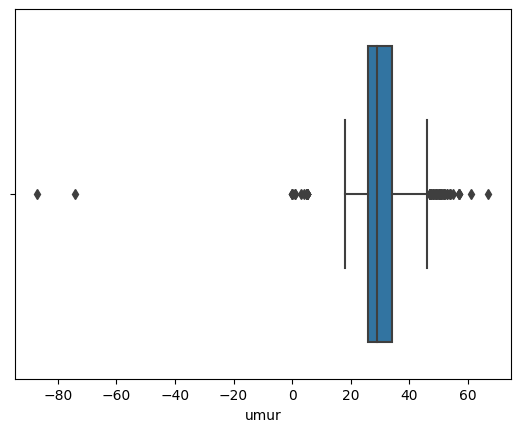

In [ ]:
sns.boxplot(x=df_mto2['umur'])

In [ ]:
q1 = df_mto2['umur'].quantile(0.25)
q3 = df_mto2['umur'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

def um(x):
    if x < lower_bound:
        return lower_bound
    elif x > upper_bound:
        return upper_bound
    else:
        return x
df_mto2['umur'] = df_mto2['umur'].apply(um)

df_mto2['umur'].value_counts()

27.0    173
29.0    139
26.0    138
30.0    128
28.0    128
25.0    105
31.0     99
32.0     95
24.0     94
35.0     89
21.0     82
22.0     81
46.0     80
33.0     65
23.0     65
34.0     50
36.0     49
39.0     44
38.0     38
37.0     35
41.0     34
40.0     27
20.0     26
43.0     25
42.0     21
14.0     20
44.0     14
19.0     13
45.0     11
18.0      5
Name: umur, dtype: int64

<Axes: xlabel='umur'>

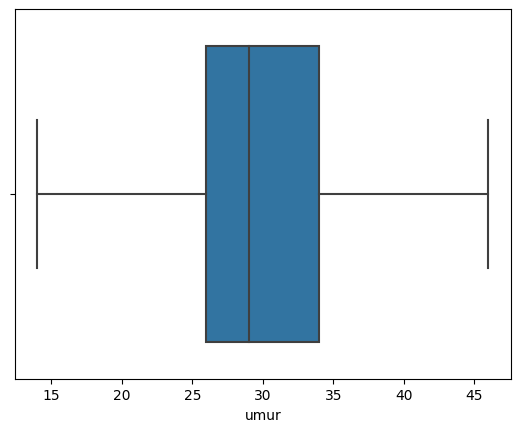

In [ ]:
sns.boxplot(x=df_mto2['umur'])

In [ ]:
mean_value = df_mto2['umur'].mean()
df_mto2['umur'].fillna(value=mean_value, inplace=True)

In [ ]:
df_mto2['umur'] = df_mto2['umur'].astype('int')

In [ ]:
df_mto2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             2721 non-null   object
 1   gender           2310 non-null   object
 2   statuskawin      1684 non-null   object
 3   prov             2336 non-null   object
 4   kendaraan        1958 non-null   object
 5   nohp             2660 non-null   object
 6   nohp_kel         1975 non-null   object
 7   email            2565 non-null   object
 8   pendidikan       2288 non-null   object
 9   jenisdsb         2721 non-null   object
 10  bidangkerja      1673 non-null   object
 11  training         1565 non-null   object
 12  alatbantu        1627 non-null   object
 13  keterampilan     1643 non-null   object
 14  pengalamankerja  2223 non-null   object
 15  taudifalink      1636 non-null   object
 16  jurusan          1352 non-null   object
 17  umur             2721 non-null   

fill the null values with unknown

In [ ]:
df_mto2 = df_mto2.fillna('unknown')

handling duplicate data

check duplicate data from name, no hp, and email columns

In [ ]:
#no hp
df_mto2['nohp'] = df_mto2['nohp'].str.lstrip('0')
df_mto2['nohp_kel'] = df_mto2['nohp_kel'].str.lstrip('0')

In [ ]:
df_mto2[df_mto2.duplicated(subset=['nama', 'nohp', 'nohp_kel', 'email'], keep=False)].sort_values('nama')

,nama,gender,statuskawin,prov,kendaraan,nohp,nohp_kel,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,keterampilan,pengalamankerja,taudifalink,jurusan,umur
1693,a. wahyudin murhadi,m,unknown,unknown,unknown,85256489566,unknown,unknown,Diploma,daksa,unknown,unknown,unknown,unknown,perangkat desa,unknown,unknown,29
2692,a. wahyudin murhadi,m,unknown,unknown,unknown,85256489566,unknown,unknown,Diploma,daksa,unknown,unknown,unknown,unknown,perangkat desa,unknown,unknown,29
385,achmad sidik firdaus,unknown,unknown,unknown,unknown,83806535543,unknown,achmad.sidik1989@gmail.com,unknown,tuli,unknown,unknown,unknown,unknown,unknown,unknown,unknown,30
384,achmad sidik firdaus,unknown,unknown,unknown,unknown,83806535543,unknown,achmad.sidik1989@gmail.com,unknown,tuli,unknown,unknown,unknown,unknown,unknown,unknown,unknown,30
2669,adeline yunita,f,single,Jawa Barat,pribadi,8987899871,896-4991-0147,Adelineyunita19@gmail.com,Sarjana,daksa,administrasi,unknown,unknown,https://drive.google.com/open?id=1pbjqoebyot1n...,1. pernah bekerja di saung angklung udjo bagia...,instagram,sastra inggris,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,yogi juliyanto,m,single,Jawa Barat,pribadi,87717838187,unknown,yogi.syn@gmail.com,SMA Sederajat,tuli,design grafis,unknown,unknown,"komputer, corel draw, adobe illustrator, adobe...",operator warnet dan karyawan bakso bakar,facebook,unknown,29
224,yonathan adi putra,m,single,DKI Jakarta,umum,87772561788,8111108018,unknown,SMP Sederajat,others,it,unknown,tidak ada hanya handphone,https://drive.google.com/open?id=14hsi3_ymfpgu...,"it support di kursus bahasa inggris elokuensi,...",teman,tidak pernah kuliah,46
231,yonathan adi putra,m,single,DKI Jakarta,umum,87772561788,8111108018,unknown,SMP Sederajat,others,it,unknown,tidak ada hanya handphone,https://drive.google.com/open?id=14hsi3_ymfpgu...,"it support di kursus bahasa inggris elokuensi,...",teman,tidak pernah kuliah,46
2050,yusron yoga pradana,m,single,Jawa Timur,pribadi,81555618109,85646548340,davanaga3@gmail.com,SMA Sederajat,daksa,administrasi,unknown,unknown,dapat mengoperasikan komputer,bekerja di bank mandiri sebagai agen call cent...,whatsapp,unknown,23


In [ ]:
df_mto2 = df_mto2.reset_index().drop_duplicates(subset=['nama', 'nohp', 'nohp_kel', 'email'])

In [ ]:
df_mto2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2656 entries, 0 to 2714
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            2656 non-null   int64 
 1   nama             2656 non-null   object
 2   gender           2656 non-null   object
 3   statuskawin      2656 non-null   object
 4   prov             2656 non-null   object
 5   kendaraan        2656 non-null   object
 6   nohp             2656 non-null   object
 7   nohp_kel         2656 non-null   object
 8   email            2656 non-null   object
 9   pendidikan       2656 non-null   object
 10  jenisdsb         2656 non-null   object
 11  bidangkerja      2656 non-null   object
 12  training         2656 non-null   object
 13  alatbantu        2656 non-null   object
 14  keterampilan     2656 non-null   object
 15  pengalamankerja  2656 non-null   object
 16  taudifalink      2656 non-null   object
 17  jurusan          2656 non-null   

unique values from prov

In [ ]:
df_mto2['prov'].unique()

array(['Jawa Barat', 'unknown', 'Jakarta', 'Jawa Tengah', 'Gorontalo',
       'Jawa Timur', 'Bali', 'Banten', 'Sumatera Selatan',
       'Kalimantan Timur', 'DKI Jakarta', 'Tangerang', 'Sumatera',
       'Kalimantan Barat', 'Sulawesi Selatan', 'Lampung', 'Jambi', 'Riau',
       'Sumatera Barat', 'NTB', 'Nusa Tenggara Barat', 'Bangka Belitung',
       'Kalimantan Utara', 'Bengkulu', 'Sumatera Utara', 'NTT', 'Aceh',
       'Kalimantan Tengah', 'Kalimantan', 'Maluku', 'Sulawesi Tenggara',
       'Papua', 'Sulawesi', 'Kalimantan Selatan', 'Kupang', 'Balikpapan',
       'Sulawesi Barat', 'DI Yogyakarta', 'Papua Barat', 'Sulawesi Utara',
       'Belitung', 'Sulawesi Tengah', 'Depok', 'Jawa barat',
       'Kepulauan Riau', 'Kota', 'Bogor', 'Kepulauan Bangka Belitung'],
      dtype=object)

In [ ]:
df_mto2[df_mto2['prov'] == 'Kota']

,index,nama,gender,statuskawin,prov,kendaraan,nohp,nohp_kel,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,keterampilan,pengalamankerja,taudifalink,jurusan,umur
2555,2555,indra bayu,m,single,Kota,pribadi,87777782309,89627470845,indrakaren92@gmail.com,Diploma,daksa,entry data ( input data ),admin,tidak,mengoperasikan komputer,operator warnet aura.net 3 tahun\n percetakan ...,instagram,unknown,32


In [ ]:
df_mto2['prov'] = df_mto2['prov'].replace(['Kota'], 'unknown')
df_mto2['prov'] = df_mto2['prov'].replace(['Belitung', 'Kepulauan Bangka Belitung'], 'Bangka Belitung')
df_mto2['prov'] = df_mto2['prov'].replace(['Tangerang'], 'Banten')
df_mto2['prov'] = df_mto2['prov'].replace(['Depok', 'Bogor'], 'Jawa Barat')
df_mto2['prov'] = df_mto2['prov'].replace(['Jakarta'], 'DKI Jakarta')
df_mto2['prov'] = df_mto2['prov'].replace(['Kupang'], 'NTT')
df_mto2['prov'] = df_mto2['prov'].replace(['Balikpapan'], 'Kalimantan Timur')

In [ ]:
df_mto2['prov'].unique()

array(['Jawa Barat', 'unknown', 'DKI Jakarta', 'Jawa Tengah', 'Gorontalo',
       'Jawa Timur', 'Bali', 'Banten', 'Sumatera Selatan',
       'Kalimantan Timur', 'Sumatera', 'Kalimantan Barat',
       'Sulawesi Selatan', 'Lampung', 'Jambi', 'Riau', 'Sumatera Barat',
       'NTB', 'Nusa Tenggara Barat', 'Bangka Belitung',
       'Kalimantan Utara', 'Bengkulu', 'Sumatera Utara', 'NTT', 'Aceh',
       'Kalimantan Tengah', 'Kalimantan', 'Maluku', 'Sulawesi Tenggara',
       'Papua', 'Sulawesi', 'Kalimantan Selatan', 'Sulawesi Barat',
       'DI Yogyakarta', 'Papua Barat', 'Sulawesi Utara',
       'Sulawesi Tengah', 'Jawa barat', 'Kepulauan Riau'], dtype=object)

In [ ]:
df_mto1 = df_mto2.copy()

In [ ]:
pd.DataFrame({'Features' : df_mto1.columns, 'dataType' : df_mto1.dtypes.values,
              'nullvalues' : [df_mto1[i].isna().sum() for i in df_mto1.columns],
              'unique' : [df_mto1[i].nunique() for i in df_mto1.columns],
              'uniqueSample' : [list(pd.Series(df_mto1[i].unique())) for i in df_mto1.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,index,int64,0,2656,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,nama,object,0,2607,"[tyaseta rabita nugraeni sardjono, ilham, deni..."
2,gender,object,0,3,"[f, unknown, m]"
3,statuskawin,object,0,4,"[single, unknown, married, divorced]"
4,prov,object,0,39,"[Jawa Barat, unknown, DKI Jakarta, Jawa Tengah..."
5,kendaraan,object,0,3,"[unknown, umum, pribadi]"
6,nohp,object,0,2426,"[85774181939, 87883789092, 81214148468, 811974..."
7,nohp_kel,object,0,1175,"[8128287008, unknown, 87776867180, 8992992015,..."
8,email,object,0,2275,"[Tyaseta.rabita@gmail.com, ilhamdd85@gmail.com..."
9,pendidikan,object,0,7,"[Sarjana, unknown, SMA Sederajat, Diploma, SMP..."


In [ ]:
df_mto1['alatbantu'].unique()

array(['tongkat putih, screen reader', 'unknown', 'kacamata', 'handphone',
       'tidak', 'belum ada', 'tongkat', 'tidak ada hanya handphone',
       'alat bantu dengar',
       'ya, hanya dipanggil saja bukan alat untuk menangkap pembicaraan',
       'ada', 'ya', 'tidak pakai.', 'gunakan alat bantu dengar',
       'tidak dengar', 'kerajinan koran tempat air mineral',
       'juru bahasa isyarat', 'tidak pakai abd', 'abd / tidak ada',
       'alat bantu dengar, walaupun jarang pakai', 'hearing aid',
       'tidak pakai alat bantu.\n hanya baca mimik lawan bicara.', 'iya',
       'belum ada tetapi bisa membaca gerak bibir', 'dengar', 'hilang',
       'alat dengar', 'ya, alat bantu dengar',
       'menggunakan alat bantu\n dengar sebelah kanan',
       'bahasa isyarat dan bantuan abd (alat bantu dengar)',
       'alat bantu dengar tapi sayang sudah rusak, saya tidak tuli sebenarnya kalo pake alat saya bisa dengar, saya normal hanya sedikit kurangnya',
       'produksi',
       'note tas

In [ ]:
unk = ['unknown']
tdk_list = df_mto1['alatbantu'].str.contains('tidak|tanpa|belum')
tdk = df_mto1['alatbantu'].loc[df_mto1.index[tdk_list]].tolist()

def cat_ab(x):
    if x in unk:
        return 'unknown'
    elif x in tdk:
        return 'tidak'
    else:
        return 'ya'
df_mto1['alatbantu'] = df_mto1['alatbantu'].apply(cat_ab)

In [ ]:
df_mto1['alatbantu'].value_counts()

unknown    2047
ya          315
tidak       294
Name: alatbantu, dtype: int64

In [ ]:
df_mto1['training'].unique()

array(['hrd', 'unknown', 'tidak', 'pembelajaran tentang mengelolah kasir',
       'memasak atau membuat kue', 'keterampilan', 'teknik interview',
       'training tentang desain atau pengetahuan seputar disabilitas.',
       'apa saja', 'sesuai prosedur yang berlaku diperusahaan',
       'yang sesuai dengan pekerjaan', 'offline dan online',
       'cleaning service', 'apa aja',
       'ms. word, ms. excel, ms. outlook, bahasa inggris, jualan online',
       'fotografi,photo editing', 'kosong',
       'akuntansi atau laporan keuangan', 'workshop', 'tidak.',
       'mulai kerja untuk latihan beberapa bulan, sudah bisa jadi langsung kerja keras dari latihan',
       'pelatihan kerja pt.sai',
       'magang yang bagian jurusan desain grafis dan admin.', 'kasir',
       'helper gudang', 'masak', 'bagian gudang/logistik', 'bakery',
       'komputer', 'iya setuju training', 'poduksi',
       'ya ingin, butuh sertifikat barista',
       'it, desain grafis, web ui ux, microsoft excel',
       '

In [ ]:
tdk_list = df_mto1['training'].str.contains('tidak|tanpa|belum|kosong|unknown')
tdk = df_mto1['training'].loc[df_mto1.index[tdk_list]].tolist()

def cat_tr(x):
    if x in tdk:
        return 'tidak'
    else:
        return 'ya'
df_mto1['training'] = df_mto1['training'].apply(cat_tr)

In [ ]:
df_mto1['training'].value_counts()

tidak    2201
ya        455
Name: training, dtype: int64

In [ ]:
df_mto1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2656 entries, 0 to 2714
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            2656 non-null   int64 
 1   nama             2656 non-null   object
 2   gender           2656 non-null   object
 3   statuskawin      2656 non-null   object
 4   prov             2656 non-null   object
 5   kendaraan        2656 non-null   object
 6   nohp             2656 non-null   object
 7   nohp_kel         2656 non-null   object
 8   email            2656 non-null   object
 9   pendidikan       2656 non-null   object
 10  jenisdsb         2656 non-null   object
 11  bidangkerja      2656 non-null   object
 12  training         2656 non-null   object
 13  alatbantu        2656 non-null   object
 14  keterampilan     2656 non-null   object
 15  pengalamankerja  2656 non-null   object
 16  taudifalink      2656 non-null   object
 17  jurusan          2656 non-null   

In [ ]:
df_mto1['umur'] = df_mto1['umur'].replace(['unknown'], 0)

In [ ]:
df_mto1['umur'].value_counts()

30    870
27    164
29    136
26    128
28    128
25    103
31     97
32     95
24     89
35     87
46     79
22     76
21     76
33     64
23     61
36     49
34     48
39     43
38     38
37     35
41     34
40     27
20     25
43     23
42     21
14     19
44     14
19     12
45     11
18      4
Name: umur, dtype: int64

In [ ]:
df_mto1['taudifalink'].unique()

array(['unknown', 'facebook', 'instagram', 'linkedin', 'teman',
       'facebook, instagram', 'instagram, teman', 'event, teman',
       'yayasan talenta', 'informasi dari grup difalink',
       'wa resmi dafalink', 'ig', 'ig/wa', 'wa', 'ig/fb',
       'enggar restu p', 'telegram', 'grup', 'instagram;teman',
       'facebook;lainnya', 'facebook, instagram, twitter',
       'instagram, teman, lainnya', 'instagram, lainnya',
       'facebook, instagram, teman, lainnya',
       'facebook, instagram, teman',
       'facebook, instagram, twitter, event, teman, lainnya',
       'facebook;instagram;teman', 'twitter', 'instagram;teman;lainnya',
       'facebook, teman', 'facebook, event', 'teman, lainnya', 'whatsapp',
       'event', 'group whatsapp', 'facebook, instagram, event, teman',
       'grup wa', 'event, teman, lainnya', 'jobhunter.id', 'website',
       'googling', 'grup wa info lowongan kerja', 'google',
       'event;lainnya', 'facebook;instagram', 'facebook, twitter',
       'inst

In [ ]:
unk = ['unknown']
wa_list = df_mto1['taudifalink'].str.contains('wa|whatsapp|grup')
wa =df_mto1['taudifalink'].loc[df_mto1.index[wa_list]].tolist()
df_mto1['taudifalink'] = df_mto1['taudifalink'].replace(['website','googling','google'], 'website difalink')
df_mto1['taudifalink'] = df_mto1['taudifalink'].replace(['yayasan talenta','enggar restu p','jobhunter.id'], 'others')
df_mto1['taudifalink'] = df_mto1['taudifalink'].replace(['ig'], 'instagram')

def cat_td(x):
    if x in unk:
        return 'unknown'
    elif x in wa:
        return 'whatsapp'
    else:
        return x
df_mto1['taudifalink'] = df_mto1['taudifalink'].apply(cat_td)

In [ ]:
td = pd.DataFrame()

In [ ]:
td = df_mto1['taudifalink'].str.split(',|/|;', expand=True)

In [ ]:
td.head()

,0,1,2,3,4,5
0,unknown,None,None,None,None,None
1,unknown,None,None,None,None,None
2,unknown,None,None,None,None,None
3,unknown,None,None,None,None,None
4,unknown,None,None,None,None,None


In [ ]:
td.drop([1,2,3,4,5], axis = 1, inplace=True)

In [ ]:
td[0] = td[0].replace(['ig'], 'instagram')
td[0] = td[0].replace(['google'], 'website difalink')
td[0].value_counts()

unknown             2010
instagram            316
teman                164
facebook             113
whatsapp              18
event                  9
twitter                9
linkedin               8
website difalink       5
others                 3
telegram               1
Name: 0, dtype: int64

In [ ]:
df_mto1['taudifalink'] = td[0]

In [ ]:
df_mto1['taudifalink'].unique()

array(['unknown', 'facebook', 'instagram', 'linkedin', 'teman', 'event',
       'others', 'whatsapp', 'telegram', 'twitter', 'website difalink'],
      dtype=object)

In [ ]:
df_mto1['taudifalink'].value_counts()

unknown             2010
instagram            316
teman                164
facebook             113
whatsapp              18
event                  9
twitter                9
linkedin               8
website difalink       5
others                 3
telegram               1
Name: taudifalink, dtype: int64

In [ ]:
df_mto1['jurusan'].value_counts()

unknown                                    2554
teknik informatika                            4
ips                                           3
0                                             3
psikologi                                     2
                                           ... 
s1 dkv animasi                                1
arsitektur                                    1
psikologi s1                                  1
sarjana 1 pengembangan masyarakat islam       1
smk otomotif                                  1
Name: jurusan, Length: 92, dtype: int64

In [ ]:
len(df_mto1[df_mto1['jurusan'] == 'unknown'])/len(df_mto1)

0.9615963855421686

96% data in "jurusan" column is unknown, so that we will just delete this column.

In [ ]:
df_mto1.drop(['jurusan', 'index'], axis=1,inplace=True)

In [ ]:
df_mto1.head()

,nama,gender,statuskawin,prov,kendaraan,nohp,nohp_kel,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,keterampilan,pengalamankerja,taudifalink,umur
0,tyaseta rabita nugraeni sardjono,f,single,Jawa Barat,unknown,85774181939,8128287008,Tyaseta.rabita@gmail.com,Sarjana,others,psikologi,ya,ya,psikotes,"2013 pt daino hr consultant, as human resource...",unknown,36
1,ilham,unknown,unknown,unknown,unknown,87883789092,unknown,ilhamdd85@gmail.com,unknown,others,unknown,tidak,unknown,unknown,unknown,unknown,30
2,deni nurmansyah,unknown,unknown,unknown,unknown,81214148468,unknown,nurmansyahdeni84@gmail.com,unknown,others,unknown,tidak,unknown,unknown,unknown,unknown,30
3,aini indria wardhani,unknown,unknown,unknown,unknown,8119742202,unknown,indriaw@gmail.com,unknown,others,unknown,tidak,unknown,unknown,unknown,unknown,30
4,irfa sahara,unknown,unknown,unknown,unknown,89529749491,unknown,irfa.sahara@gmail.com,unknown,others,unknown,tidak,unknown,unknown,unknown,unknown,30


In [ ]:
df_mto1['bidangkerja'].unique()

array(['psikologi', 'unknown', 'administrasi', 'fnb', 'content writing',
       'warehouse, crew store', 'kasir, administrasi', 'crew store',
       'guru slb', 'koki atau pembuat kue', 'penulis',
       'content writer, copywriter, social media specialist, digital marketing',
       'desain grafis dan illustrator', 'pelayan', 'admin/ staff/ helper',
       'hr atau marketing', 'crew store alfamart',
       'cleaning service atau bagian gudang', 'belum ada',
       'design grafis', 'it', 'komunikasi dan informasi',
       'freelance lukis, kasir parkir, cuci piring', 'desain grafis',
       'harapan harus kerja keras yang lebih baik', 'perhotelan',
       'pekerja memasang rangkaian kabel khusus untuk mobil di pabrik pt.sai',
       'sales', 'indomart', 'hotel', 'kfc', 'trans tv', 'amanda', 'admin',
       'staf administrasi', 'barista',
       'administrasi atau perencanaan wilayah kota (seperti mengerjakan laporan di words atau excell)',
       'admin hr', 'pelayanan', 'star gudang',

In [ ]:
unk = ['unknown']

it_list = df_mto1['bidangkerja'].str.contains('it|teknologi|web|programmer|IT|teknologi')
it = df_mto1['bidangkerja'].loc[df_mto1.index[it_list]].tolist()

sl_list = df_mto1['bidangkerja'].str.contains('sales|marketing|Sales|telemarketing|pemasaran')
sl = df_mto1['bidangkerja'].loc[df_mto1.index[sl_list]].tolist()

cw_list = df_mto1['bidangkerja'].str.contains('writing|content|Content|naskah|penulis')
cw = df_mto1['bidangkerja'].loc[df_mto1.index[cw_list]].tolist()

adm_list = df_mto1['bidangkerja'].str.contains('administrasi|administarsi|administration|adminitrasi|cs|customer|call|Administrasi|hr|admin')
adm = df_mto1['bidangkerja'].loc[df_mto1.index[adm_list]].tolist()

dg_list = df_mto1['bidangkerja'].str.contains('design|desain|Design')
dg = df_mto1['bidangkerja'].loc[df_mto1.index[dg_list]].tolist()

ph_list = df_mto1['bidangkerja'].str.contains('perhotelan|Perhotelan|hotel')
ph = df_mto1['bidangkerja'].loc[df_mto1.index[ph_list]].tolist()

fb_list = df_mto1['bidangkerja'].str.contains('fnb|f&b|FnB')
fb = df_mto1['bidangkerja'].loc[df_mto1.index[fb_list]].tolist()

def cat_bk(x):
    if x in unk:
        return 'unknown'
    elif x in cw:
        return 'Content writing'
    elif x in it:
        return 'IT'
    elif x in adm:
        return 'Administrasi'
    elif x in ph:
        return 'Perhotelan'
    elif x in dg:
        return 'Design grafis'
    elif x in sl:
        return 'Sales'
    elif x in fb:
        return 'FnB'
    else:
        return 'Others'
df_mto1['bidangkerja'] = df_mto1['bidangkerja'].apply(cat_bk)
df_mto1['bidangkerja'].value_counts()

unknown            1897
Others              307
Administrasi        277
IT                   59
Design grafis        43
Content writing      21
Perhotelan           20
FnB                  18
Sales                14
Name: bidangkerja, dtype: int64

In [ ]:
pd.DataFrame({'Features' : df_mto1.columns, 'dataType' : df_mto1.dtypes.values,
              'nullvalues' : [df_mto1[i].isna().sum() for i in df_mto1.columns],
              'unique' : [df_mto1[i].nunique() for i in df_mto1.columns],
              'uniqueSample' : [list(pd.Series(df_mto1[i].unique())) for i in df_mto1.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,nama,object,0,2607,"[tyaseta rabita nugraeni sardjono, ilham, deni..."
1,gender,object,0,3,"[f, unknown, m]"
2,statuskawin,object,0,4,"[single, unknown, married, divorced]"
3,prov,object,0,39,"[Jawa Barat, unknown, DKI Jakarta, Jawa Tengah..."
4,kendaraan,object,0,3,"[unknown, umum, pribadi]"
5,nohp,object,0,2426,"[85774181939, 87883789092, 81214148468, 811974..."
6,nohp_kel,object,0,1175,"[8128287008, unknown, 87776867180, 8992992015,..."
7,email,object,0,2275,"[Tyaseta.rabita@gmail.com, ilhamdd85@gmail.com..."
8,pendidikan,object,0,7,"[Sarjana, unknown, SMA Sederajat, Diploma, SMP..."
9,jenisdsb,object,0,4,"[others, tuli, netra, daksa]"


In [ ]:
df_mto1['pengalamankerja'].unique()

array(["2013 pt daino hr consultant, as human resources analyst and rrecruitment assess current employee, recruit new employee, using psychotest (pid, disc, dap, track test, wartegg test), and interview. 2 2012 pt prisma teknologi informatika, as data indexer edited text, cropping, input data to database system 3 2011 pt magfood amazy, as hrd & ga manager recruitment new employee, create new employee regulation based on the government's regulation, manage inventory. 4 2011 pt century health care, as store manager manage and report sale activity, finance treasury and banking, medicines and other product inventory, trains staff, manage customer satisfaction. 5 2008-2011 rajawali counseling indonesia as psychotest tester and consultant. do psychological test using dap, baum, htp, papikostic, etc. and assist customers to solve their problem 6 2007-2008 panti sosial wisma tuna ganda (multi disable residential care)-depok, as internship help staff in giving therapy, clean facility, accompany

In [ ]:
unk = ['unknown']
tdk_list = df_mto1['pengalamankerja'].str.contains('tidak|tanpa|belum|fresh graduate|no|experience')
tdk = df_mto1['pengalamankerja'].loc[df_mto1.index[tdk_list]].tolist()

def cat_pk(x):
    if x in unk:
        return 'unknown'
    elif x in tdk:
        return 'tidak'
    else:
        return 'ya'
df_mto1['pengalamankerja'] = df_mto1['pengalamankerja'].apply(cat_ab)

In [ ]:
df_mto1['pengalamankerja'].value_counts()

ya         1395
unknown     872
tidak       389
Name: pengalamankerja, dtype: int64

In [ ]:
df_mto1.drop(['keterampilan'], axis=1, inplace=True)

In [ ]:
pd.DataFrame({'Features' : df_mto1.columns, 'dataType' : df_mto1.dtypes.values,
              'nullvalues' : [df_mto1[i].isna().sum() for i in df_mto1.columns],
              'unique' : [df_mto1[i].nunique() for i in df_mto1.columns],
              'uniqueSample' : [list(pd.Series(df_mto1[i].unique())) for i in df_mto1.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,nama,object,0,2607,"[tyaseta rabita nugraeni sardjono, ilham, deni..."
1,gender,object,0,3,"[f, unknown, m]"
2,statuskawin,object,0,4,"[single, unknown, married, divorced]"
3,prov,object,0,39,"[Jawa Barat, unknown, DKI Jakarta, Jawa Tengah..."
4,kendaraan,object,0,3,"[unknown, umum, pribadi]"
5,nohp,object,0,2426,"[85774181939, 87883789092, 81214148468, 811974..."
6,nohp_kel,object,0,1175,"[8128287008, unknown, 87776867180, 8992992015,..."
7,email,object,0,2275,"[Tyaseta.rabita@gmail.com, ilhamdd85@gmail.com..."
8,pendidikan,object,0,7,"[Sarjana, unknown, SMA Sederajat, Diploma, SMP..."
9,jenisdsb,object,0,4,"[others, tuli, netra, daksa]"


In [ ]:
df_mto1.to_csv('masterdata_preparation.csv', index=False)

In [ ]:
df_mto3 = df_mto1.copy()

In [ ]:
import numpy as np
df_mto3 = df_mto3.replace(['unknown'], np.nan)

In [ ]:
pd.DataFrame({'Features' : df_mto3.columns, 'dataType' : df_mto3.dtypes.values,
              'nullvalues' : [df_mto3[i].isna().sum() for i in df_mto3.columns],
              'percentnullvalues' : [df_mto3[i].isnull().sum() * 100 / len(df_mto3) for i in df_mto3.columns],
              'unique' : [df_mto3[i].nunique() for i in df_mto3.columns],
              'uniqueSample' : [list(pd.Series(df_mto3[i].unique())) for i in df_mto3.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,percentnullvalues,unique,uniqueSample
0,nama,object,0,0.000000,2607,"[tyaseta rabita nugraeni sardjono, ilham, deni..."
1,gender,object,708,26.656627,2,"[f, nan, m]"
2,statuskawin,object,1885,70.971386,3,"[single, nan, married, divorced]"
3,prov,object,578,21.762048,38,"[Jawa Barat, nan, DKI Jakarta, Jawa Tengah, Go..."
4,kendaraan,object,1501,56.513554,2,"[nan, umum, pribadi]"
5,nohp,object,173,6.513554,2425,"[85774181939, 87883789092, 81214148468, 811974..."
6,nohp_kel,object,1442,54.292169,1174,"[8128287008, nan, 87776867180, 8992992015, 817..."
7,email,object,237,8.923193,2274,"[Tyaseta.rabita@gmail.com, ilhamdd85@gmail.com..."
8,pendidikan,object,749,28.200301,6,"[Sarjana, nan, SMA Sederajat, Diploma, SMP Sed..."
9,jenisdsb,object,0,0.000000,4,"[others, tuli, netra, daksa]"


###4.6 List of Job Applicants

In [ ]:
df_lja = pd.read_csv("https://docs.google.com/spreadsheets/d/1JcEAvgu_lXUuwZd86uC0Nf91iscafQZZTdNE9vO2rvc/export?gid=1827506521&format=csv")

In [ ]:
df_lja

,Nama Lengkap,Jenis Kelamin,Umur,Kabupaten/Kota,Provinsi,Jenis Disabilitas,Nama Perusahaan,Cabang,Posisi,Pendidikan,Shifting
0,Mochamad Kharis Suryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,NaN,NaN
1,Mochamad Kharis Suryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Accounting Officer,NaN,NaN
2,Adi Prabowo,Laki-laki,24,Jakarta Timur,DKI Jakarta,Disabilitas Fisik,Alfamart,BEKASI,Crew Store,NaN,NaN
3,Mochamad KharisSuryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,NaN,NaN
4,Nurlaila Selo Rahmawati,Perempuan,26,Kab. Karanganyar,Jawa Tengah,Tuli,PT. Berdikari,Jakarta Pusat,Accounting Officer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
542,Elfina Dewi Melati Sitorus,Perempuan,38,Medan,Sumatera Utara,Disabilitas Fisik,"PT. Sumber Alfaria Trijaya, tbk",NaN,NaN,NaN,NaN
543,M Yurdiansyahputro,Laki-laki,21,Sidoarjo,Jawa Timur,Disabilitas Fisik,PT. INFOMEDIA NUSANTARA,Surabaya,Agent Call Center,NaN,NaN
544,ASROI BAIHAQI,Laki-laki,21,Kota Bekasi,Jawa Barat,Tuna netra tapi sebelah kiri doang,PT. Klik Eat Indonesia,NaN,NaN,NaN,NaN
545,Nurul Fadhilah,Perempuan,19,Jakarta Selatan,DKI Jakarta,Disabilitas Fisik,ALFAMART,BEKASI,Crew Store,SMA/SMK,NaN


In [ ]:
df_lja.head()

,Nama Lengkap,Jenis Kelamin,Umur,Kabupaten/Kota,Provinsi,Jenis Disabilitas,Nama Perusahaan,Cabang,Posisi,Pendidikan,Shifting
0,Mochamad Kharis Suryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,NaN,NaN
1,Mochamad Kharis Suryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Accounting Officer,NaN,NaN
2,Adi Prabowo,Laki-laki,24,Jakarta Timur,DKI Jakarta,Disabilitas Fisik,Alfamart,BEKASI,Crew Store,NaN,NaN
3,Mochamad KharisSuryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,NaN,NaN
4,Nurlaila Selo Rahmawati,Perempuan,26,Kab. Karanganyar,Jawa Tengah,Tuli,PT. Berdikari,Jakarta Pusat,Accounting Officer,NaN,NaN


In [ ]:
df_lja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nama Lengkap       547 non-null    object
 1   Jenis Kelamin      547 non-null    object
 2   Umur               547 non-null    int64 
 3   Kabupaten/Kota     547 non-null    object
 4   Provinsi           547 non-null    object
 5   Jenis Disabilitas  547 non-null    object
 6   Nama Perusahaan    547 non-null    object
 7   Cabang             340 non-null    object
 8   Posisi             340 non-null    object
 9   Pendidikan         206 non-null    object
 10  Shifting           12 non-null     object
dtypes: int64(1), object(10)
memory usage: 47.1+ KB


In [ ]:
df_lja.isna().sum()

Nama Lengkap           0
Jenis Kelamin          0
Umur                   0
Kabupaten/Kota         0
Provinsi               0
Jenis Disabilitas      0
Nama Perusahaan        0
Cabang               207
Posisi               207
Pendidikan           341
Shifting             535
dtype: int64

In [ ]:
# handling missing value
df_lja['Cabang'] = df_lja.Cabang.fillna("unknown")
df_lja['Cabang'].value_counts()

unknown          207
Jakarta Pusat     58
Surabaya          38
SIDOARJO          32
BEKASI            27
BANDUNG           23
BOGOR             21
JAKARTA           20
PARUNG            16
PALEMBANG         12
CIKOKOL           11
BANDUNG 2         10
MEDAN              8
BALARAJA           6
KARAWANG           6
BATAM              5
CILEUNGSI 2        5
PEKANBARU          5
MALANG             5
JABODETABEK        4
SEMARANG           4
MAKASAR            4
SERANG             3
Bekasi             3
CILACAP            3
KLATEN             2
JEMBER             2
PLUMBON            2
LAMPUNG            2
KOTABUMI           1
CIANJUR            1
BALI               1
Name: Cabang, dtype: int64

In [ ]:
df_lja['Posisi'] = df_lja.Posisi.fillna("unknown")
df_lja['Posisi'].value_counts()

unknown                    207
Crew Store                 125
Helper                      95
Agent Call Center           38
Cashier                     34
Administrasi                23
Public Relation Officer     15
Accounting Officer           9
Petugas Pom Bensin           1
Name: Posisi, dtype: int64

In [ ]:
df_lja['Pendidikan'] = df_lja.Pendidikan.fillna("unknown")
df_lja['Pendidikan'].value_counts()

unknown        341
SMA/SMK        170
D4/S1           23
D3               6
D1               3
SMA/SMK, D1      2
D3, D4/S1        1
D3, S2           1
Name: Pendidikan, dtype: int64

In [ ]:
df_lja['Shifting'] = df_lja.Shifting.fillna("unknown")
df_lja['Shifting'].value_counts()

unknown    535
Ya          12
Name: Shifting, dtype: int64

In [ ]:
#after imputation missing values
df_lja.isna().sum()

Nama Lengkap         0
Jenis Kelamin        0
Umur                 0
Kabupaten/Kota       0
Provinsi             0
Jenis Disabilitas    0
Nama Perusahaan      0
Cabang               0
Posisi               0
Pendidikan           0
Shifting             0
dtype: int64

In [ ]:
df_lja.head()

,Nama Lengkap,Jenis Kelamin,Umur,Kabupaten/Kota,Provinsi,Jenis Disabilitas,Nama Perusahaan,Cabang,Posisi,Pendidikan,Shifting
0,Mochamad Kharis Suryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,unknown,unknown
1,Mochamad Kharis Suryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Accounting Officer,unknown,unknown
2,Adi Prabowo,Laki-laki,24,Jakarta Timur,DKI Jakarta,Disabilitas Fisik,Alfamart,BEKASI,Crew Store,unknown,unknown
3,Mochamad KharisSuryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,unknown,unknown
4,Nurlaila Selo Rahmawati,Perempuan,26,Kab. Karanganyar,Jawa Tengah,Tuli,PT. Berdikari,Jakarta Pusat,Accounting Officer,unknown,unknown


###4.7 List of Users that are succesfully recruited via Difalink

In [ ]:
df_lu = pd.read_csv("https://docs.google.com/spreadsheets/d/1YsY-_0oRspbQyz93SgWuHkGgZtAyb-8f/export?gid=2040170700&format=csv")

In [ ]:
df_lu.head()

,No,name,Gender,disability,area,company,position,start date,finish date,PIC,Nomor HP
0,1,Ade muhamad iman,NaN,Polio,Bandung,Alfamart,warehouse,01/Oct/2018,18/Mar/2019,Ibu Yara,NaN
1,2,R guntur saetapi,NaN,Polio one leg,Bandung,Alfamart,crewstore,01/Oct/2018,present,Ibu Yara,NaN
2,3,Ujang maulana r,NaN,Conginental Hand,Bandung,Alfamart,warehouse,01/Oct/2018,present,Ibu Yara,NaN
3,4,Moh Duta Prakarsa,NaN,Deaf,Bandung,Alfamart,warehouse,01/Oct/2018,present,Ibu Yara,NaN
4,5,Devi Juariah,NaN,Deaf,Bandung,Alfamart,crewstore,01/Oct/2018,18/Feb/2019,Ibu Yara,NaN


In [ ]:
df_lu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No           127 non-null    int64 
 1   name         127 non-null    object
 2   Gender       111 non-null    object
 3   disability   121 non-null    object
 4   area         127 non-null    object
 5   company      127 non-null    object
 6   position     121 non-null    object
 7   start date   98 non-null     object
 8   finish date  35 non-null     object
 9   PIC          78 non-null     object
 10  Nomor HP     34 non-null     object
dtypes: int64(1), object(10)
memory usage: 11.0+ KB


In [ ]:
df_lu.nunique()

No             127
name           121
Gender           2
disability      21
area            43
company         41
position        39
start date      62
finish date     14
PIC             35
Nomor HP        29
dtype: int64

In [ ]:
print(df_lu.isnull().sum())

No              0
name            0
Gender         16
disability      6
area            0
company         0
position        6
start date     29
finish date    92
PIC            49
Nomor HP       93
dtype: int64


1. Gender

In [ ]:
df_lu['Gender'].value_counts()

L    66
P    45
Name: Gender, dtype: int64

In [ ]:
df_lu['Gender'].isnull().sum()

16

In [ ]:
df_lu['Gender']=df_lu['Gender'].fillna('Unknown')

2. Disability

In [ ]:
df_lu['disability'].value_counts()

Daksa                                          39
Tuli                                           18
ADHD                                           13
Deaf                                           10
DAKSA                                           7
Tunanetra                                       7
TULI                                            6
Tuna netra                                      4
Daksa Kaki                                      3
Blind                                           2
Tuna Daksa                                      2
Hard of Hearing                                 1
Autis                                           1
Low Vision                                      1
Polio                                           1
Tuna Netra                                      1
Polio one leg                                   1
Amputee                                         1
Prostese kaki kanan dan jari2 tidak lengkap     1
Conginental Hand                                1


We can see that those types of disabilities can be categorized into these four main types:
- Daksa
- Tuli
- Netra
- Others

1) Daksa

all physics disabilities will be categorized into Daksa

In [ ]:
df_lu['disability'][df_lu['disability'] == 'DAKSA'] = 'Daksa'
df_lu['disability'][df_lu['disability'] == 'Daksa Kaki'] = 'Daksa'
df_lu['disability'][df_lu['disability'] == 'Tuna Daksa'] = 'Daksa'
df_lu['disability'][df_lu['disability'] == 'Polio'] = 'Daksa'
df_lu['disability'][df_lu['disability'] == 'Polio one leg'] = 'Daksa'
df_lu['disability'][df_lu['disability'] == 'Amputee'] = 'Daksa'
df_lu['disability'][df_lu['disability'] == 'Prostese kaki kanan dan jari2 tidak lengkap'] = 'Daksa'
df_lu['disability'][df_lu['disability'] == 'Conginental Hand'] = 'Daksa'

2) Tuli

all types of disabilities with hearing loss will be categorized into Tuli

In [ ]:
df_lu['disability'][df_lu['disability'] == 'Deaf'] = 'Tuli'
df_lu['disability'][df_lu['disability'] == 'TULI'] = 'Tuli'
df_lu['disability'][df_lu['disability'] == 'Hard of Hearing'] = 'Tuli'

3) Netra

all types of disabilities with visual impairment will be categorized into Netra

In [ ]:
df_lu['disability'][df_lu['disability'] == 'Tunanetra'] = 'Netra'
df_lu['disability'][df_lu['disability'] == 'Tuna netra'] = 'Netra'
df_lu['disability'][df_lu['disability'] == 'Blind'] = 'Netra'
df_lu['disability'][df_lu['disability'] == 'Low Vision'] = 'Netra'
df_lu['disability'][df_lu['disability'] == 'Tuna Netra'] = 'Netra'

4) Others

other types of disabilites will be categorized into Others

In [ ]:
df_lu['disability'][df_lu['disability'] == 'ADHD'] = 'Others'
df_lu['disability'][df_lu['disability'] == 'Autis'] = 'Others'
df_lu['disability'][df_lu['disability'] == 'Asperger'] = 'Others'

In [ ]:
#handling data null
df_lu['disability'].isnull().sum()

6

In [ ]:
df_lu['disability']=df_lu['disability'].fillna('Unknown')

In [ ]:
df_lu['disability'].value_counts()

Daksa      56
Tuli       35
Netra      15
Others     15
Unknown     6
Name: disability, dtype: int64

3. Area

In [ ]:
df_lu['area'].value_counts()

Jakarta                      28
Bali                         15
Bandung                      10
Tangerang                     8
Sidoarjo                      5
Semarang                      5
masih menunggu penempatan     4
Yogyakarta                    4
Bogor                         4
jakarta                       3
Malang                        3
Cileungsi                     3
BEKASI                        2
NTT                           2
Bekasi                        2
PARUNG                        2
Ciamis                        1
MEDAN                         1
BOGOR                         1
Jember                        1
KARAWANG                      1
SEMARANG                      1
Lampung                       1
Kota Pasuruan                 1
SIDOARJO                      1
MALANG                        1
sulawesi selatan              1
BATAM                         1
Pasuruan                      1
Banjarmasin                   1
Cikarang                      1
Medan (O

there are some areas (which are the same areas) but they divided into two types areas because of the capitalize word system

In [ ]:
df_lu['area']=df_lu['area'].str.upper()

In [ ]:
df_lu['area'].value_counts()

JAKARTA                      31
BALI                         15
BANDUNG                      10
TANGERANG                     9
SEMARANG                      6
SIDOARJO                      6
BOGOR                         5
MALANG                        4
MASIH MENUNGGU PENEMPATAN     4
BEKASI                        4
YOGYAKARTA                    4
CILEUNGSI                     3
NTT                           2
PARUNG                        2
MEDAN                         2
KARAWANG                      2
CILEUNGSI 2                   1
JEMBER                        1
LAMPUNG                       1
KOTA PASURUAN                 1
SULAWESI SELATAN              1
CIAMIS                        1
BATAM                         1
CIMAHI                        1
DENPASAR                      1
SURABAYA                      1
BANJARMASIN                   1
BALI/ONLINE                   1
CIKARANG                      1
MEDAN (ONLINE)                1
PASURUAN                      1
AMBON   

notes from the data that should be deleted: the word "online"

In [ ]:
df_lu['area'][df_lu['area'] == 'MEDAN (ONLINE)'] = 'MEDAN'

In [ ]:
df_lu['area'][df_lu['area'] == 'BALI/ONLINE'] = 'BALI'

after we do the research about the area of alfamart, the cileungsi 2 should be changed to cileungsi

In [ ]:
df_lu['area'][df_lu['area'] == 'CILEUNGSI 2'] = 'CILEUNGSI'

In [ ]:
#handling data null
df_lu['area'].isnull().sum()

0

In [ ]:
df_lu['area'].value_counts()

JAKARTA                      31
BALI                         16
BANDUNG                      10
TANGERANG                     9
SIDOARJO                      6
SEMARANG                      6
BOGOR                         5
MALANG                        4
MASIH MENUNGGU PENEMPATAN     4
YOGYAKARTA                    4
BEKASI                        4
CILEUNGSI                     4
MEDAN                         3
KARAWANG                      2
NTT                           2
PARUNG                        2
JEMBER                        1
LAMPUNG                       1
KOTA PASURUAN                 1
SULAWESI SELATAN              1
CIAMIS                        1
BATAM                         1
BANJARMASIN                   1
CIMAHI                        1
CILACAP                       1
CIKARANG                      1
PASURUAN                      1
AMBON                         1
DENPASAR                      1
SURABAYA                      1
KLATEN                        1
Name: ar

4. Company

In [ ]:
df_lu['company'].value_counts()

Alfamart                     57
Think.Web                     7
BEDO                          4
Indika Foundation             3
Tokopedia                     3
Surfaid                       3
Alfamidi                      2
Ngalup.co                     2
Campaign,id                   2
Brave Factor                  2
Fair Trade Indonesia          2
MANIKA                        2
Bukalapak                     2
Borwita                       2
Jembatan Bahasa               2
Reckitt Indonesia             2
Toped/Mitracomm               2
CIMB                          2
Loreal                        2
Pegadaian                     2
Avery Dennison                2
Kalbe Farma                   1
Maharani Craft                1
Sagala                        1
Alfamart Cileungsi            1
Ethical                       1
Alfamart Bekasi               1
BCA                           1
Infomedia Solusi Humanika     1
Made Tea                      1
EVOMO.ID                      1
SUrfaid 

there is company name that need to be changed: SUrfaid -> Surfaid, and Alfamart

In [ ]:
df_lu['company'][df_lu['company'] == 'SUrfaid'] = 'Surfaid'

In [ ]:
df_lu['company'][df_lu['company'] == 'Alfamart Cileungsi'] = 'Alfamart'

In [ ]:
df_lu['company'][df_lu['company'] == 'Alfamart Bekasi'] = 'Alfamart'

In [ ]:
#handling data null
df_lu['company'].isnull().sum()

0

In [ ]:
df_lu['company'].value_counts()

Alfamart                     59
Think.Web                     7
Surfaid                       4
BEDO                          4
Indika Foundation             3
Tokopedia                     3
CIMB                          2
Loreal                        2
Ngalup.co                     2
Campaign,id                   2
Brave Factor                  2
Fair Trade Indonesia          2
MANIKA                        2
Bukalapak                     2
Borwita                       2
Reckitt Indonesia             2
Jembatan Bahasa               2
Avery Dennison                2
Pegadaian                     2
Alfamidi                      2
Toped/Mitracomm               2
Novotel Mangga Dua            1
Infomedia Solusi Humanika     1
Sagala                        1
Ethical                       1
BPAKR                         1
BNI                           1
BCA                           1
Maharani Craft                1
Made Tea                      1
Swissotel                     1
EVOMO.ID

5. Position

In [ ]:
df_lu['position'].value_counts()

Crew Store                      17
Call Centre                     10
Content Writer                   9
Design Grafis                    9
warehouse                        8
CREW                             7
Content Writing                  6
Helper                           6
Pramuniaga                       4
crewstore                        4
Graphic Designer                 4
Helper (Progress)                3
Video Editor                     3
Marketing                        3
telesales                        2
Telesales                        2
SEO                              2
asistant HR n logistik           1
Mitra                            1
HR                               1
tax officer                      1
Crew                             1
helper retur                     1
Helper (Retur)                   1
Helper (Issuing)                 1
Accounting                       1
DEI officer                      1
Social Media Editorial           1
helper              

there are positions names that should be changed
1. Crew Store


crewstore, CREW, and Crew will be changed into Crew Store

In [ ]:
df_lu['position'][df_lu['position'] == 'crewstore'] = 'Crew Store'
df_lu['position'][df_lu['position'] == 'CREW'] = 'Crew Store'
df_lu['position'][df_lu['position'] == 'Crew'] = 'Crew Store'

2. Helper

helper, helper retur, Helper (Retur), Helper (Issuing), and Helper (Progress) will be changed into Helper as general

In [ ]:
df_lu['position'][df_lu['position'] == 'helper'] = 'Helper'
df_lu['position'][df_lu['position'] == 'helper retur'] = 'Helper'
df_lu['position'][df_lu['position'] == 'Helper (Retur)'] = 'Helper'
df_lu['position'][df_lu['position'] == 'Helper (Issuing)'] = 'Helper'
df_lu['position'][df_lu['position'] == 'Helper (Progress)'] = 'Helper'

3. Quality Control

QC will be changed into Quality Control to make it clear

In [ ]:
df_lu['position'][df_lu['position'] == 'QC'] = 'Quality Control'

4. Telesales

In [ ]:
df_lu['position'][df_lu['position'] == 'telesales'] = 'Telesales'

5. Content Writer

Content Writing is not a role job/position so that it will be changed into Content Writer

In [ ]:
df_lu['position'][df_lu['position'] == 'Content Writing'] = 'Content Writer'

6. Graphic Designer

In [ ]:
df_lu['position'][df_lu['position'] == 'Design Grafis'] = 'Graphic Designer'

In [ ]:
#handling data null
df_lu['position'].isnull().sum()

6

In [ ]:
df_lu['position']=df_lu['position'].fillna('Unknown')

In [ ]:
df_lu['position'].value_counts()

Crew Store                      29
Content Writer                  15
Graphic Designer                13
Helper                          13
Call Centre                     10
warehouse                        8
Unknown                          6
Pramuniaga                       4
Telesales                        4
Marketing                        3
Video Editor                     3
SEO                              2
Quality Control                  2
Receptionist                     1
Disability Inclusion Officer     1
Social Media Editorial           1
DEI officer                      1
HR                               1
Ilustrator                       1
asistant HR n logistik           1
Learning & Development           1
Picker                           1
Fuel Attendant                   1
digital marketing                1
Mitra                            1
Accounting                       1
tax officer                      1
Corporate Communication          1
Name: position, dtyp

6. Start Date

In [ ]:
df_lu['start date'] = pd.to_datetime(df_lu['start date'])

In [ ]:
#handling data null
df_lu['start date'].isnull().sum()

29

fill the null data with backfill method

In [ ]:
df_lu['start date'] = df_lu['start date'].bfill(axis ='rows')

In [ ]:
df_lu.head()

,No,name,Gender,disability,area,company,position,start date,finish date,PIC,Nomor HP
0,1,Ade muhamad iman,Unknown,Daksa,BANDUNG,Alfamart,warehouse,2018-10-01,18/Mar/2019,Ibu Yara,NaN
1,2,R guntur saetapi,Unknown,Daksa,BANDUNG,Alfamart,Crew Store,2018-10-01,present,Ibu Yara,NaN
2,3,Ujang maulana r,Unknown,Daksa,BANDUNG,Alfamart,warehouse,2018-10-01,present,Ibu Yara,NaN
3,4,Moh Duta Prakarsa,Unknown,Tuli,BANDUNG,Alfamart,warehouse,2018-10-01,present,Ibu Yara,NaN
4,5,Devi Juariah,Unknown,Tuli,BANDUNG,Alfamart,Crew Store,2018-10-01,18/Feb/2019,Ibu Yara,NaN


7. Finish Date

changed the data that has no format in date (like present) to none

In [ ]:
df_lu['finish date'][df_lu['finish date'] == 'present'] = None

then change the others into datetime format

In [ ]:
df_lu['finish date'] = pd.to_datetime(df_lu['finish date'])

In [ ]:
df_lu.head()

,No,name,Gender,disability,area,company,position,start date,finish date,PIC,Nomor HP
0,1,Ade muhamad iman,Unknown,Daksa,BANDUNG,Alfamart,warehouse,2018-10-01,2019-03-18,Ibu Yara,NaN
1,2,R guntur saetapi,Unknown,Daksa,BANDUNG,Alfamart,Crew Store,2018-10-01,NaT,Ibu Yara,NaN
2,3,Ujang maulana r,Unknown,Daksa,BANDUNG,Alfamart,warehouse,2018-10-01,NaT,Ibu Yara,NaN
3,4,Moh Duta Prakarsa,Unknown,Tuli,BANDUNG,Alfamart,warehouse,2018-10-01,NaT,Ibu Yara,NaN
4,5,Devi Juariah,Unknown,Tuli,BANDUNG,Alfamart,Crew Store,2018-10-01,2019-02-18,Ibu Yara,NaN


8. PIC

In [ ]:
df_lu['PIC'].value_counts()

Ibu Pretty                 13
Ibu Yara                   10
Pak Farhan                  7
Ibu Suci                    4
Ibu Rosita                  4
Pak Arya Mitracomm          4
Ibu Kariza                  2
Pak Tono                    2
Pak Jeff Kristianto         2
Pak Felix                   2
Ibu Siska                   2
Pak Arya                    2
Ibu Ila                     2
Ibu Ambar                   1
Pak Eko (HR)                1
Pak Yahya                   1
Pak Oki                     1
Ibu Made Roni               1
Ibu Irene                   1
Ibu Dwi                     1
Pak Bagus                   1
Ibu Desvy                   1
Ibu Maria                   1
Shelly Tri Yuliani (HR)     1
Pak OKI Infomedia           1
Ibu Andina/Rahma            1
Ibu Hafni                   1
Ibu Eli                     1
Mba Maria                   1
Mba Hani Surfaid            1
Phrisella Tasso             1
Ibu Andina                  1
Pak Guntur                  1
Pak Yana  

In [ ]:
#handling data null
df_lu['PIC'].isnull().sum()

49

In [ ]:
df_lu['PIC']=df_lu['PIC'].fillna('Unknown')

9. Nomor HP

In [ ]:
df_lu['Nomor HP'].value_counts()

+62-812-2080-8668    4
+62-81-1978-0546     2
+62-821-2811-3162    2
+62-852-6649-1255    1
+62-838-2309-4326    1
+62-857-1759-8846    1
+62-818-0826-2112    1
+62-822-3634-9022    1
+62-856-9258-3002    1
+62-81-1154-2937     1
+62-81-1653-2757     1
+62-822-1318-8948    1
+62-812-9198-8311    1
+62-812-6405-3696    1
+62-87-8460-6399     1
+62-838-7382-2589    1
+62-896-3441-8496    1
+62-852-6649-1256    1
+62-812-9466-0117    1
+62-878-7850-4626    1
+62-896-3825-6770    1
+62-85-9157-8052     1
+62-853-1689-4212    1
+62-857-1538-3705    1
+62-877-8537-7794    1
+62-813-1113-3444    1
+62-852-6649-1258    1
+62-852-6649-1257    1
+62-812-8532-3960    1
Name: Nomor HP, dtype: int64

In [ ]:
df_lu['Nomor HP'].isnull().sum()

93

In [ ]:
df_lu['Nomor HP']=df_lu['Nomor HP'].fillna('Unknown')

The Result

In [ ]:
df_lu

,No,name,Gender,disability,area,company,position,start date,finish date,PIC,Nomor HP
0,1,Ade muhamad iman,Unknown,Daksa,BANDUNG,Alfamart,warehouse,2018-10-01,2019-03-18,Ibu Yara,Unknown
1,2,R guntur saetapi,Unknown,Daksa,BANDUNG,Alfamart,Crew Store,2018-10-01,NaT,Ibu Yara,Unknown
2,3,Ujang maulana r,Unknown,Daksa,BANDUNG,Alfamart,warehouse,2018-10-01,NaT,Ibu Yara,Unknown
3,4,Moh Duta Prakarsa,Unknown,Tuli,BANDUNG,Alfamart,warehouse,2018-10-01,NaT,Ibu Yara,Unknown
4,5,Devi Juariah,Unknown,Tuli,BANDUNG,Alfamart,Crew Store,2018-10-01,2019-02-18,Ibu Yara,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
122,133,Frida Shine Petra Juniartha,P,Tuli,BALI,BEDO,Graphic Designer,2022-10-13,NaT,Unknown,Unknown
123,134,Naura Savira,P,Daksa,JAKARTA,Reckitt Indonesia,HR,2022-10-13,NaT,Unknown,Unknown
124,135,Riki Ependi,L,Daksa,LAMPUNG,Reckitt Indonesia,Corporate Communication,2022-11-21,NaT,Unknown,Unknown
125,136,Mazidatul Muna,P,Tuli,JEMBER,Alfamart,Crew Store,2022-06-01,NaT,Unknown,Unknown


In [ ]:
df_lu.to_csv('Hasil Preprocessing.csv')

###4.8 List of Job Vacancies

In [ ]:
df_ljv = pd.read_csv("https://docs.google.com/spreadsheets/d/1ziA66DTGrI8VIkxp7bpYG0hJQoqTfpMu/export?gid=369011475&format=csv")

the data is already clean (we do the cleaning part in excel) and we do the research on the salary of each jobs

In [ ]:
df_ljv

,Timestamp,Nama Perusahaan,Persyaratan,Pendidikan Minimal,Pengalaman,Jenis Disabilitas Yang Dicari,Posisi yang dicari,Penempatan,Besar Gaji (tak home pay) per bulan
0,3/22/2022,United Nations Volunteers Programme (UNV),Required experience\n3 years of experience in ...,S1,Yes,Semua Jenis,Communications and Campaign Officer (SDG Acade...,Jakarta,4641854
1,3/22/2022,United Nations Volunteers Programme (UNV),Required experience\n2 years of experience in ...,S1,Yes,Semua Jenis,Gender and Adolescent Development Officer,Jakarta,4641854
2,3/28/2022,United Nations Volunteers Programme (UNV),1. National or legal resident of Indonesia\n2....,SMA sederajat,Yes,Semua Jenis,Communications and Campaign Officer (SDG Acade...,Jakarta,4641854
3,3/28/2022,United Nations Volunteers Programme (UNV),1. National or legal resident of Indonesia\n2....,SMA sederajat,Yes,Semua Jenis,Communications and Campaign Officer (Outreach ...,Jakarta,4641854
4,4/19/2022,Persolkelly,•\tPendidikan minimal S1 di bidang IT\n•\tMemi...,S1,Yes,Daksa,Staff IT,Jakarta,4641854
5,4/28/2022,PT. Aneka Petroindo Raya,- Pria / Wanita\n- Usia 25 tahun (Paling maks...,SMA sederajat,No,Tuna Daksa,Fuel Attendant (Operator SPBU),Jakarta,4641854
6,4/28/2022,PT. Aneka Petroindo Raya,- Pria / Wanita\n- Usia 25 tahun (Paling maks...,SMA sederajat,No,Tuna Daksa,Fuel Attendant (Operator SPBU),Bogor,4273727
7,4/28/2022,PT. Aneka Petroindo Raya,- Pria / Wanita\n- Usia 25 tahun (Paling maks...,SMA sederajat,No,Tuna Daksa,Fuel Attendant (Operator SPBU),Depok,4377232
8,4/28/2022,PT. Aneka Petroindo Raya,- Pria / Wanita\n- Usia 25 tahun (Paling maks...,SMA sederajat,No,Tuna Daksa,Fuel Attendant (Operator SPBU),Tangerang,4285798
9,4/28/2022,PT. Aneka Petroindo Raya,- Pria / Wanita\n- Usia 25 tahun (Paling maks...,SMA sederajat,No,Tuna Daksa,Fuel Attendant (Operator SPBU),Bekasi,4804382


In [ ]:
df_ljv.isna().sum()

Timestamp                              0
Nama Perusahaan                        0
Persyaratan                            0
Pendidikan Minimal                     0
Pengalaman                             0
Jenis Disabilitas Yang Dicari          0
Posisi yang dicari                     0
Penempatan                             0
Besar Gaji (tak home pay) per bulan    0
dtype: int64

In [ ]:
df_ljv.isna().sum()/len(df_ljv)*100

Timestamp                              0.0
Nama Perusahaan                        0.0
Persyaratan                            0.0
Pendidikan Minimal                     0.0
Pengalaman                             0.0
Jenis Disabilitas Yang Dicari          0.0
Posisi yang dicari                     0.0
Penempatan                             0.0
Besar Gaji (tak home pay) per bulan    0.0
dtype: float64

In [ ]:
df_ljv = df_ljv.drop(['Persyaratan'],axis=1)

In [ ]:
df_ljv

,Timestamp,Nama Perusahaan,Pendidikan Minimal,Pengalaman,Jenis Disabilitas Yang Dicari,Posisi yang dicari,Penempatan,Besar Gaji (tak home pay) per bulan
0,3/22/2022,United Nations Volunteers Programme (UNV),S1,Yes,Semua Jenis,Communications and Campaign Officer (SDG Acade...,Jakarta,4641854
1,3/22/2022,United Nations Volunteers Programme (UNV),S1,Yes,Semua Jenis,Gender and Adolescent Development Officer,Jakarta,4641854
2,3/28/2022,United Nations Volunteers Programme (UNV),SMA sederajat,Yes,Semua Jenis,Communications and Campaign Officer (SDG Acade...,Jakarta,4641854
3,3/28/2022,United Nations Volunteers Programme (UNV),SMA sederajat,Yes,Semua Jenis,Communications and Campaign Officer (Outreach ...,Jakarta,4641854
4,4/19/2022,Persolkelly,S1,Yes,Daksa,Staff IT,Jakarta,4641854
5,4/28/2022,PT. Aneka Petroindo Raya,SMA sederajat,No,Tuna Daksa,Fuel Attendant (Operator SPBU),Jakarta,4641854
6,4/28/2022,PT. Aneka Petroindo Raya,SMA sederajat,No,Tuna Daksa,Fuel Attendant (Operator SPBU),Bogor,4273727
7,4/28/2022,PT. Aneka Petroindo Raya,SMA sederajat,No,Tuna Daksa,Fuel Attendant (Operator SPBU),Depok,4377232
8,4/28/2022,PT. Aneka Petroindo Raya,SMA sederajat,No,Tuna Daksa,Fuel Attendant (Operator SPBU),Tangerang,4285798
9,4/28/2022,PT. Aneka Petroindo Raya,SMA sederajat,No,Tuna Daksa,Fuel Attendant (Operator SPBU),Bekasi,4804382


In [ ]:
df_ljv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Timestamp                            37 non-null     object
 1   Nama Perusahaan                      37 non-null     object
 2   Pendidikan Minimal                   37 non-null     object
 3   Pengalaman                           37 non-null     object
 4   Jenis Disabilitas Yang Dicari        37 non-null     object
 5   Posisi yang dicari                   37 non-null     object
 6   Penempatan                           37 non-null     object
 7   Besar Gaji (tak home pay) per bulan  37 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 2.4+ KB


<a name='5'></a>
##5. Exploratory Data Analysis (EDA)

5.1 Master Data

In [ ]:
df_mp = pd.read_csv("https://docs.google.com/spreadsheets/d/1TcWCi4iYc12-CC0McgqDPl_amN-N3TBUaL2ETqDXdU4/export?gid=1403680235&format=csv")

In [ ]:
df_mp

,nama,gender,statuskawin,prov,kendaraan,nohp,nohp_kel,email,pendidikan,jenisdsb,bidangkerja,training,alatbantu,pengalamankerja,taudifalink,umur
0,tyaseta rabita nugraeni sardjono,f,single,Jawa Barat,unknown,85774181939,8128287008,Tyaseta.rabita@gmail.com,Sarjana,others,Others,ya,ya,tidak,unknown,36
1,ilham,unknown,unknown,unknown,unknown,87883789092,unknown,ilhamdd85@gmail.com,unknown,others,unknown,tidak,unknown,unknown,unknown,30
2,deni nurmansyah,unknown,unknown,unknown,unknown,81214148468,unknown,nurmansyahdeni84@gmail.com,unknown,others,unknown,tidak,unknown,unknown,unknown,30
3,aini indria wardhani,unknown,unknown,unknown,unknown,8119742202,unknown,indriaw@gmail.com,unknown,others,unknown,tidak,unknown,unknown,unknown,30
4,irfa sahara,unknown,unknown,unknown,unknown,89529749491,unknown,irfa.sahara@gmail.com,unknown,others,unknown,tidak,unknown,unknown,unknown,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,lalu akhmad yugian takdir,m,single,Nusa Tenggara Barat,umum,87762617435,87762617435,Lalutakdiir1@gmail.com,SMA Sederajat,daksa,Administrasi,tidak,ya,ya,teman,24
2652,muhammad rony,m,single,DKI Jakarta,umum,81210857258,8889214605,marsrony41@gmail.com,SMA Sederajat,daksa,Administrasi,tidak,ya,tidak,instagram,30
2653,muhammad tohirin firdaus,m,married,Jawa Tengah,pribadi,88214812682,85875481312,tohirinm03@gmail.com,SMA Sederajat,daksa,Content writing,tidak,unknown,ya,facebook,25
2654,gita rizkiyani,f,single,DKI Jakarta,umum,8.96E+11,8112000694,rizkianig@gmail.com,SMA Sederajat,daksa,Perhotelan,tidak,tidak,ya,linkedin,23


In [ ]:
df_mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama             2656 non-null   object
 1   gender           2656 non-null   object
 2   statuskawin      2656 non-null   object
 3   prov             2656 non-null   object
 4   kendaraan        2656 non-null   object
 5   nohp             2656 non-null   object
 6   nohp_kel         2655 non-null   object
 7   email            2656 non-null   object
 8   pendidikan       2656 non-null   object
 9   jenisdsb         2656 non-null   object
 10  bidangkerja      2656 non-null   object
 11  training         2656 non-null   object
 12  alatbantu        2656 non-null   object
 13  pengalamankerja  2656 non-null   object
 14  taudifalink      2656 non-null   object
 15  umur             2656 non-null   int64 
dtypes: int64(1), object(15)
memory usage: 332.1+ KB


In [ ]:
df_mp = df_mp.drop('pengalamankerja', axis = 1)

In [ ]:
df_mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nama         2656 non-null   object
 1   gender       2656 non-null   object
 2   statuskawin  2656 non-null   object
 3   prov         2656 non-null   object
 4   kendaraan    2656 non-null   object
 5   nohp         2656 non-null   object
 6   nohp_kel     2655 non-null   object
 7   email        2656 non-null   object
 8   pendidikan   2656 non-null   object
 9   jenisdsb     2656 non-null   object
 10  bidangkerja  2656 non-null   object
 11  training     2656 non-null   object
 12  alatbantu    2656 non-null   object
 13  taudifalink  2656 non-null   object
 14  umur         2656 non-null   int64 
dtypes: int64(1), object(14)
memory usage: 311.4+ KB


a) Difalink's User vs Indonesian People with Disabilities

Based on the data from the Central Bureau of Statistics (Badan Pusat Statistik) 2022, around 17 million people with disabilities are of productive age. From this number, only 7.6 million that are absorbed into the work. So that, the unemployment of productive age disabilities is around 9.4 million.

([<matplotlib.patches.Wedge at 0x7feb33410d00>,
 [Text(1.0999995668708422, 0.0009761577533434423, 'user_difalink'),
  Text(-1.0999995668495108, -0.0009761817909065445, 'disabilitas_produktif')],
 [Text(0.5999997637477321, 0.0005324496836418775, '0%'),
  Text(-0.5999997637360968, -0.0005324627950399332, '100%')])

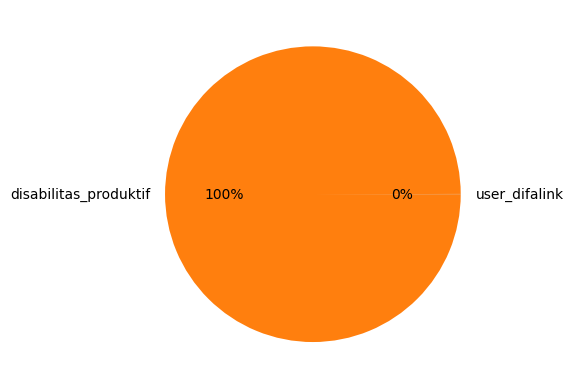

In [ ]:
data = [2656, 9400000]
keys = ['user_difalink', 'disabilitas_produktif' ]
plt.pie(data, labels=keys, autopct='%.00f%%')

When we compared to the total unemployment of productive age disability in Indonesia, disabled users are still very small. In fact, it is almost close to 0% of the comparison.

b) Gender of Difalink's User

In [ ]:
df_mp['gender'].value_counts()

m          1225
f           723
unknown     708
Name: gender, dtype: int64

In [ ]:
percent = pd.DataFrame(round(df_mp['gender'].value_counts()*100/df_mp['gender'].count(),2))
percent = percent.rename(columns={'gender':'Percent'})
percent

,Percent
m,46.12
f,27.22
unknown,26.66


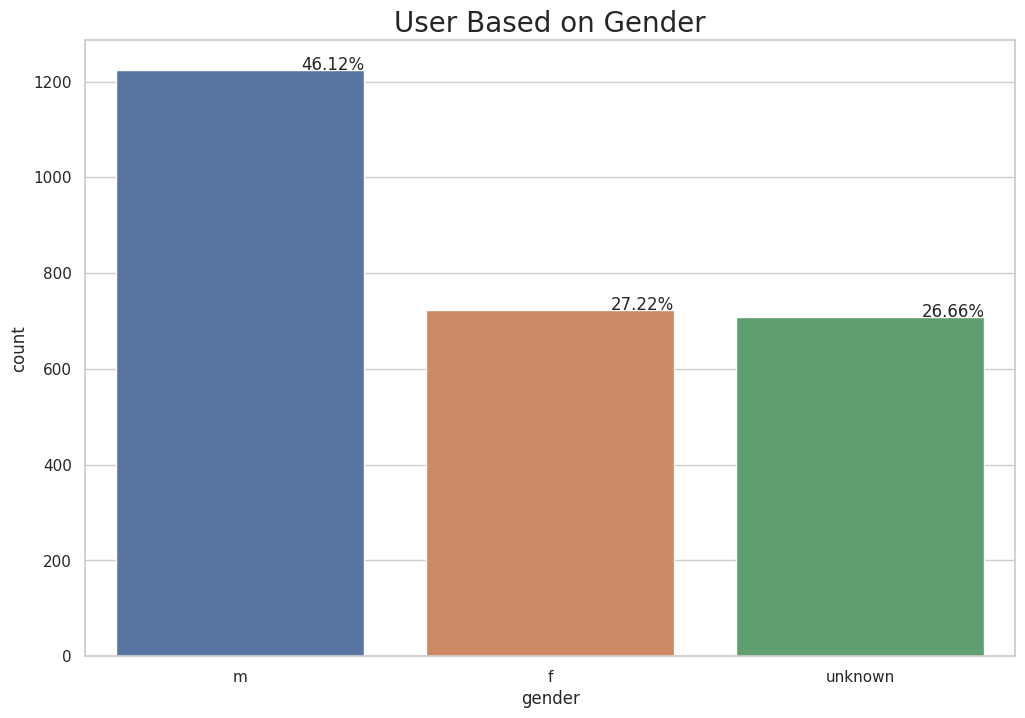

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(df_mp))
ax = sns.countplot(x="gender", data=df_mp, order=pd.value_counts(df_mp['gender']).iloc[:].index)
plt.title('User Based on Gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size = 12, rotation=0)
plt.xticks(rotation=0, ha='center')
plt.show()

Gender male has the most amount of users with percentage of 46.12%

c) Marital Status of Difalink's User

In [ ]:
df_mp['statuskawin'].value_counts()

unknown     1885
single       646
married      112
divorced      13
Name: statuskawin, dtype: int64

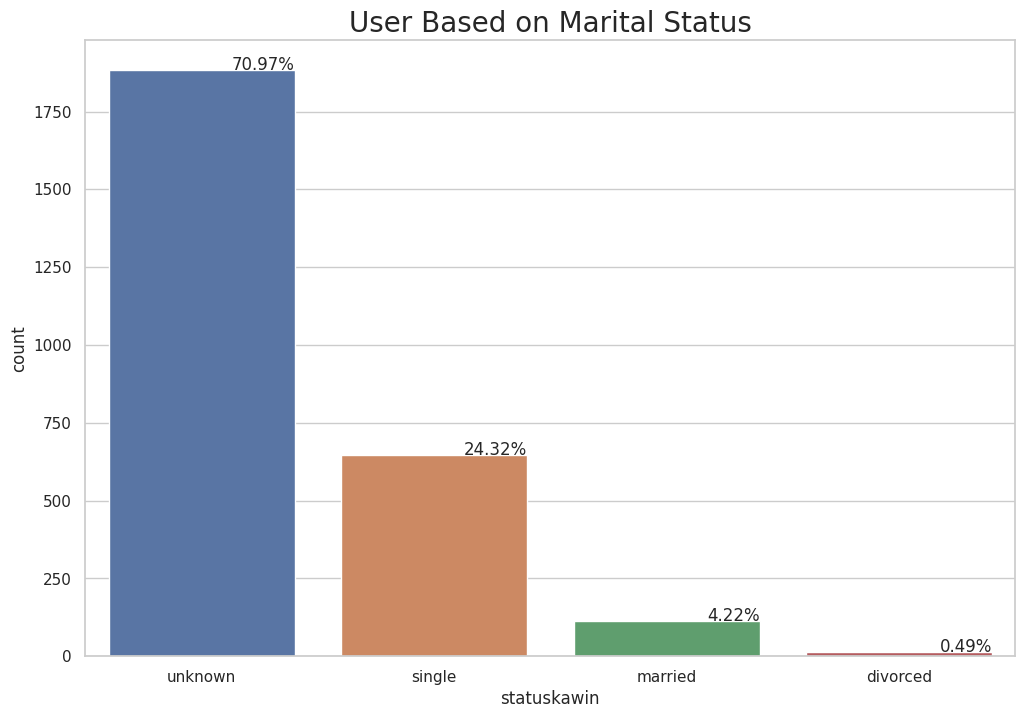

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(df_mp))
ax = sns.countplot(x="statuskawin", data=df_mp, order=pd.value_counts(df_mp['statuskawin']).iloc[:].index)
plt.title('User Based on Marital Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size = 12, rotation=0)
plt.xticks(rotation=0, ha='center')
plt.show()

The unknown data dominates the feature of the marital status of difalink's users. This data may not filled by some users during the registration. Difalink's users who are still single are far more than 6 times than the married ones. While widowed users are 0.49% of all users.

d) Gender and Marital Status of Difalink's Users

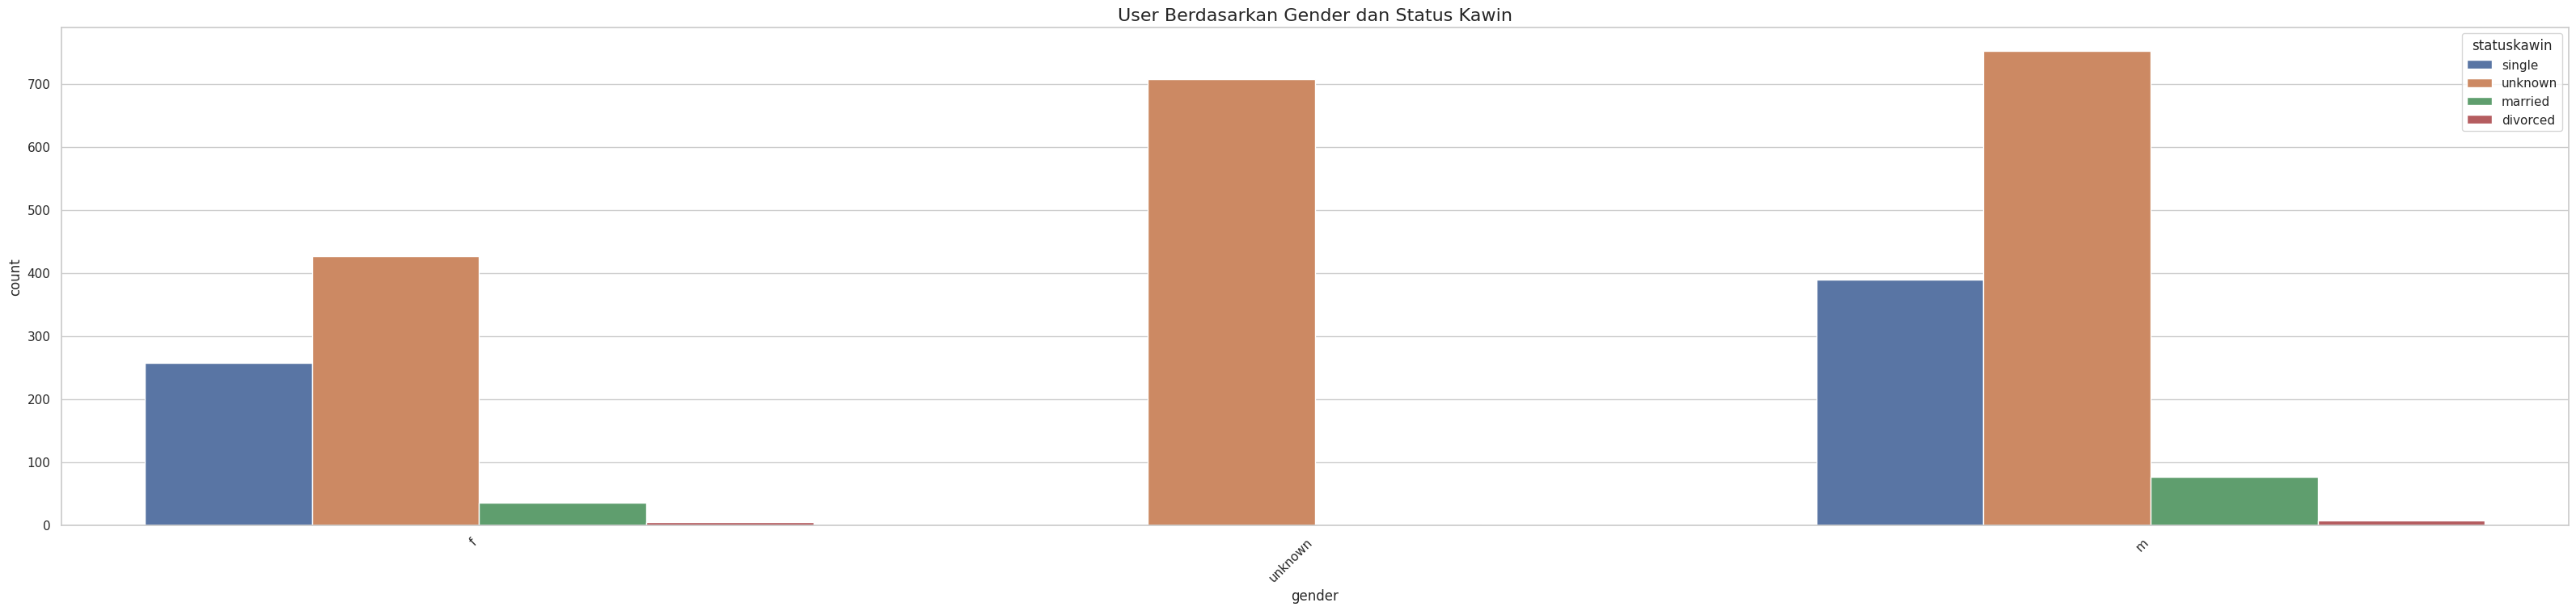

In [ ]:
plt.figure(figsize=(40,8))
sns.countplot(data=df_mp, x='gender', hue='statuskawin')
plt.title('User Berdasarkan Gender dan Status Kawin', size=16)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size = 9, rotation=45)
plt.xticks(rotation=45, ha='right')
plt.show()

If we don't look into the unknown data, the male and female users who are still single has the most amount among them

e) Provinsi of Difalink's User

In [ ]:
# Difalink's User Based on their areas
df_mp['prov'].value_counts()

unknown                578
Jawa Barat             556
DKI Jakarta            346
Jawa Timur             262
Jawa Tengah            208
Bali                   197
Banten                 178
Sumatera Selatan        39
Sumatera Utara          32
NTB                     28
Riau                    26
Lampung                 25
Sulawesi Selatan        24
Sumatera Barat          19
NTT                     19
Kalimantan Timur        16
Jambi                   12
Kalimantan Selatan      11
Maluku                   9
Sumatera                 8
Aceh                     7
Bengkulu                 7
Kalimantan Tengah        6
DI Yogyakarta            6
Bangka Belitung          5
Nusa Tenggara Barat      4
Papua                    4
Sulawesi Tenggara        3
Sulawesi Barat           3
Gorontalo                3
Sulawesi Utara           3
Kalimantan               2
Sulawesi                 2
Papua Barat              2
Kepulauan Riau           2
Kalimantan Utara         1
Kalimantan Barat         1
S

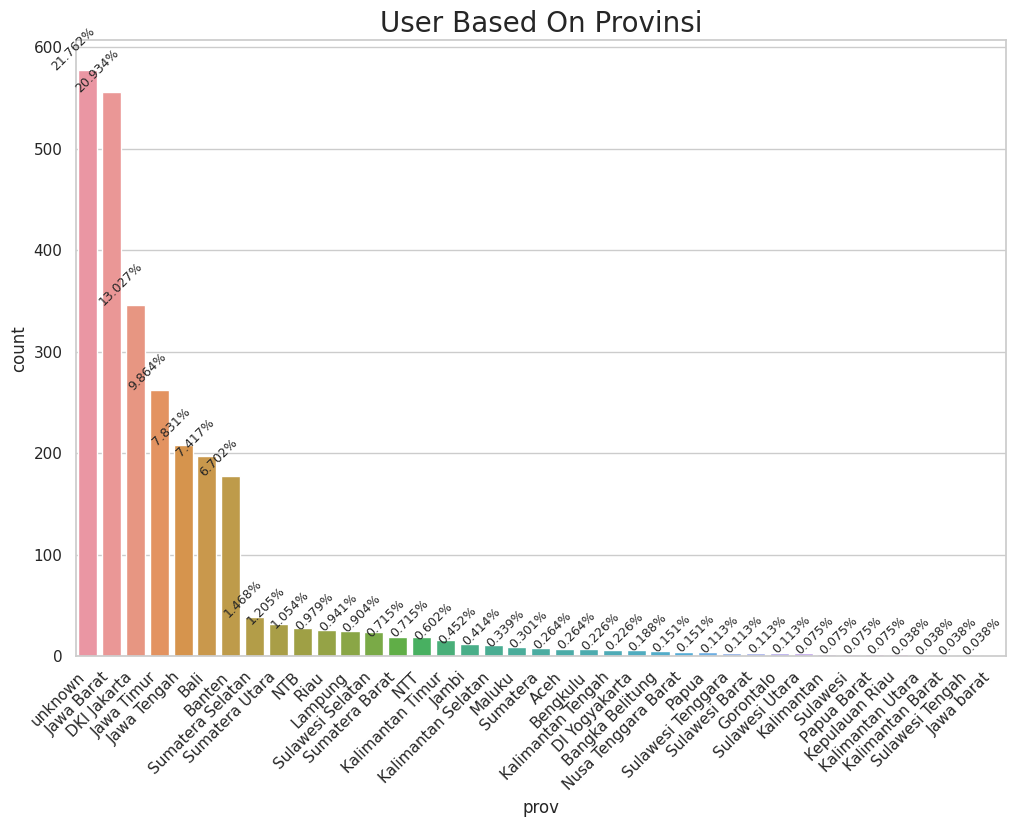

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(df_mp))
ax = sns.countplot(x="prov", data=df_mp, order=pd.value_counts(df_mp['prov']).iloc[:].index)
plt.title('User Based On Provinsi', fontsize=20)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size = 9, rotation=45)
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the graph above, the most Difalink's users are from Java and Bali. It is possible that Difalink's promotion still reaches those regions only. Despite the online promotion, interest in areas outside Java and Bali is still small. The most users in Difalink come from West Java province at 20.934%, then DKI at 13.027%, and East Java at 9.804%.

f) Daily Transportation of Difalink's Users

In [ ]:
df_mp['kendaraan'].value_counts()

unknown    1501
pribadi     852
umum        303
Name: kendaraan, dtype: int64

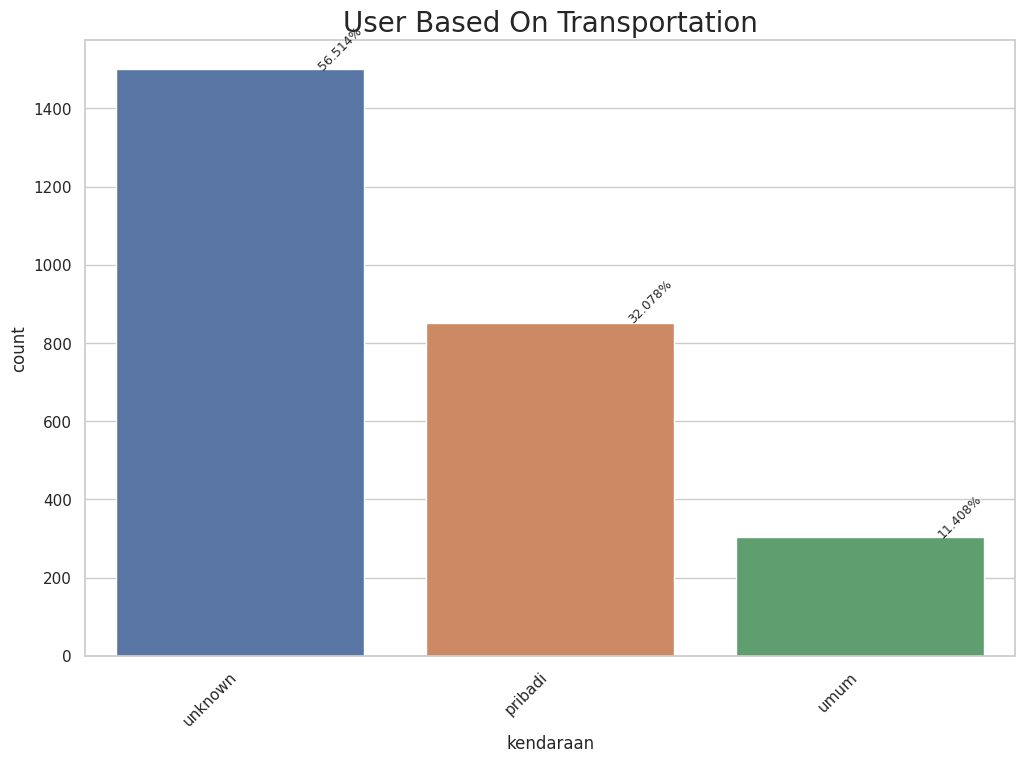

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(df_mp))
ax = sns.countplot(x="kendaraan", data=df_mp, order=pd.value_counts(df_mp['kendaraan']).iloc[:].index)
plt.title('User Based On Transportation', fontsize=20)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size = 9, rotation=45)
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the graph above, users use private transportation more than public transportation. Private vehicles include motorcycles, cars, 3-wheel motorcycles, modified vehicles and others, then public transportation includes online motorcycle taxis, public transportation, KRL, and others.

g) Education of Difalink's Users

In [ ]:
df_mp['pendidikan'].value_counts()

SMA Sederajat    1222
unknown           749
Diploma           288
Sarjana           250
SMP Sederajat      94
SD Sederajat       45
Magister            8
Name: pendidikan, dtype: int64

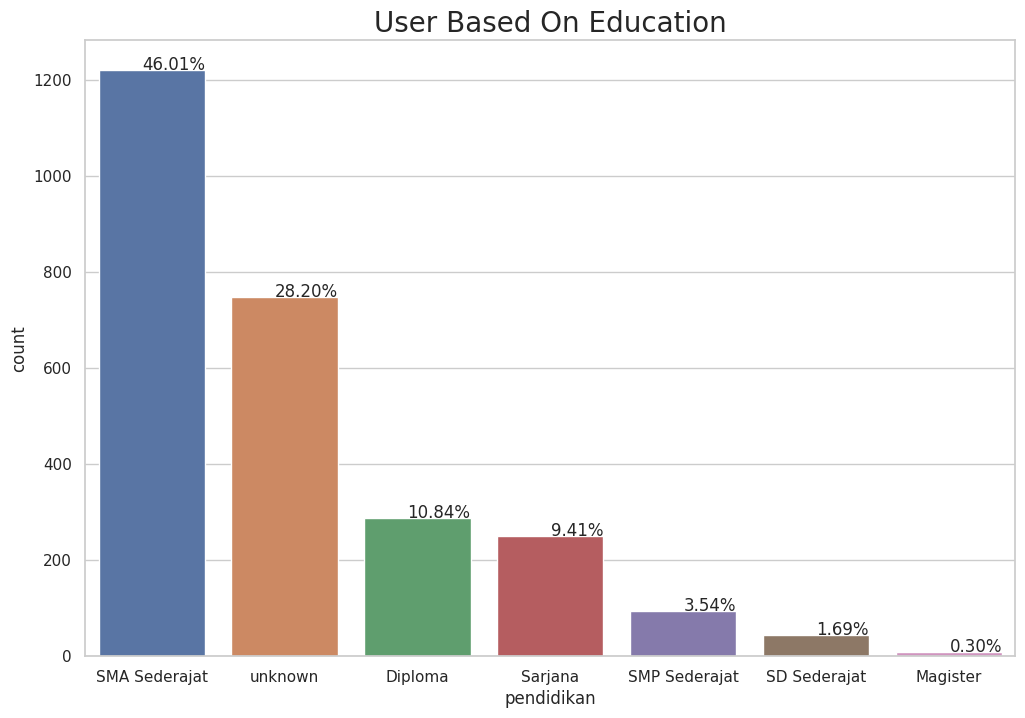

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(df_mp))
ax = sns.countplot(x="pendidikan", data=df_mp, order=pd.value_counts(df_mp['pendidikan']).iloc[:].index)
plt.title('User Based On Education', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size = 12, rotation=0)
plt.xticks(rotation=0, ha='center')
plt.show()

Based on the graph above, the most Difalink users are high school graduates (46.01%). High school, include high schools, vocational schools, and special schools. Meanwhile, the least is the user of Master or S2 graduates, which is only 0.30%.

Based on data from the Badan Pusat Statistik in 2021, the number of unemployed people with disabilities of productive age amounted to 16.52 million people with the following details:

- <= SD 11,827,826
- Junior high school 1,776,957
- High school 2,174,080
- Diploma 178,075
- University (S1/S2/S3) 3,560,818

Assuming the current data is the same as in 2021, there are around 0.06% of people with disabilities of productive age at the high school level who are Difalink users

h) Types of Disabilities of Difalink's Users

In [ ]:
df_mp['jenisdsb'].value_counts()

tuli      1155
daksa      999
netra      274
others     228
Name: jenisdsb, dtype: int64

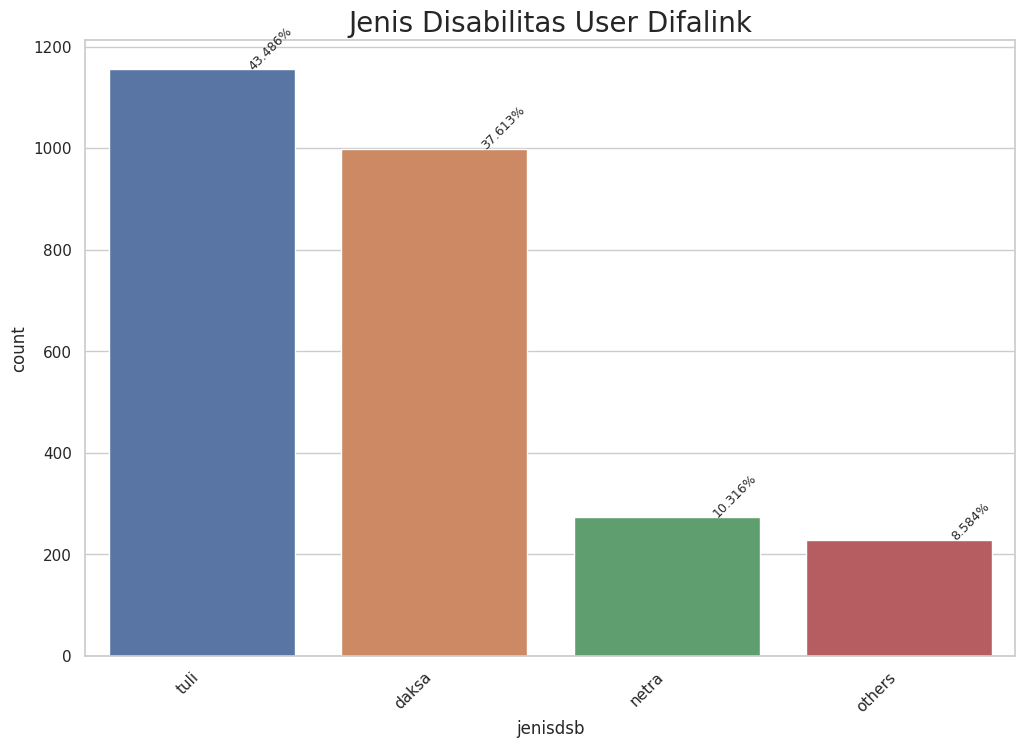

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(df_mp))
ax = sns.countplot(x="jenisdsb", data=df_mp, order=pd.value_counts(df_mp['jenisdsb']).iloc[:].index)
plt.title('Jenis Disabilitas User Difalink', fontsize=20)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size = 9, rotation=45)
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the graph above, the most Difalink's users are tuli users, followed by tuna daksa, tuna netra, and others. Users with other disabilities include mental disabilities, dwarfism, stuttering, and others.

i) Information about Difalink

In [ ]:
df_mp['taudifalink'].value_counts()

unknown             2010
instagram            316
teman                164
facebook             113
whatsapp              18
event                  9
twitter                9
linkedin               8
website difalink       5
others                 3
telegram               1
Name: taudifalink, dtype: int64

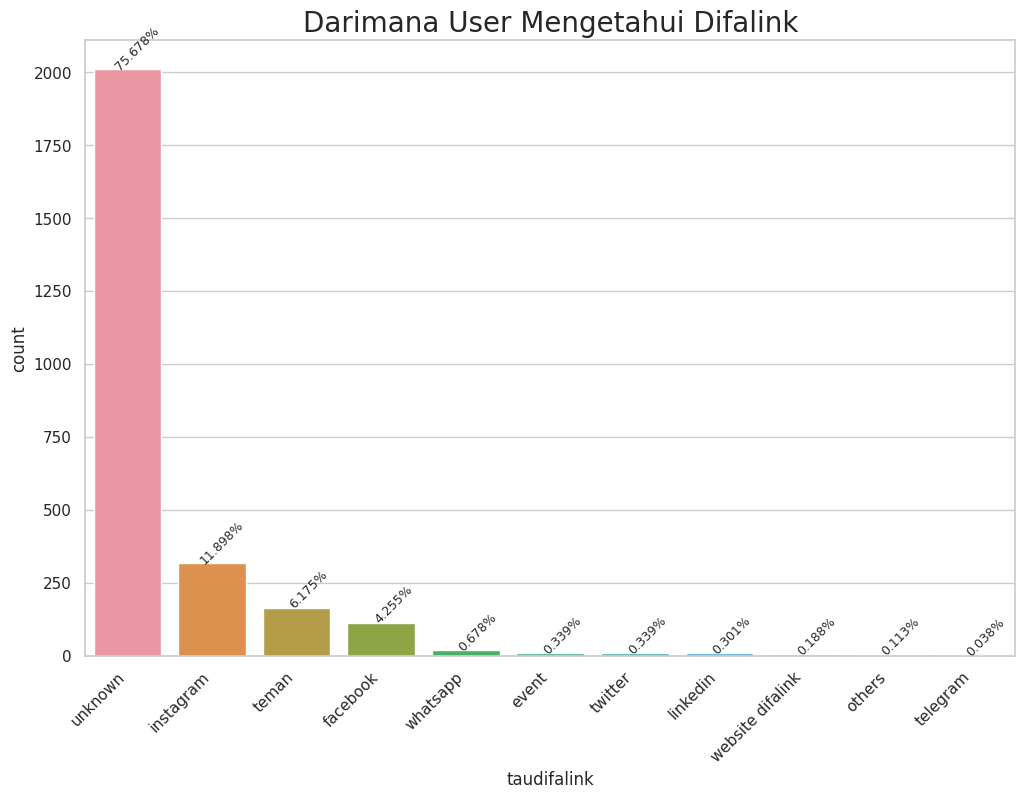

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(df_mp))
ax = sns.countplot(x="taudifalink", data=df_mp, order=pd.value_counts(df_mp['taudifalink']).iloc[:].index)
plt.title('Darimana User Mengetahui Difalink', fontsize=20)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size = 9, rotation=45)
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the graph above, the majority of users know Difalink through Instagram, Friends, and Facebook. So the majority of users know Difalink from social media and friend testimonials. It is likely that friends also get information from social media. So that social media optimization for Difalink engagement needs to be considered again, especially on Instagram or Facebook.

j) Age of Difalink's User

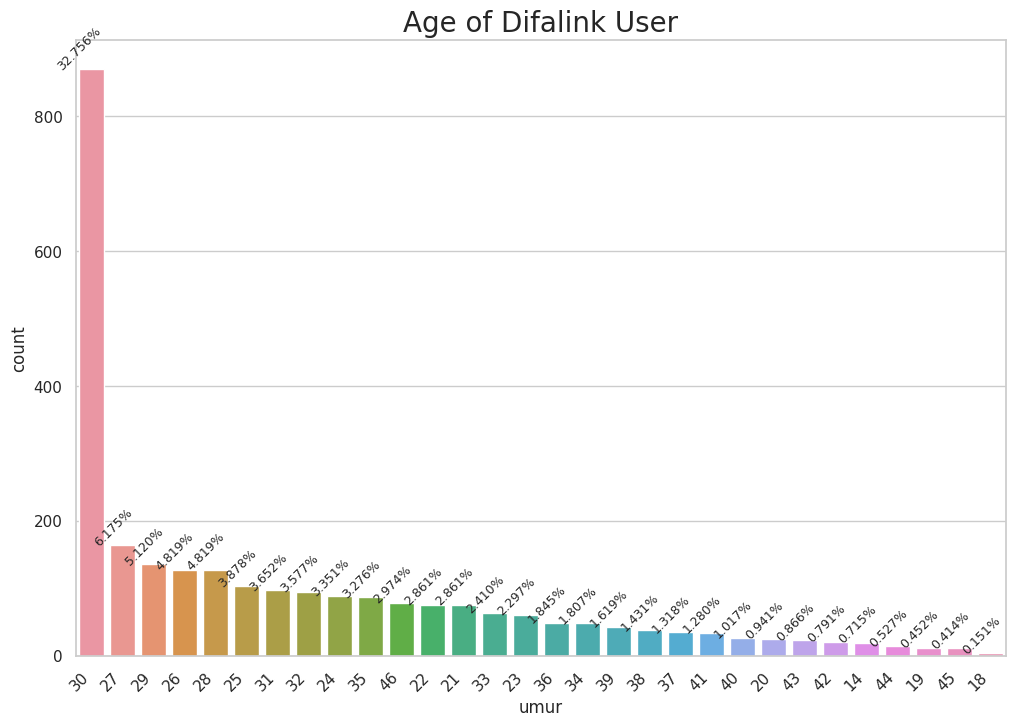

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(df_mp))
ax = sns.countplot(x="umur", data=df_mp, order=pd.value_counts(df_mp['umur']).iloc[:].index)
plt.title('Age of Difalink User', fontsize=20)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size = 9, rotation=45)
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the data above, the age of the majority of disabled users is in the productive age, which is 15-64 years. Even so, there is still a lot of unknown data and wrong input data.

k) Types of disabilities and the jobs

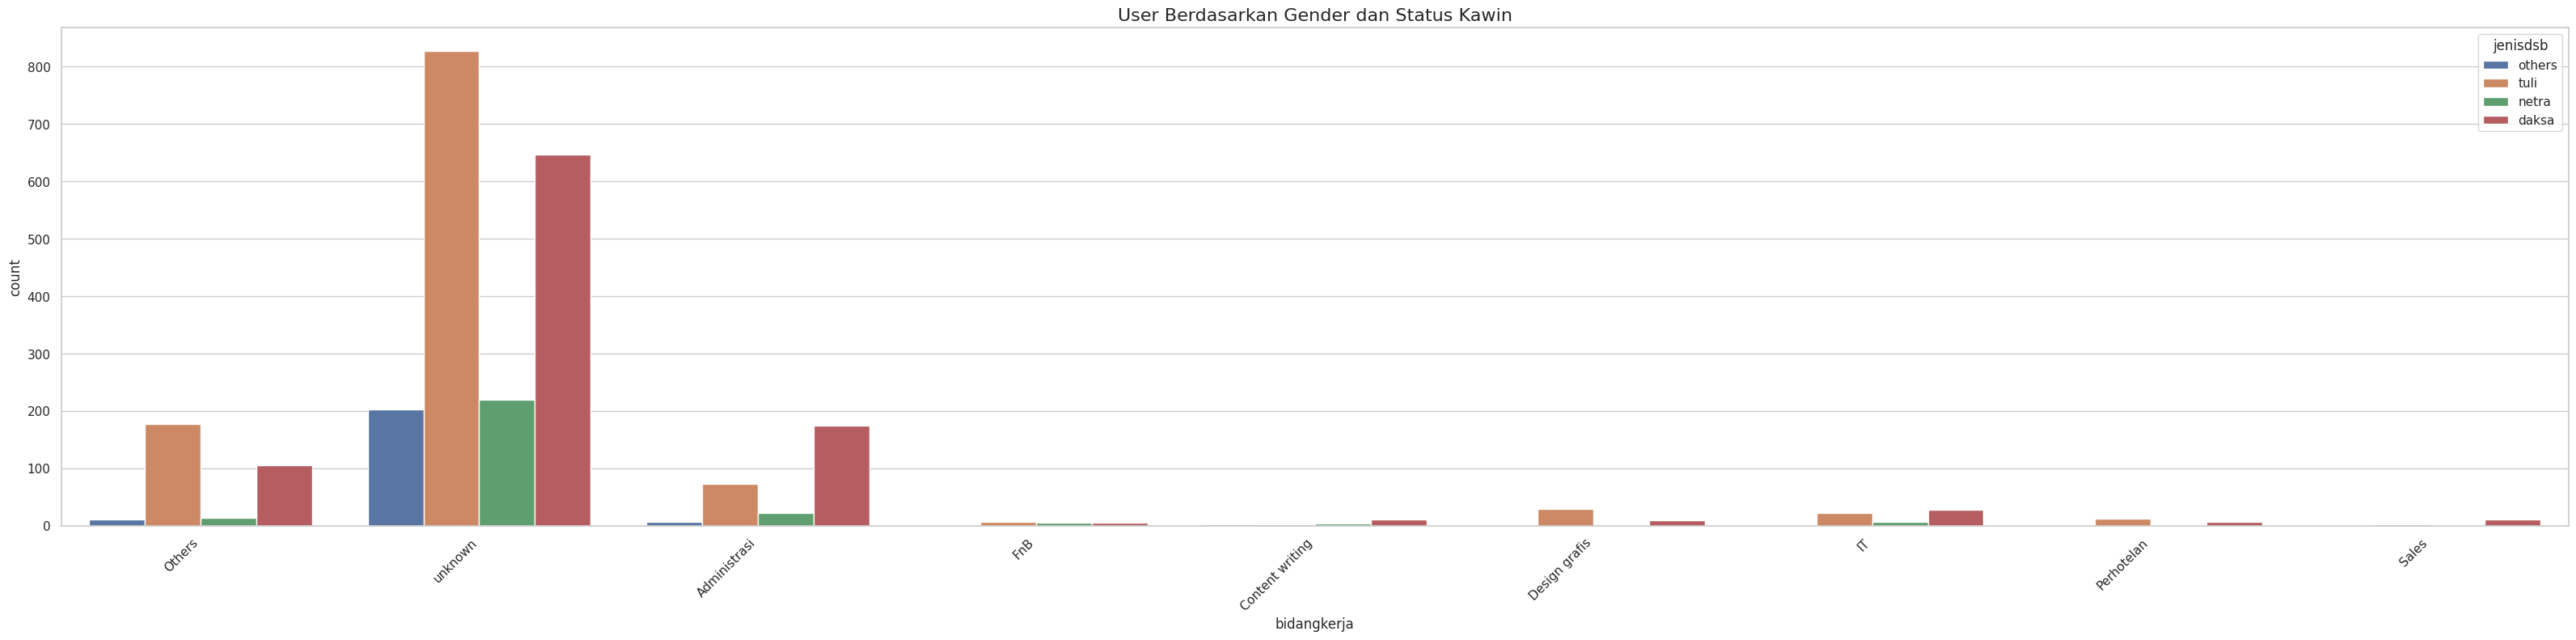

In [ ]:
plt.figure(figsize=(40,8))
sns.countplot(data=df_mp, x='bidangkerja', hue='jenisdsb')
plt.title('User Berdasarkan Gender dan Status Kawin', size=16)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right', size = 9, rotation=45)
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the graph above it can be concluded:
- The field of work: others which includes teachers, housekeeping, and others, is filled by many tuli users.
- Administration is filled with many tuna daksa users
- FnB is mostly filled by tuli users
- Content writing is mostly filled by tuna daksa users
- Graphic design is filled by many tuli users
- IT is filled with many tuna daksa users
- Hospitality is filled by many tuli users
- And sales are filled by tuna daksa users

5.2 List of Job Applicants


In [ ]:
df_lja

,Nama Lengkap,Jenis Kelamin,Umur,Kabupaten/Kota,Provinsi,Jenis Disabilitas,Nama Perusahaan,Cabang,Posisi,Pendidikan,Shifting
0,Mochamad Kharis Suryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,unknown,unknown
1,Mochamad Kharis Suryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Accounting Officer,unknown,unknown
2,Adi Prabowo,Laki-laki,24,Jakarta Timur,DKI Jakarta,Disabilitas Fisik,Alfamart,BEKASI,Crew Store,unknown,unknown
3,Mochamad KharisSuryadipura,Laki-laki,27,Sukabumi,Jawa Barat,Disabilitas Fisik,PT. Berdikari,Jakarta Pusat,Public Relation Officer,unknown,unknown
4,Nurlaila Selo Rahmawati,Perempuan,26,Kab. Karanganyar,Jawa Tengah,Tuli,PT. Berdikari,Jakarta Pusat,Accounting Officer,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...
542,Elfina Dewi Melati Sitorus,Perempuan,38,Medan,Sumatera Utara,Disabilitas Fisik,"PT. Sumber Alfaria Trijaya, tbk",unknown,unknown,unknown,unknown
543,M Yurdiansyahputro,Laki-laki,21,Sidoarjo,Jawa Timur,Disabilitas Fisik,PT. INFOMEDIA NUSANTARA,Surabaya,Agent Call Center,unknown,unknown
544,ASROI BAIHAQI,Laki-laki,21,Kota Bekasi,Jawa Barat,Tuna netra tapi sebelah kiri doang,PT. Klik Eat Indonesia,unknown,unknown,unknown,unknown
545,Nurul Fadhilah,Perempuan,19,Jakarta Selatan,DKI Jakarta,Disabilitas Fisik,ALFAMART,BEKASI,Crew Store,SMA/SMK,unknown


([<matplotlib.patches.Wedge at 0x7feb331bed70>,
 [Text(-1.050997831886835, 0.3246591402828085, 'user_difalink'),
  Text(1.0509978318868352, -0.3246591402828082, 'user applicants through difalink')],
 [Text(-0.5732715446655463, 0.1770868037906228, '90%'),
  Text(0.5732715446655463, -0.1770868037906226, '10%')])

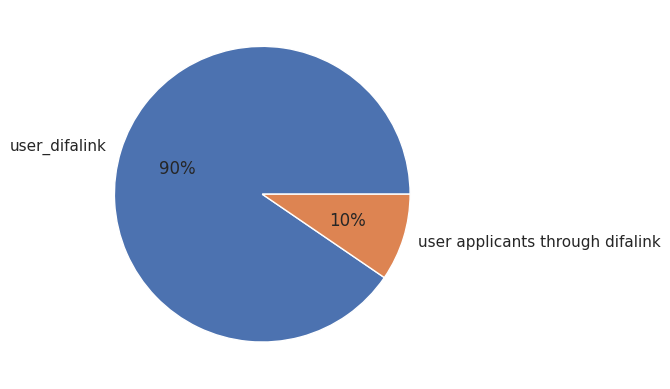

In [ ]:
data_lja = [2656, 280]
keys = ['user_difalink', 'user applicants through difalink' ]
plt.pie(data_lja, labels=keys, autopct='%.00f%%')

In [ ]:
df_lu

,No,name,Gender,disability,area,company,position,start date,finish date,PIC,Nomor HP
0,1,Ade muhamad iman,Unknown,Daksa,BANDUNG,Alfamart,warehouse,2018-10-01,2019-03-18,Ibu Yara,Unknown
1,2,R guntur saetapi,Unknown,Daksa,BANDUNG,Alfamart,Crew Store,2018-10-01,NaT,Ibu Yara,Unknown
2,3,Ujang maulana r,Unknown,Daksa,BANDUNG,Alfamart,warehouse,2018-10-01,NaT,Ibu Yara,Unknown
3,4,Moh Duta Prakarsa,Unknown,Tuli,BANDUNG,Alfamart,warehouse,2018-10-01,NaT,Ibu Yara,Unknown
4,5,Devi Juariah,Unknown,Tuli,BANDUNG,Alfamart,Crew Store,2018-10-01,2019-02-18,Ibu Yara,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
122,133,Frida Shine Petra Juniartha,P,Tuli,BALI,BEDO,Graphic Designer,2022-10-13,NaT,Unknown,Unknown
123,134,Naura Savira,P,Daksa,JAKARTA,Reckitt Indonesia,HR,2022-10-13,NaT,Unknown,Unknown
124,135,Riki Ependi,L,Daksa,LAMPUNG,Reckitt Indonesia,Corporate Communication,2022-11-21,NaT,Unknown,Unknown
125,136,Mazidatul Muna,P,Tuli,JEMBER,Alfamart,Crew Store,2022-06-01,NaT,Unknown,Unknown


([<matplotlib.patches.Wedge at 0x7feb32ee5fc0>,
 [Text(-1.0887150527001985, 0.15716085398089422, 'user_difalink'),
  Text(1.088715050860891, -0.15716086672250168, 'user recruited through difalink')],
 [Text(-0.5938445742001083, 0.08572410217139684, '95%'),
  Text(0.5938445731968496, -0.08572410912136454, '5%')])

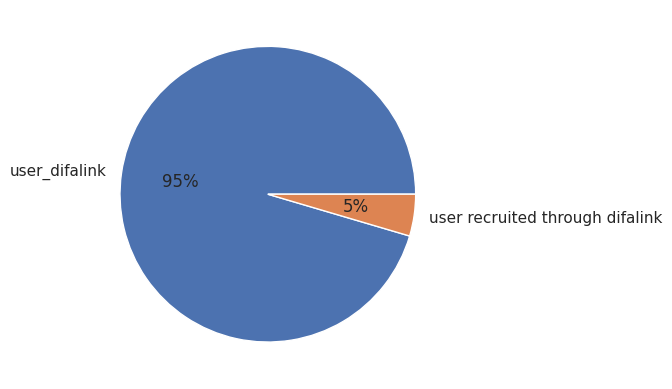

In [ ]:
data_lu = [2656, 127]
keys = ['user_difalink', 'user recruited through difalink' ]
plt.pie(data_lu, labels=keys, autopct='%.00f%%')

5.3 List of Users that are succesfully recruited via Difalink


1) Use Case Summary

> Objective Statement:

1. To find out the number of users recruited through difalink per year.
2. To find out the number of users recruited through difalink based on gender.
3. To find out the number of users recruited through difalink based on the type of disability.
4. To find out the number of users recruited through difalink based on the region where they work.
5. To find out the number of users recruited through difalink by company.
6. To find out the number of users recruited through difalink based on job position.
7. To find out the number of users recruited through difalink based on position and type of disability.
8. To know how to optimize marketing strategies based on the data obtained.

> Challenges:

* Datasets have different data types.
* The dataset has many null values.
* Data inconsistencies.

> Methodology / Analytic Technique:
* Exploratory and Graph analysis

> Business Benefit:
* Add users recruited through difalink.
* Got an optimal marketing strategy.

> Expected Outcome:
* Know the number of users recruited through difalink per year.
* Know the number of users recruited through gender-based difalink.
* Know the number of users recruited through difalink based on the type of disability.
* Know the number of users recruited through difalink based on the region where they work.
* Know the number of users recruited through difalink by company.
* Know the number of users recruited through difalink based on job position.
* Know the number of users recruited through difalink based on position and type of disability.
* Know how to optimize marketing strategies based on the data obtained.

2) Business Understanding


Difalink is a social enterprise that connects people with disabilities to companies and
help the two to work well together. Social enterprise is an organization or company that uses commercial strategies to improve financial, social, and environmental well-being, to maximize profits as well as good impacts for every element involved in its business.

This case requires data-driven answers to the following questions:
* How many users are recruited through difalink per year?
* How many users are recruited through difalink based on gender?
* How many users are recruited through difalink based on the type of disability?
* How many users are recruited through difalink based on the region where they work?
* How many users are recruited through difalink by company?
* How many users are recruited through difalink based on job position?
* How many users are recruited through difalink based on position and type of disability?
* How to optimize marketing strategies based on the data obtained?

3) Data Understanding
* Data is a list of users recruited from difalink from 2018 to 2022.
* This dataset has 11 columns and 127 rows.

> Data Dictionary:
* No 			: Data number
* name 			: The name of the user recruited through Difalink
* Gender 		: The gender of the user recruited through Difalink
* disability 	: The type of disabilites of the user recruited through Difalink
* area 			: The area of work where users recruited through Difalink
* company 		: The company where the user is recruited through Difalink
* position 		: Job position of users recruited through Difalink
* start date 	: Start Date of Work Users Recruited Through DifaLink
* finish date 	: Last working date of users recruited through DifaLink
* PIC 			: The name of the person in charge of the user recruited through Difalink
* Nomor HP 		: Mobile number of the person in charge of the user recruited through Difalink


> Data Source:
* Source Data: Difalink

4) Data Preparation
> Code Used:
* Python Version :Python 3.8.8
* Packages : Pandas, Numpy, Matplotlib, Seaborn,  Datetime, Warnings


EDA is needed to find structure or insight in data, identify important variables/features in the dataset

In [ ]:
# make function that returns percentage of data
def get_percent(data, values):
    data = round(data[values]*100/data[values].sum(),1)
    return data

1) Number of users recruited through difalink per year.


In [ ]:
df_year = df_lu.groupby(df_lu['start date'].dt.year).name.count()
df_year = pd.DataFrame(df_year)
df_year = df_year.reset_index()

percentage = get_percent(data=df_year ,values="name")

df_year["percentage"] = get_percent(data=df_year ,values="name")

df_year

,start date,name,percentage
0,2018,5,3.9
1,2019,10,7.9
2,2020,16,12.6
3,2021,46,36.2
4,2022,50,39.4


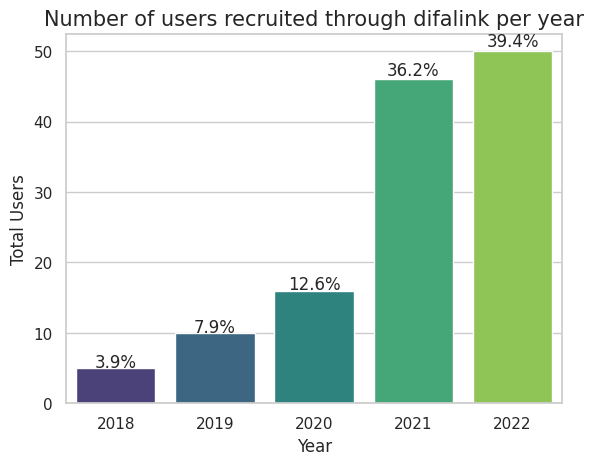

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(data = df_year, palette = 'viridis', x= 'start date' , y = 'name')
plt.title('Number of users recruited through difalink per year', fontsize=15)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()*1.013
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center', size = 12, rotation=0)
plt.xticks(rotation=0, ha='center')
plt.xlabel('Year')
plt.ylabel('Total Users')
plt.show()

The graph above shows the number of Users Recruited per year, it can be concluded that **the lowest number of Users occurred in 2018 at 3.9%**, while **the highest number of Users occurred in 2022 at 39.4%**. From 2018 to 2022 the number of Users continues to increase, there is also a large increase in 2021 which **almost increased by 3 times** from the previous year.

2) Number of users recruited through difalink based on gender.


In [ ]:
df_gender = pd.DataFrame(df_lu[df_lu["Gender"] != "Unknown"]["Gender"].value_counts())
df_gender['Percent'] = get_percent(data=df_gender ,values="Gender")

df_gender

,Gender,Percent
L,66,59.5
P,45,40.5


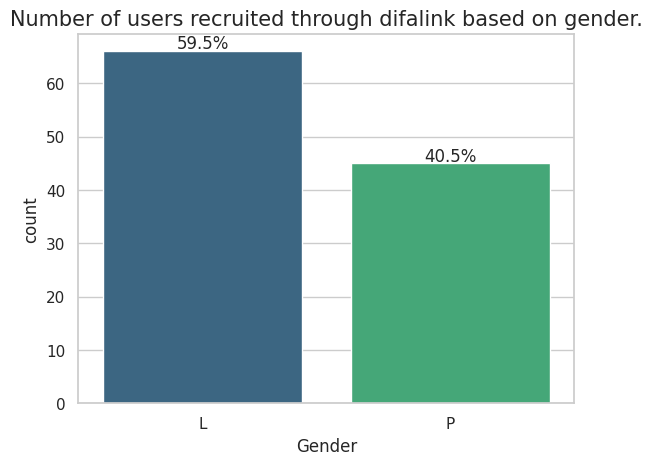

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x="Gender", data=df_lu[df_lu["Gender"] != "Unknown"], palette = 'viridis', order=df_lu[df_lu["Gender"] != "Unknown"].Gender.value_counts().iloc[:15].index)
plt.title('Number of users recruited through difalink based on gender.', fontsize=15)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()*1.009
   ax.annotate('{:.1f}%'.format(df_gender['Percent'][i]), (x, y), ha='center', size = 12, rotation=0)
plt.xticks(rotation=0, ha='center')
plt.show()

The graph above shows the number of Users Recruited based on gender, it can be concluded that **the majority of the gender recruited is Male** which is **59.5%** of the total number of users.

3) Number of users recruited through difalink based on the type of disability.


In [ ]:
df_disability = pd.DataFrame(df_lu[df_lu["disability"] != "Unknown"]["disability"].value_counts())
df_disability['Percent'] = get_percent(data=df_disability ,values="disability")

df_disability

,disability,Percent
Daksa,56,46.3
Tuli,35,28.9
Netra,15,12.4
Others,15,12.4


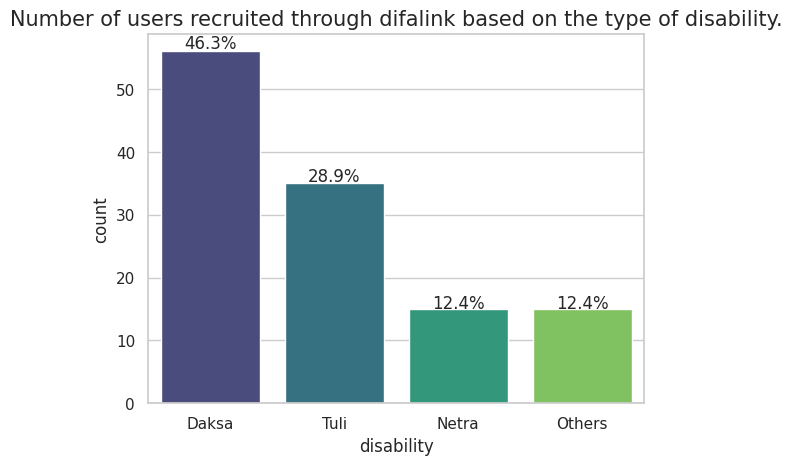

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(data=df_lu[df_lu["disability"] != "Unknown"], x="disability", palette='viridis')
plt.title('Number of users recruited through difalink based on the type of disability.', fontsize=15)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()*1.009
   ax.annotate('{:.1f}%'.format(df_disability['Percent'][i]), (x, y), ha='center', size = 12, rotation=0)
plt.xticks(rotation=0, ha='center')
plt.show()

The graph above shows the number of Users Recruited based on the type of disability, it can be concluded that **the highest number of Users is Daksa at 46.3%** followed by Deaf at 28.9%, then Netra and Others at 12.4%.

4) Number of users recruited through difalink based on the region where they work.


<Axes: title={'center': 'Number of users recruited through difalink based on the region where they work.'}, xlabel='count', ylabel='area'>

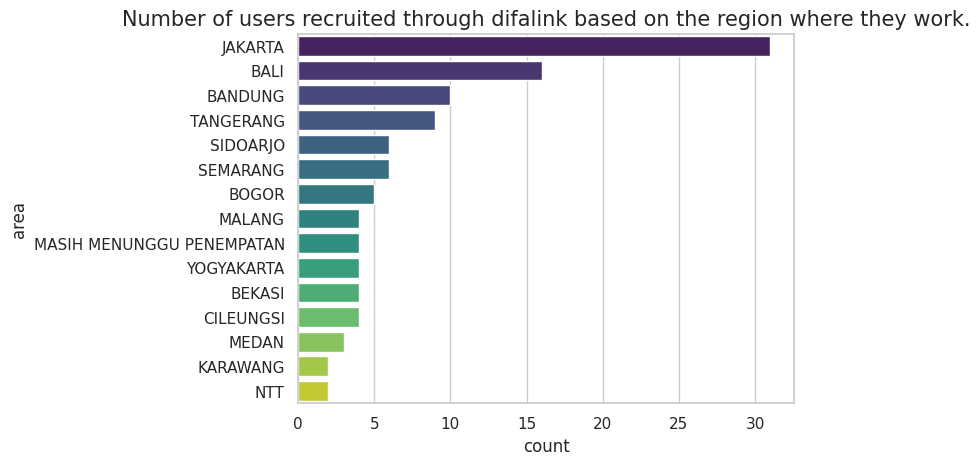

In [ ]:
sns.set(style="whitegrid")
plt.title('Number of users recruited through difalink based on the region where they work.', fontsize=15)
sns.countplot(data=df_lu, y="area", palette='viridis', order = df_lu.area.value_counts().iloc[:15].index)

The graph above shows the number of Users Recruited by area, it can be concluded that the majority of Users Recruited are in **big cities in Java such as Jakarta and Bandung, as well as in Bali**.

5) Number of users recruited through difalink by company.


<Axes: title={'center': ' Number of users recruited through difalink by company.'}, xlabel='count', ylabel='company'>

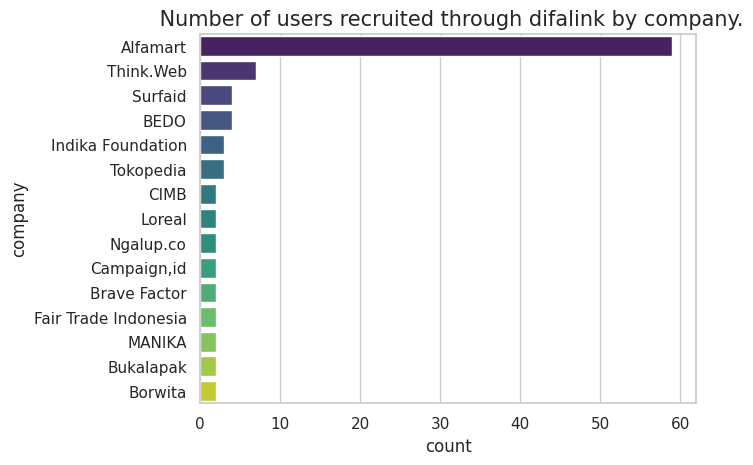

In [ ]:
sns.set(style="whitegrid")
plt.title(' Number of users recruited through difalink by company.', fontsize=15)
sns.countplot(data=df_lu, y="company", palette='viridis', order = df_lu.company.value_counts().iloc[:15].index)

The graph above shows the number of Users Recruited by company, it can be concluded that **most of the Recruited Users work at Alfamart**, when compared to other companies Alfamart recruits **5 times** more users.

6) Number of users recruited through difalink based on job position.


<Axes: title={'center': 'Number of users recruited through difalink based on job position.'}, xlabel='count', ylabel='position'>

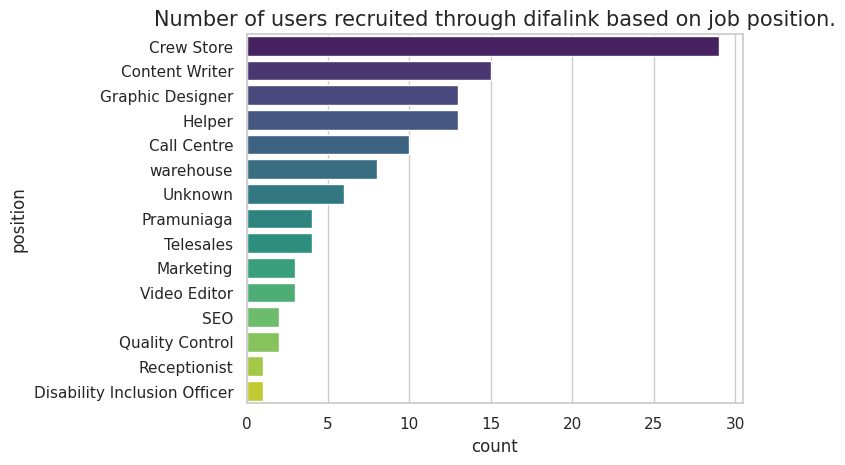

In [ ]:
sns.set(style="whitegrid")
plt.title('Number of users recruited through difalink based on job position.', fontsize=15)
sns.countplot(data=df_lu, y="position", palette='viridis', order = df_lu.position.value_counts().iloc[:15].index)

The graph above shows the number of Users Recruited by position, it can be concluded that most of the job positions of Hired Users are in the **field of warehousing and franchising** such as crew stores and helpers. Also in the **digital field** such as content writers and graphic designers.

7) Number of users recruited through difalink based on position and type of disability.


<Axes: title={'center': 'Number of users recruited through difalink based on position and type of disability.'}, xlabel='position', ylabel='count'>

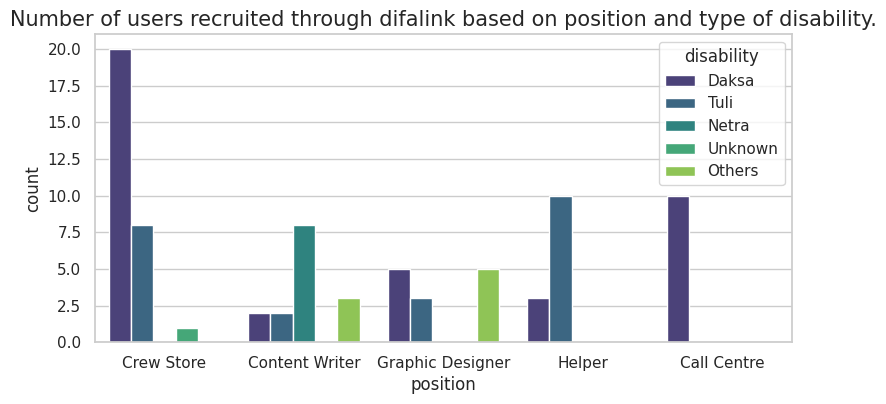

In [ ]:
plt.figure(figsize=(9,4))
sns.set(style="whitegrid")
plt.title('Number of users recruited through difalink based on position and type of disability.', fontsize=15)
sns.countplot(data=df_lu, x="position", hue="disability" , palette='viridis', order = df_lu.position.value_counts().iloc[:5].index)

The graph above shows the number of Users Recruited based on position and type of disability, it can be concluded that Users who have disabilities **daksa** are mostly recruited as **crew stores**, deaf disabilities are mostly recruited as **helper**, and **blind disabilities** are mostly recruited as **content writer**.

8) Summary and Conclussion: how to optimize marketing strategies based on the data obtained.

- **the lowest number of Users occurred in 2018 at 3.9%**, while the highest number of Users occurred in 2022 at 39.4%**. From 2018 to 2022 the number of Users continues to increase, there is also a large increase in 2021 which **almost increased by 3 times** from the previous year.
- **majority of gender recruited is Male** which is **59.5%** of the total number of users.
- **the highest number of users recruited from difalink is Daksa at 46.3%** followed by Deaf at 28.9%, then Netra and Others at 12.4%.
- The majority of Recruited Users are in **big cities in Java such as Jakarta and Bandung, also in Bali**.
- **most of the Recruited Users work at Alfamart**, when compared to other companies Alfamart recruits **5 times** more users.
- most of the job positions of Hired Users are in the field of warehousing and franchising** such as store crew and helpers. Also in the **digital field** such as content writers and graphic designers.
- Users who have disabilities **daksa** are mostly recruited as **crew stores**, disabilities **deaf** are mostly recruited as **helper**, and disabled **blind** are mostly recruited as **content writer**.


5.4 List of Job Vacancies

1) The level of education that appears most in the requirements

<Axes: xlabel='Pendidikan Minimal', ylabel='count'>

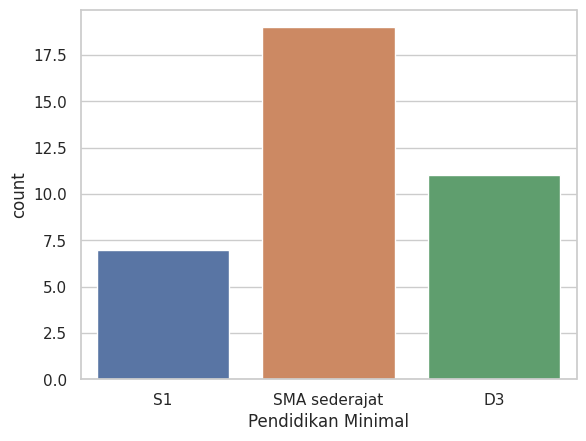

In [ ]:
sns.countplot(data = df_ljv, x = 'Pendidikan Minimal')

2) Companies that open the most vacancies for disabilities

<Axes: xlabel='count', ylabel='Nama Perusahaan'>

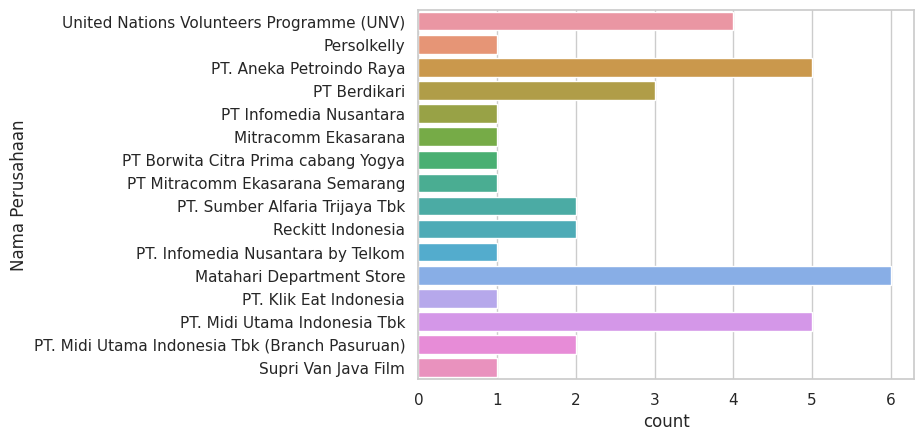

In [ ]:
sns.countplot(data = df_ljv, y = 'Nama Perusahaan')

3) Amount of companies that include experience in their requirements

<Axes: xlabel='Pengalaman', ylabel='count'>

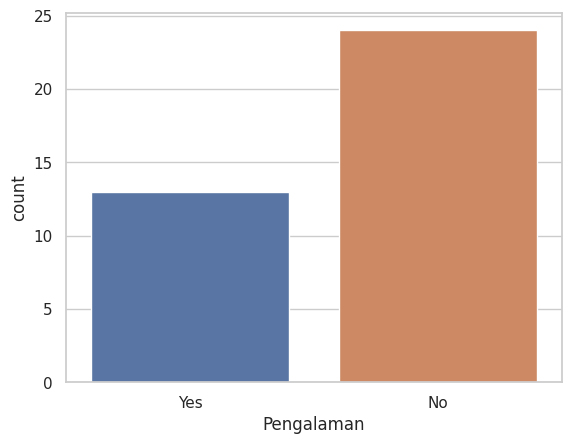

In [ ]:
sns.countplot(data = df_ljv, x = 'Pengalaman')

4) Positions that most offered to disabilities

<Axes: xlabel='count', ylabel='Posisi yang dicari'>

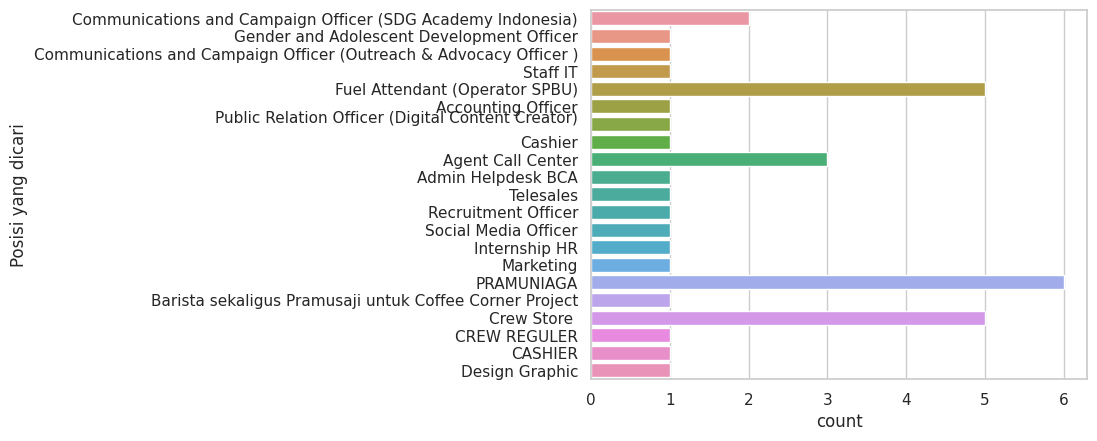

In [ ]:
sns.countplot(data = df_ljv, y = 'Posisi yang dicari')

5) Most work placements for disabilities vacancies

<Axes: xlabel='count', ylabel='Penempatan '>

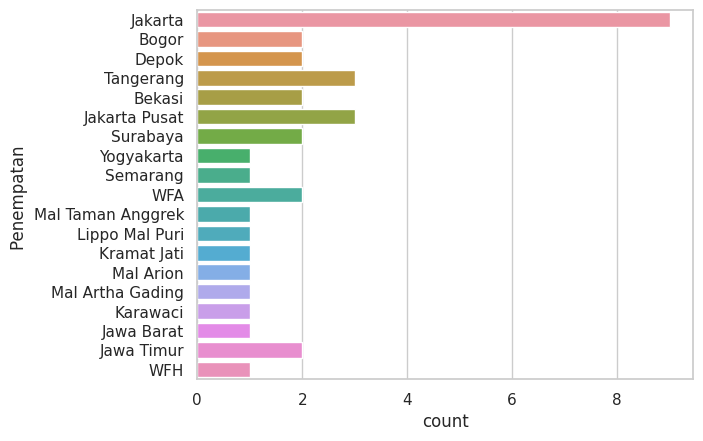

In [ ]:
sns.countplot(data = df_ljv, y = 'Penempatan ')

<a name='6'></a>
##6. Conclussion

Summary and Recommendation


> Summary
- Difalink's User vs Indonesian People with Disabilities: When we compared to the total unemployment of productive age disability in Indonesia, disabled users are still very small. In fact, it is almost close to 0% of the comparison.
- Gender of Difalink's User: Gender male has the most amount of users with percentage of 46.12%
- Marital Status of Difalink's User: The unknown data dominates the feature of the marital status of difalink's users. This data may not filled by some users during the registration. Difalink's users who are still single are far more than 6 times than the married ones. While widowed users are 0.49% of all users.
- Provinsi of Difalink's User: Based on the graph, the most Difalink's users are from Java and Bali. It is possible that Difalink's promotion still reaches those regions only. Despite the online promotion, interest in areas outside Java and Bali is still small. The most users in Difalink come from West Java province at 20.934%, then DKI at 13.027%, and East Java at 9.804%.
- Daily Transportation of Difalink's Users: Based on the graph, users use private transportation more than public transportation. Private vehicles include motorcycles, cars, 3-wheel motorcycles, modified vehicles and others, then public transportation includes online motorcycle taxis, public transportation, KRL, and others.
- Education of Difalink's Users: Based on the graph, the most Difalink users are high school graduates (46.01%). High school, include high schools, vocational schools, and special schools. Meanwhile, the least is the user of Master or S2 graduates, which is only 0.30%.
- Based on data from the Badan Pusat Statistik in 2021, the number of unemployed people with disabilities of productive age amounted to 16.52 million people with the following details, <= SD 11,827,826, Junior high school 1,776,957, High school 2,174,080, Diploma 178,075, and University (S1/S2/S3) 3,560,818. Assuming the current data is the same as in 2021, there are around 0.06% of people with disabilities of productive age at the high school level who are Difalink users
- Types of Disabilities of Difalink's Users: Based on the graph above, the most Difalink's users are tuli users, followed by tuna daksa, tuna netra, and others. Users with other disabilities include mental disabilities, dwarfism, stuttering, and others.
- Based on the graph, the majority of users know Difalink through Instagram, Friends, and Facebook. So the majority of users know Difalink from social media and friend testimonials. It is likely that friends also get information from social media. So that social media optimization for Difalink engagement needs to be considered again, especially on Instagram or Facebook.
- Based on the data, the age of the majority of disabled users is in the productive age, which is 15-64 years. Even so, there is still a lot of unknown data and wrong input data.
- The graph shows the number of Users Recruited per year, it can be concluded that **the lowest number of Users occurred in 2018 at 3.9%**, while **the highest number of Users occurred in 2022 at 39.4%**. From 2018 to 2022 the number of Users continues to increase, there is also a large increase in 2021 which **almost increased by 3 times** from the previous year.
- The graph shows the number of Users Recruited based on gender, it can be concluded that **the majority of the gender recruited is Male** which is **59.5%** of the total number of users.
- The graph shows the number of Users Recruited based on the type of disability, it can be concluded that **the highest number of Users is Daksa at 46.3%** followed by Deaf at 28.9%, then Netra and Others at 12.4%.
- The graph shows the number of Users Recruited by area, it can be concluded that the majority of Users Recruited are in **big cities in Java such as Jakarta and Bandung, as well as in Bali**.
- The graph shows the number of Users Recruited by company, it can be concluded that **most of the Recruited Users work at Alfamart**, when compared to other companies Alfamart recruits **5 times** more users.
- The graph shows the number of Users Recruited by position, it can be concluded that most of the job positions of Hired Users are in the **field of warehousing and franchising** such as crew stores and helpers. Also in the **digital field** such as content writers and graphic designers.
- The graph above shows the number of Users Recruited based on position and type of disability, it can be concluded that Users who have disabilities **daksa** are mostly recruited as **crew stores**, deaf disabilities are mostly recruited as **helper**, and **blind disabilities** are mostly recruited as **content writer**.



> Based on the graph, it can be concluded:
- The field of work: others which includes teachers, housekeeping, and others, is filled by many tuli users.
- Administration is filled with many tuna daksa users
- FnB is mostly filled by tuli users
- Content writing is mostly filled by tuna daksa users
- Graphic design is filled by many tuli users
- IT is filled with many tuna daksa users
- Hospitality is filled by many tuli users
- And sales are filled by tuna daksa users





> Recommendation
- We can't show this part due to client privacy.
